# **Data Hotel Booking Demand**

# **Kelompok 1**

1. Business Problem Understanding
1. Data Understanding
1. Preprocessing
1. Exploratory Data Analysis (Tahap Awal)
1. Features Representation


****

# **1. Business Problem Understanding**


**Content**

Pembatalan pesanan adalah salah satu tantangan terbesar yang dihadapi industri perhotelan karena dapat menghilangkan penghasilan dari kamar yang tidak berpenghuni. Berdasarkan permasalahan tersebut, perlu dibangun kerangka kerja teknologi yang dapat memprediksi kemungkinan terjadinya pembatalan setiap pesanan secara akurat, sehingga pihak hotel dapat membuat kebijakan dan strategi yang tepat dalam mengatasi permasalahan tersebut

**Tujuan Bisnis**



**Pernyataan yang didapatkan dari data :**

Dalam industri perhotelan, tingkat pembatalan pemesanan yang tinggi dapat mengakibatkan kerugian pendapatan signifikan dan sumber daya yang terbuang. Tujuan utama dari analisis ini adalah untuk mengidentifikasi dan menganalisis faktor-faktor yang mempengaruhi pembatalan pemesanan di dua jenis hotel yang berbeda: Resort Hotel dan City Hotel. Dengan memahami faktor-faktor pembatalan, proyek ini bertujuan untuk menyusun strategi yang efektif untuk mengurangi tingkat pembatalan, meningkatkan kepuasan pelanggan, dan secara keseluruhan, meningkatkan profitabilitas hotel.


**Tujuan akhir yang ingin dicapai:**

Mengidentifikasi Faktor Kunci: Mengidentifikasi faktor-faktor kunci yang mempengaruhi keputusan pembatalan pemesanan di kedua jenis hotel.
Merumuskan Strategi: Mengembangkan strategi berdasarkan analisis untuk mengurangi tingkat pembatalan.
Evaluasi Dampak: Menilai dampak dari strategi yang diimplementasikan untuk memastikan pencapaian tujuan bisnis dan meningkatkan profitabilitas hotel.




# **2. Data Understanding**

Dataset source : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?datasetId=511638&sortBy=voteCount

1. Data hotel yang digunakan adalah dataset dari hotel yang berada di Portugal.
2. Dataset yang digunakan berasal dari tahun 2015-2017.

Notes :
- Attribute 'is_canceled' adalah target dalam kasus ini untuk dipresiksi (variabel dependent).
- Attribute - attribute lainnya akan menjadi attribute pendukung untuk memprediksi pembatalan pemesanan (variabel independent).
- Setiap baris data merepresentasikan informasi terkait pemesanan kamar hotel dan detailnya.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| hotel | Object | Jenis tipe hotel (Resort Hotel / City Hotel) |
| is_canceled | Integer | Variabel hasil, nilai biner yang menunjukkan jika pemesanan dibatalkan (0: no, 1: yes) |
| lead_time | Integer | Jumlah hari sebelum kedatangan saat pemesanan dilakukan di hotel |
| arrival_date_year | Integer | Tahun dari tanggal kedatangan |
| arrival_date_month | Object | Bulan dari tanggal kedatangan |
| arrival_date_week_number | Integer | Jumlah minggu dalam setahun (1 sampai 52) |
| arrival_date_day_of_month | Integer | Hari pada bulan di tanggal kedatangan (1 s/d 31) |
| stays_in_weekend_nights | Integer | Dari total lama menginap, berapa malam di akhir pekan (Sabtu dan Minggu) |
| stays_in_week_nights | Integer | Dari total lama menginap, berapa malam di hari kerja (Senin sampai Jumat) |
| adults | Integer | Jumlah orang dewasa |
| children | Float | Jumlah anak |
| babies | Integer | Jumlah bayi |
| meal | Object | ID makanan yang diminta pelanggan |
| country | Object | Identifikasi ISO negara pemegang pemesanan utama |
| market_segment | Object | Segmentasi pasar tempat pemesanan ditetapkan |
| distribution_channel | Object | Nama saluran distribusi yang digunakan untuk melakukan pemesanan |
| is_repeated_guest | Integer | Nilai biner yang menunjukkan jika pemegang pemesanan, pada saat pemesanan, adalah tamu loyal di hotel (0: no, 1: yes), dibuat dengan membandingkan waktu pemesanan dengan catatan pembuatan riwayat tamu |
| previous_cancellations | Integer | Jumlah pemesanan sebelumnya untuk pemesanan ini yang dibatalkan oleh tamu |
| previous_bookings_not_canceled | Integer | Jumlah pemesanan sebelumnya untuk pemesanan ini yang tidak dibatalkan oleh tamu |
| reserved_room_type | Object | Jenis kamar yang diminta oleh tamu |
| assigned_room_type | Object | Jenis kamar ditetapkan untuk pemesanan |
| booking_changes | Integer | Jumlah perubahan yang dilakukan pada pemesanan dari saat pemesanan dimasukkan hingga saat check-in atau pembatalan |
| deposit_type | Object | Indikasi jika pelanggan melakukan deposit untuk menjamin pemesanan. Variabel ini dapat mengasumsikan tiga kategori: No Deposit – tidak ada deposit yang dilakukan; Non Refund – deposit dilakukan sebesar total biaya menginap; Refundable – deposit dilakukan dengan nilai di bawah total biaya menginap. |
| agent | Float | ID agen (jika dipesan melalui agen) |
| company | Float | ID perusahaan (jika ada akun yang dikaitkan dengannya) |
| days_in_waiting_list | Integer | Jumlah hari pemesanan berada dalam daftar tunggu sebelum ketersediaan dikonfirmasi dan dikonfirmasi sebagai pemesanan |
| customer_type | Object | Contract - saat pemesanan memiliki bagian atau jenis kontrak lain yang terkait dengannya; Group – saat pemesanan dikaitkan dengan grup; Transient – saat pemesanan bukan bagian dari grup atau kontrak, dan tidak terkait dengan pemesanan sementara lainnya; Transient-party – saat pemesanan bersifat sementara, tetapi terkait setidaknya dengan pemesanan sementara lainnya |
| adr | Float | Tarif harian rata-rata |
| required_car_parking_spaces | Integer | Jumlah tempat parkir mobil yang dibutuhkan tamu |
| total_of_special_requests | Integer | Jumlah permintaan khusus yang dibuat (misalnya keranjang buah, pemandangan laut, dll.) |
| reservation_status | Object | Canceled – pemesanan dibatalkan oleh pelanggan; Check-Out – pelanggan telah check-in tetapi sudah berangkat; No-Show – pelanggan tidak check-in dan menginformasikan hotel alasannya |
| reservation_status_date | Object | Tanggal saat status terakhir ditetapkan. Variabel ini dapat digunakan bersama dengan ReservationStatus untuk mengetahui kapan pemesanan dibatalkan atau kapan pelanggan check-out dari hotel |

<br>


## 2.1. Import Library

In [1]:
!pip install category_encoders

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Library
import pandas as pd
import numpy as np
from datetime import timedelta
import pickle

# Set max columns
pd.set_option('display.max_columns', None)
# To change scientific notation into decimal
pd.options.display.float_format = '{:.4f}'.format

# Visualization
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Statistics
from scipy.stats import chi2_contingency

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import BinaryEncoder, OneHotEncoder
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.preprocessing import RobustScaler

# Model Selection
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from scipy.stats import uniform, randint



## 2.2. Loading Dataset

In [3]:
# Load Dataset
df = pd.read_csv('F:\\applications\\Python\\Magister\\DS\\After uts\\hotel-cancelation\\hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0000,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0000,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0000,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0000,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0000,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0000,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0000,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0000,NaN,0,Transient,75.0000,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0000,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0000,NaN,0,Transient,98.0000,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Display unique items from each column
def display_unique(df):
  listUniqueItem = []
  for col in df.columns :
      listUniqueItem.append( [col, df[col].nunique(), df[col].isna().sum(), df[col].unique()])

  tableDesc = pd.DataFrame(columns=['Column Name', 'Total of Unique', 'null', 'Unique Sample'],
                      data=listUniqueItem)
  return tableDesc

In [6]:
display_unique(df)

,Column Name,Total of Unique,null,Unique Sample
0,hotel,2,0,"[Resort Hotel, City Hotel]"
1,is_canceled,2,0,"[0, 1]"
2,lead_time,479,0,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,3,0,"[2015, 2016, 2017]"
4,arrival_date_month,12,0,"[July, August, September, October, November, D..."
5,arrival_date_week_number,53,0,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,31,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,17,0,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_week_nights,35,0,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,14,0,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


## 2.3. Exploratory Data Analysis (EDA) Tahap Awal
Exploratory Data Analysis (EDA) merupakan proses dalam proyek Analisis Data yang dilakukan dengan cara menyelidiki dataset untuk menemukan pola, dan anomali, serta lainnya berdasarkan pemahaman tentang dataset yang dimiliki. Exploratory Data Analysis biasanya dilakukan dengan pembuatan ringkasan statistik data numerik dalam dataset dan membuat berbagai macam visualisasi grafik untuk memahami data dengan lebih baik.

Seperti yang sudah disebutkan sebelumnya, kolom 'is_canceled' akan menjadi variabel target dalam kasus ini. Kemudian, kolom - kolom lainnya akan menjadi variabel independen. Exploratory Data Analysis (EDA) tahap awal ini akan menampilkan gambaran data dengan membagi dataset menjadi 2 bagian, yaitu : City Hotel dan Resort Hotel. Variabel - variabel independen juga akan dibagi menjadi variabel Kategorikal dan Numerik.
- `Numerical Variabels :` is_canceled, lead_time, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, company, days_in_waiting_list, adr, required_car_parking_spaces, dan total_of_special_requests
- `Categorical Variabels :` hotel, arrival_date_month, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, customer_type, reservation_status, dan reservation_status_date

### 2.3.1. City Hotel  
City hotel adalah hotel yang umumnya terletak di daerah perkotaan. Hotel ini biasanya juga disebut sebagai transit hotel, karena secara umum hotel jenis ini sering digunakan oleh para pelaku bisnis serta penggunaannya dalam jangka waktu yang singkat. [Sumber 1](https://www.gramedia.com/literasi/pengertian-hotel/#1_City_hotel), [Sumber 2](https://www.traveloka.com/id-id/explore/tips/klasifikasi-jenis-jenis-hotel-acc/27223)  
Berikut adalah gambaran sebaran data City Hotel dari dataset yang dimiliki.  

In [7]:
# Menampilkan ringkasan statistik data numerik
df[df['hotel'] == 'City Hotel'].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,79330.0000,79330.0000,79330.0000,79330.0000,79330.0000,79330.0000,79330.0000,79330.0000,79326.0000,79330.0000,79330.0000,79330.0000,79330.0000,79330.0000,71199.0000,3689.0000,79330.0000,79330.0000,79330.0000,79330.0000
mean,0.4173,109.7357,2016.1743,27.1774,15.7866,0.7952,2.1830,1.8510,0.0914,0.0049,0.0256,0.0797,0.1324,0.1874,28.1447,145.2716,3.2268,105.3045,0.0244,0.5469
std,0.4931,110.9485,0.6992,13.3985,8.7285,0.8850,1.4564,0.5093,0.3722,0.0843,0.1580,0.4155,1.6934,0.6086,56.4322,119.7741,20.8709,43.6030,0.1549,0.7808
min,0.0000,0.0000,2015.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,8.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,23.0000,2016.0000,17.0000,8.0000,0.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0000,40.0000,0.0000,79.2000,0.0000,0.0000
50%,0.0000,74.0000,2016.0000,27.0000,16.0000,1.0000,2.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0000,91.0000,0.0000,99.9000,0.0000,0.0000
75%,1.0000,163.0000,2017.0000,38.0000,23.0000,2.0000,3.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,17.0000,219.0000,0.0000,126.0000,0.0000,1.0000
max,1.0000,629.0000,2017.0000,53.0000,31.0000,16.0000,41.0000,4.0000,3.0000,10.0000,1.0000,21.0000,72.0000,21.0000,509.0000,497.0000,391.0000,5400.0000,3.0000,5.0000


**Wawasan / Insights :**  
- Dari deskripsi statistik data numerik di atas terlihat bahwa kebanyakan kolom memiliki nilai minimum 0 dan persebaran datanya tidak normal jika dilihat dari nilai standard deviationnya.

In [8]:
# Menampilkan ringkasan statistik data kategorikal
df[df['hotel'] == 'City Hotel'].describe(exclude="number")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,79330,79330,79330,79306,79330,79330,79330,79330,79330,79330,79330,79330
unique,1,12,4,166,8,5,8,9,3,4,3,864
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,8983,62305,30960,38748,68945,62595,57007,66442,59404,46228,1416


**Wawasan / Insights :**  
- Untuk deskripsi statistik data kategorikal, perlu dilakukan perubahan format untuk kolom 'reservation_status_date' menjadi _datetime_. Di luar itu, kolom 'country' memiliki nilai unik paling banyak dengan jumlah 166 nama. Adapun kolom dengan nilai unik paling sedikit, yaitu kolom 'deposit_type' dan 'reservation_status', masing - masing kolom memiliki 3 tipe saja.

<Axes: >

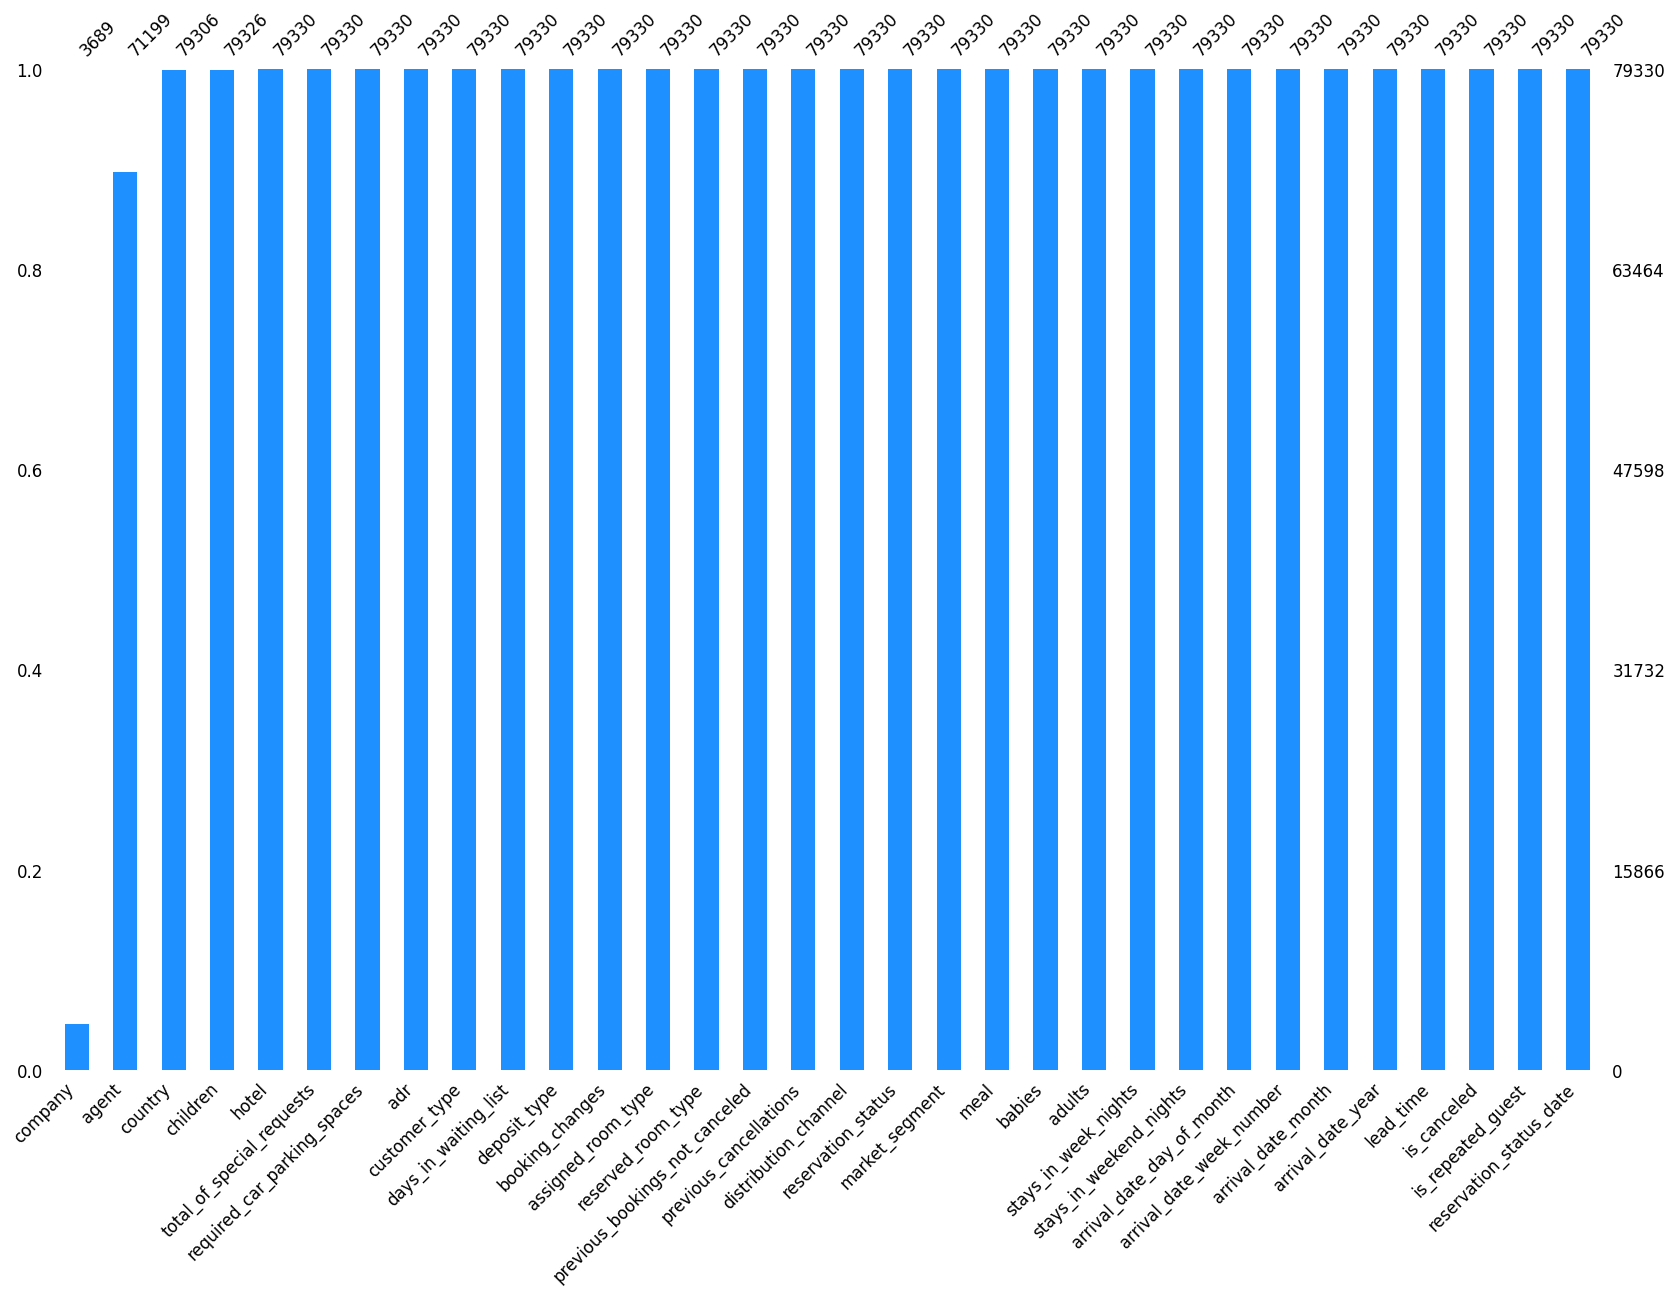

In [9]:
# Barplot dari keseluruhan data City Hotel
missingno.bar(df[df['hotel'] == 'City Hotel'], color = "dodgerblue", sort = "ascending", figsize = (20,13), fontsize = 12)

**Wawasan / Insights :**  
- Terlihat dari Bar Plot tersebut, bahwa kolom 'company', 'agent', 'country', dan 'children' memiliki _missing values_. Kemudian berdasarkan Bar Plot tersebut juga, kolom 'company' adalah kolom yang memiliki data yang hilang terbanyak, sedangkan kolom 'children' memiliki hanya sedikit saja data yang hilang. Penangan lebih jauh terkait _missing values_ akan dilakukan pada tahap preprocessing.

<Axes: >

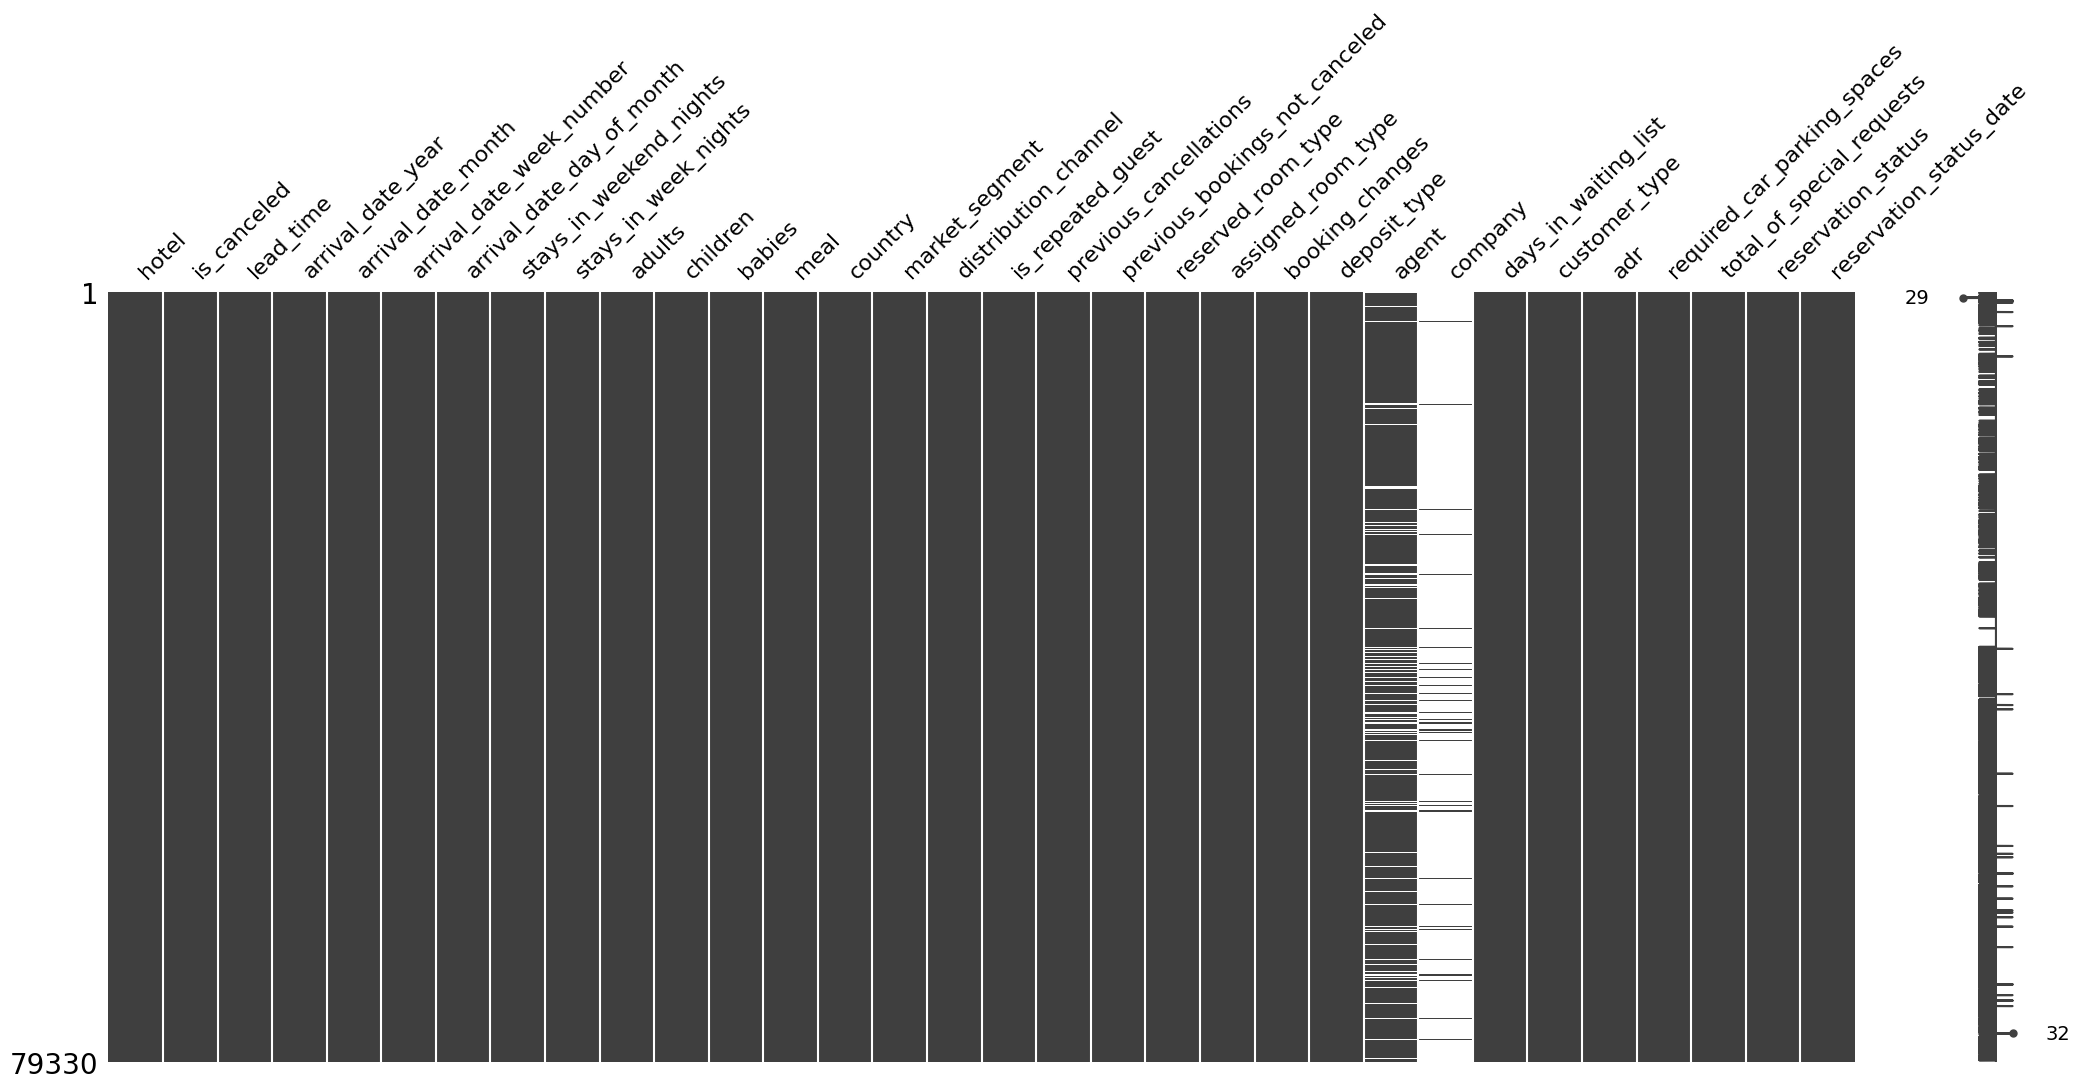

In [10]:
# Matrix plot dari keseluruhan data City Hotel
missingno.matrix(df[df['hotel'] == 'City Hotel'])

**Wawasan / Insights :**  
- Terlihat bahwa _missing value_ pada setiap kolom memiliki pola yang cukup acak.

In [11]:
# Jumlah data City Hotel dalam Dataset
df_city = df[df['hotel'] == 'City Hotel']
print(f"City Hotel data has {df_city.shape[0]} rows.")

City Hotel data has 79330 rows.


In [12]:
# Membangun grafik visualisasi untuk variable numerikal
def plot_histograms(df, bins = 60, figsize = (15,15), color = 'skyblue', title = None, title_fontsize = 14, title_y = 0.92):
    df.hist(bins = bins, figsize = figsize, color = color)
    plt.suptitle(title, fontsize = title_fontsize, y = title_y)
    plt.show()

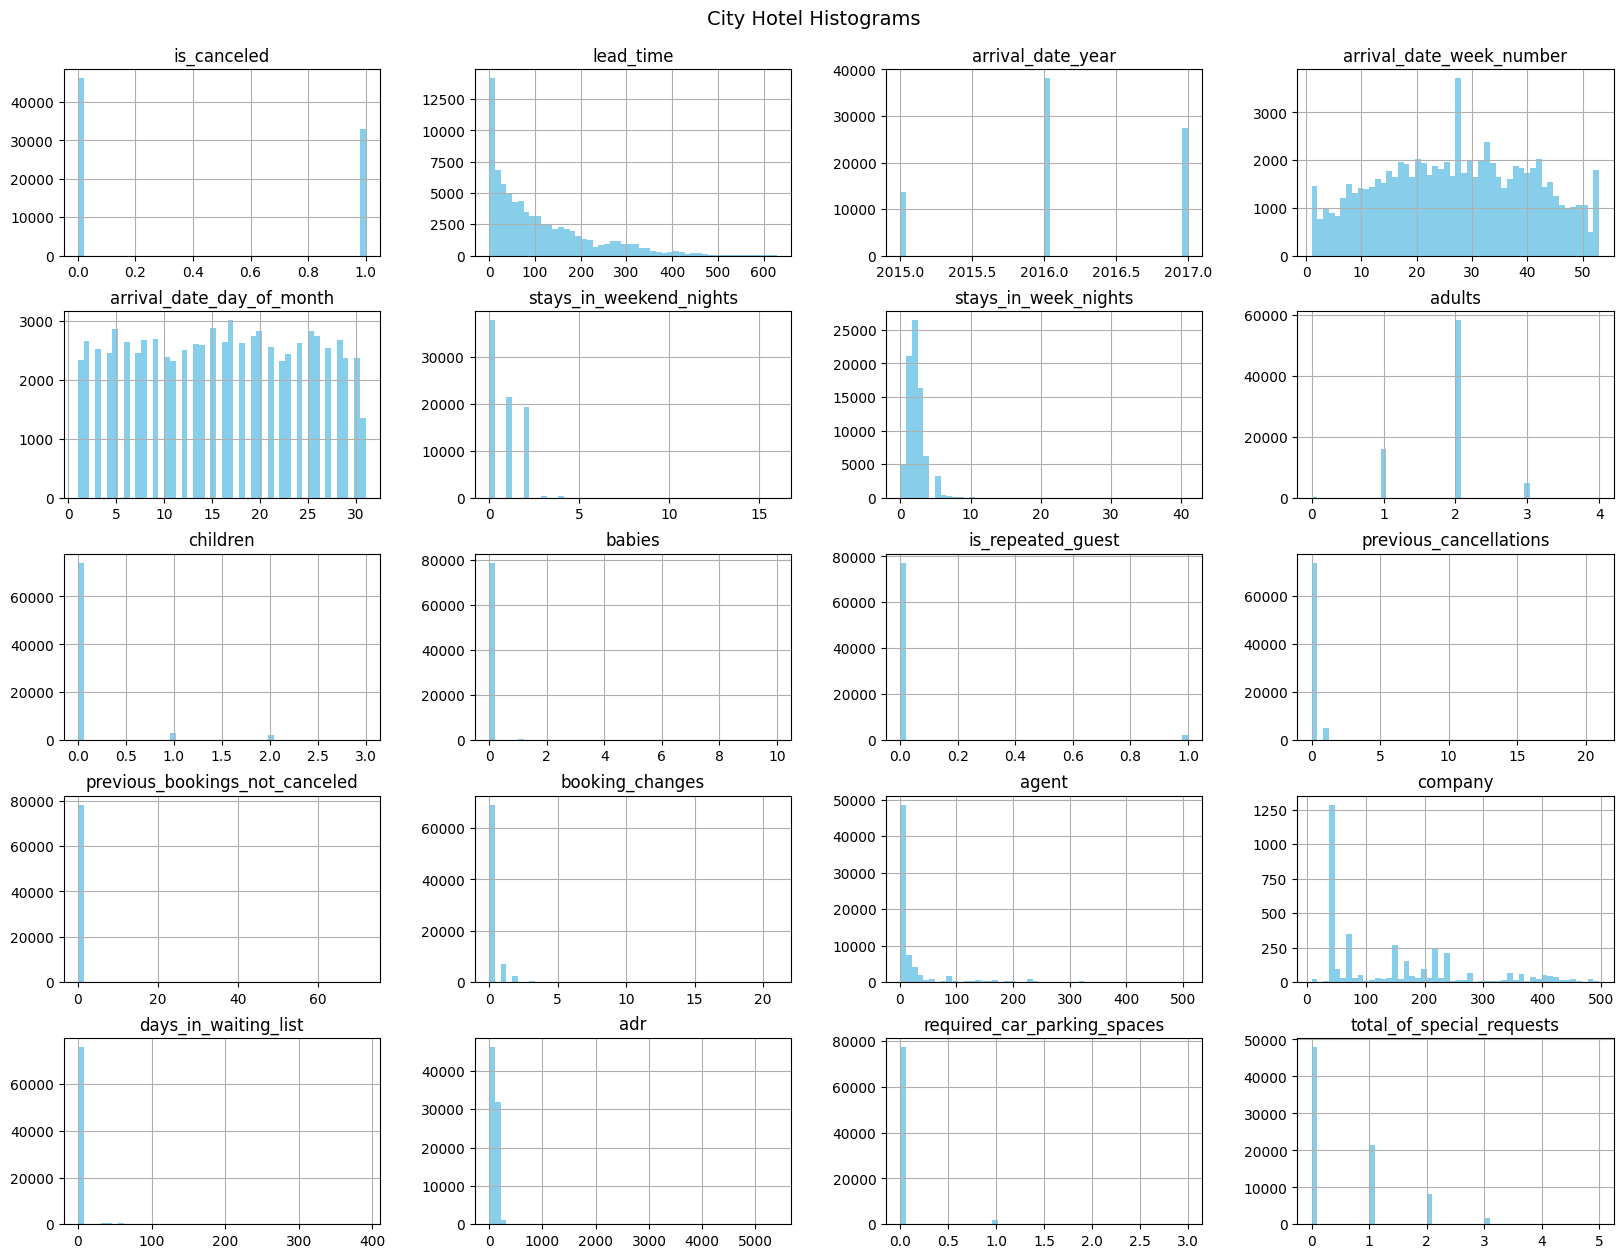

None

In [13]:
display(plot_histograms(df_city, bins=50, figsize=(20,15), title='City Hotel Histograms'))

**Wawasan / Insights :**  
- Dari plot Histogram untuk dataset tipe City Hotel menunjukkan banyak kolom yang memiliki persebaran data tidak normal dan cenderung miring ke kanan (right-skewed).
- Persebaran data juga terpusat/kebanyakan ada pada nilai 0.
- Melihat dari banyaknya kolom yang memiliki persebaran data tidak normal, maka penanganan data outlier akan menggunakan metode Z-Score.

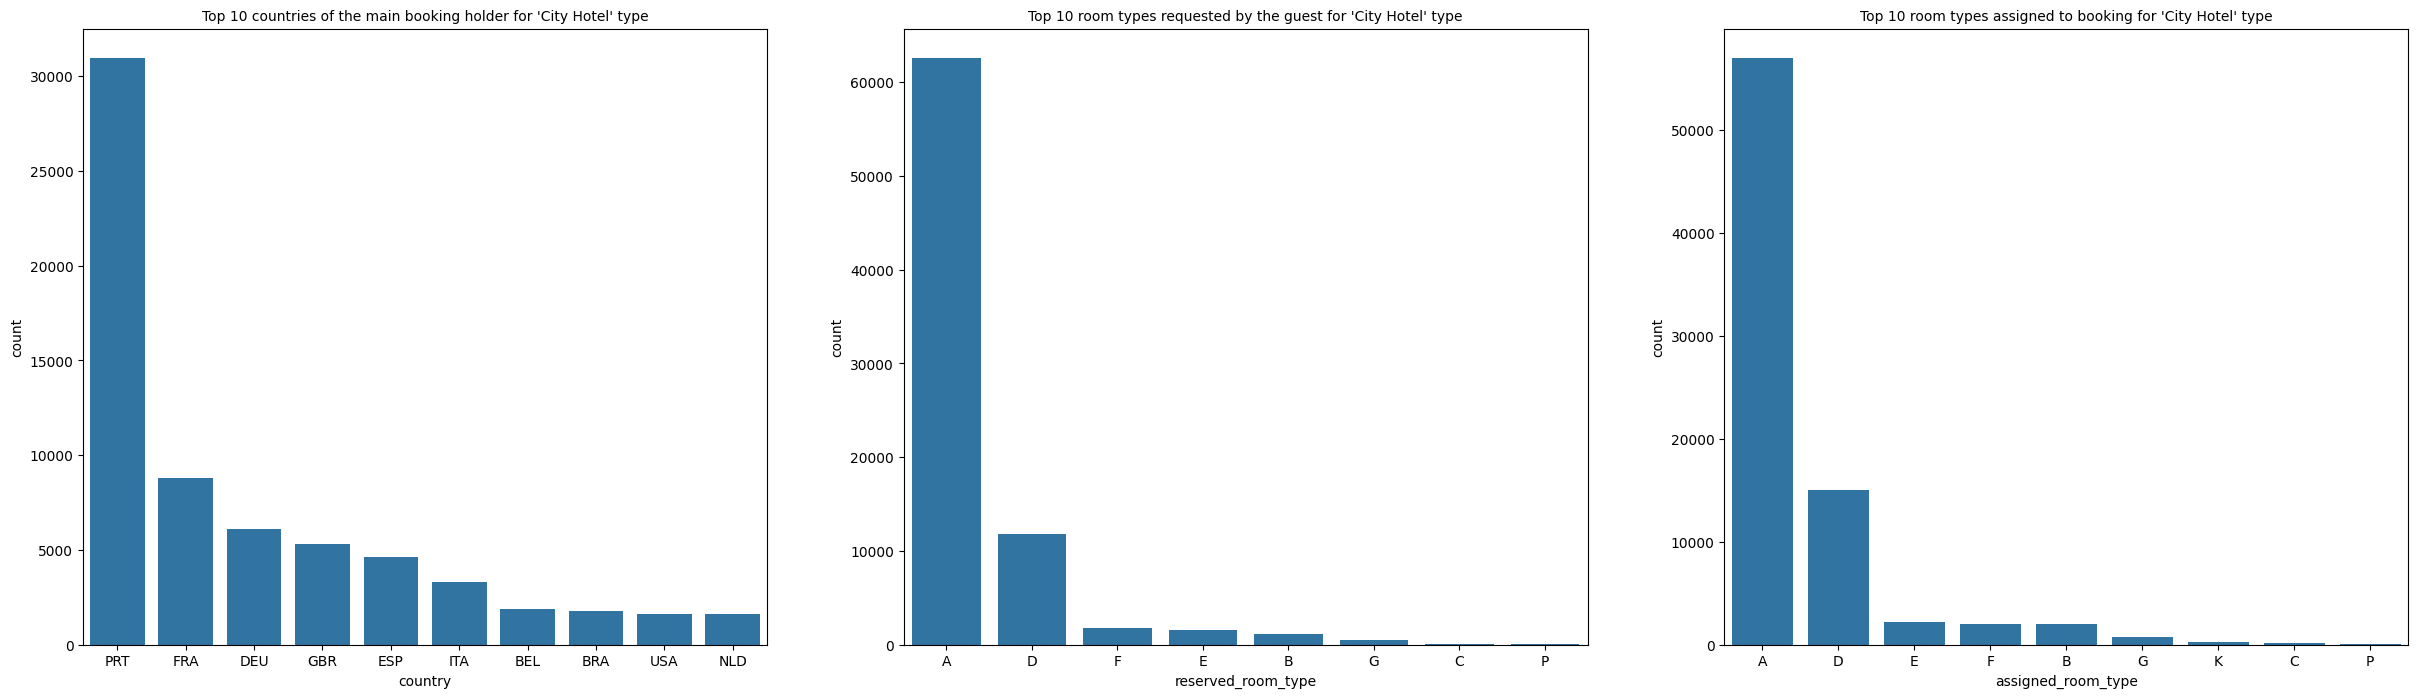

In [14]:
# Membangun grafik visualisasi untuk variable kategorikal
plt.figure(figsize=(30,8))

plt.subplot(1,3,1)
sns.countplot(x = df_city['country'], order = df_city['country'].value_counts().iloc[:10].index)
plt.title("Top 10 countries of the main booking holder for 'City Hotel' type", size = 10)

plt.subplot(1,3,2)
sns.countplot(x = df_city['reserved_room_type'], order = df_city['reserved_room_type'].value_counts().iloc[:10].index)
plt.title("Top 10 room types requested by the guest for 'City Hotel' type", size = 10)

plt.subplot(1,3,3)
sns.countplot(x = df_city['assigned_room_type'], order = df_city['assigned_room_type'].value_counts().iloc[:10].index)
plt.title("Top 10 room types assigned to booking for 'City Hotel' type", size = 10)

plt.show()

**Wawasan / Insights :**  
- 10 negara asal pelanggan terbanyak adalah Portugal, France, Germany, United Kingdom, Spain, Italy, Belgium, Brazil, USA dan Netherlands, karena kolom 'Country' memiliki nilai unik yang banyak, maka akan dianalisis lebih lanjut untuk penyederhanaan datanya.
- Top 10 jenis kamar yang diminta oleh pelanggan adalah Land A, D, F, E, B, G, C, dan P.
- Dari gambar di atas, jenis kamar A, D, dan E paling sering ditetapkan dalam pemesanan oleh pelanggan.

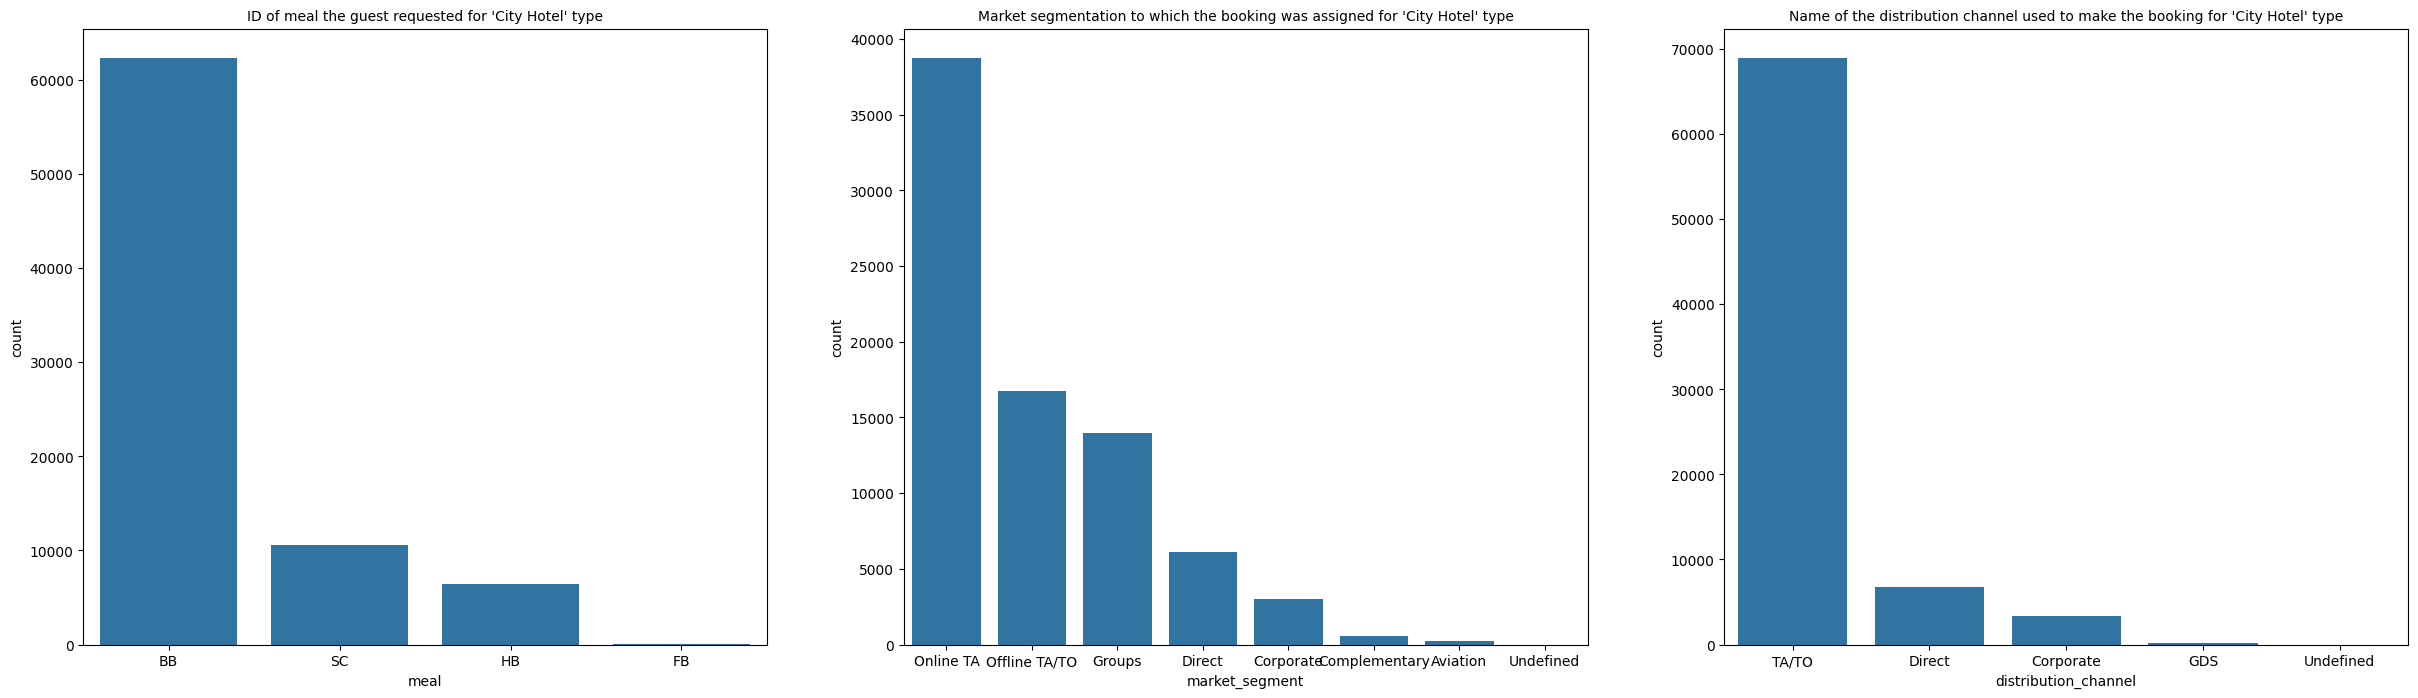

In [15]:
# Membangun grafik visualisasi untuk variable kategorikal
plt.figure(figsize=(30,8))

plt.subplot(1,3,2)
sns.countplot(x = df_city['market_segment'], order = df_city['market_segment'].value_counts().index)
plt.title("Market segmentation to which the booking was assigned for 'City Hotel' type", size = 10)

plt.subplot(1,3,3)
sns.countplot(x = df_city['distribution_channel'], order = df_city['distribution_channel'].value_counts().index)
plt.title("Name of the distribution channel used to make the booking for 'City Hotel' type", size = 10)

plt.subplot(1,3,1)
sns.countplot(x = df_city['meal'], order = df_city['meal'].value_counts().index)
plt.title("ID of meal the guest requested for 'City Hotel' type", size = 10)

plt.show()

**Wawasan / Insights :**
- Berdasarkan jenis makanan yang diminta pelanggan, ID makanan dengan kode BB memiliki jumlah data paling tinggi.
- Online TA menempati urutan pertama berdasarkan segmentasi pasar ketika pemesanan ditetapkan.
- Sedangkan pada nama saluran distribusinya, TA/TO menjadi yang paling tinggi dengan perbedaan data yang cukup signifikan jika dibandingkan dengan data kedua dan seterusnya.

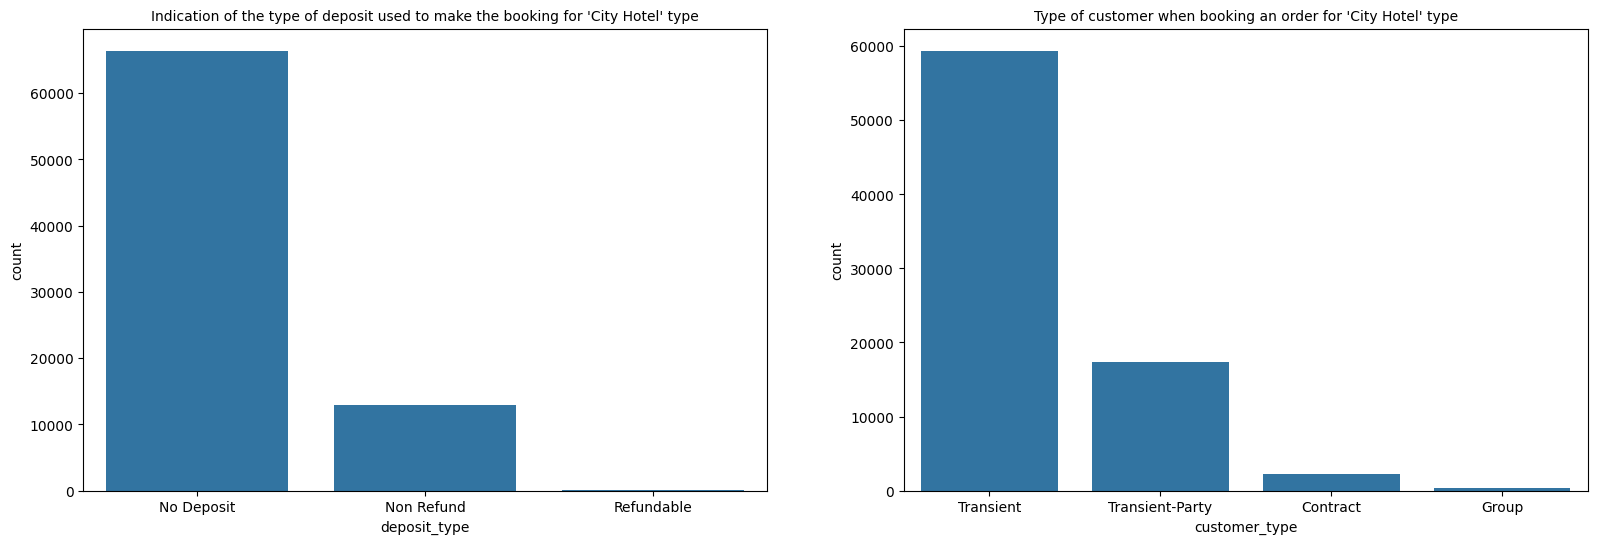

In [16]:
# Membangun grafik visualisasi untuk variable kategorikal
plt.figure(figsize=(30,6))

plt.subplot(1,3,2)
sns.countplot(x = df_city['deposit_type'], order = df_city['deposit_type'].value_counts().index)
plt.title("Indication of the type of deposit used to make the booking for 'City Hotel' type", size = 10)

plt.subplot(1,3,3)
sns.countplot(x = df_city['customer_type'], order = df_city['customer_type'].value_counts().index)
plt.title("Type of customer when booking an order for 'City Hotel' type", size = 10)

plt.show()

**Wawasan / Insights :**
- Dapat terlihat bahwa tipe No Deposit memiliki jumlah data paling tinggi dan sangat signifikan perbedaannya, karena hal tersebut maka akan dianalisis lebih jauh.
- Untuk jenis pelanggannya, Transient memiliki data tertinggi jika dibandingkan yang lainnya.

In [17]:
# Menampilkan informasi mengenai Variable 'arrival_date_month'
print("Tipe 'City Hotel'\n",df_city['arrival_date_month'].value_counts())

Tipe 'City Hotel'
 arrival_date_month
August       8983
May          8232
July         8088
June         7894
October      7605
April        7480
September    7400
March        6458
February     4965
November     4357
December     4132
January      3736
Name: count, dtype: int64


**Wawasan / Insights :**
- Persebaran data Bulan dari tanggal kedatangan yang diwakili oleh variable 'arrival_date_month' memiliki jumlah terbanyak di bulan Agustus.

In [18]:
# Menampilkan informasi mengenai Variable 'reservation_status'
print("Tipe 'City Hotel'\n",df_city['reservation_status'].value_counts())

Tipe 'City Hotel'
 reservation_status
Check-Out    46228
Canceled     32186
No-Show        916
Name: count, dtype: int64


**Wawasan / Insights :**
- Berdasarkan status pemesanannya, Check-Out memiliki jumlah data paling tinggi, kemudian Canceled dan No-Show.

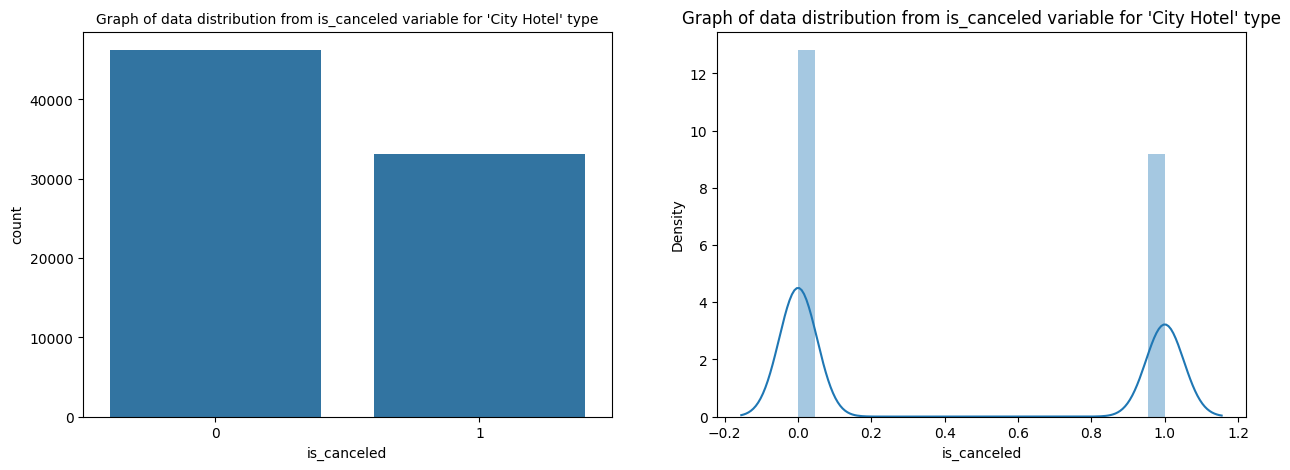

In [19]:
# Menampilkan visualisasi grafik untuk Variable 'is_canceled'
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = df_city['is_canceled'], order = df_city['is_canceled'].value_counts().index)
plt.title("Graph of data distribution from is_canceled variable for 'City Hotel' type", size = 10)

plt.subplot(1,2,2)
plt.title("Graph of data distribution from is_canceled variable for 'City Hotel' type")
sns.distplot(df_city.is_canceled)
plt.ticklabel_format(useOffset = False, style = 'plain', axis = ('x'))

plt.show()

**Wawasan / Insights :**
- Untuk kolom is_canceled yang akan menjadi variabel target, jumlah target 0 (yang tidak melakukan pembatalan) memiliki jumlah data lebih banyak dibandingkan jumlah target 1 (yang melakukan pembatalan).
-Namun distribusi kolom is_canceled termasuk kriteria balance

### 2.3.2. Resort Hotel  
Resort hotel adalah hotel yang biasanya terletak jauh dari perkotaan, seperti pegunungan, tepi pantai, tepi sungai, atau tepi danau. Hotel jenis ini umumnya menjadi pilihan orang - orang yang ingin berlibur sambil beristirahat. Hal ini dikarenakan Resort Hotel biasanya selalu memiliki lingkungan dengan suasana lebih tenang dan nyaman, serta pemandangan yang indah. [Sumber 3](https://www.gramedia.com/literasi/pengertian-hotel/#3_Resort_hotel)  
Berikut adalah gambaran sebaran data Resort Hotel dari dataset yang dimiliki.

In [20]:
# Menampilkan ringkasan statistik data numerik
df[df['hotel'] == 'Resort Hotel'].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,40060.0000,40060.0000,40060.0000,40060.0000,40060.0000,40060.0000,40060.0000,40060.0000,40060.0000,40060.0000,40060.0000,40060.0000,40060.0000,40060.0000,31851.0000,3108.0000,40060.0000,40060.0000,40060.0000,40060.0000
mean,0.2776,92.6757,2016.1214,27.1409,15.8212,1.1898,3.1287,1.8671,0.1287,0.0139,0.0444,0.1017,0.1465,0.2880,217.5717,241.4862,0.5278,94.9529,0.1381,0.6198
std,0.4478,97.2853,0.7223,14.0054,8.8837,1.1478,2.4613,0.6973,0.4452,0.1190,0.2059,1.3351,1.0020,0.7265,88.2645,125.9307,7.4286,61.4424,0.3510,0.8139
min,0.0000,0.0000,2015.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,6.0000,0.0000,-6.3800,0.0000,0.0000
25%,0.0000,10.0000,2016.0000,16.0000,8.0000,0.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,240.0000,154.0000,0.0000,50.0000,0.0000,0.0000
50%,0.0000,57.0000,2016.0000,28.0000,16.0000,1.0000,3.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,240.0000,223.0000,0.0000,75.0000,0.0000,0.0000
75%,1.0000,155.0000,2017.0000,38.0000,24.0000,2.0000,5.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,242.0000,330.0000,0.0000,125.0000,0.0000,1.0000
max,1.0000,737.0000,2017.0000,53.0000,31.0000,19.0000,50.0000,55.0000,10.0000,2.0000,1.0000,26.0000,30.0000,17.0000,535.0000,543.0000,185.0000,508.0000,8.0000,5.0000


**Wawasan / Insights :**  
- Dari deskripsi statistik data numerik pada Resort Hotel terlihat sama seperti pada City Hotel bahwa kebanyakan kolom memiliki nilai minimum 0 dan persebaran datanya tidak normal jika dilihat dari nilai standard deviationnya.

In [21]:
# Menampilkan ringkasan statistik data kategorikal
df[df['hotel'] == 'Resort Hotel'].describe(exclude="number")

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,40060,40060,40060,39596,40060,40060,40060,40060,40060,40060,40060,40060
unique,1,12,5,125,6,4,10,11,3,4,3,913
top,Resort Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-01-19
freq,40060,4894,30005,17630,17729,28925,23399,17046,38199,30209,28938,147


**Wawasan / Insights :**  
- Sama seperti sebelumnya, untuk deskripsi statistik data kategorikal pada Resort Hotel ini akan dilakukan perubahan format untuk kolom 'reservation_status_date' menjadi _datetime_. Di luar itu, kolom 'country' masih memiliki nilai unik paling banyak dengan jumlah 125 nama. Kolom dengan nilai unik paling sedikit adalah kolom 'deposit_type' dan 'reservation_status', masing - masing 3 tipe saja.

<Axes: >

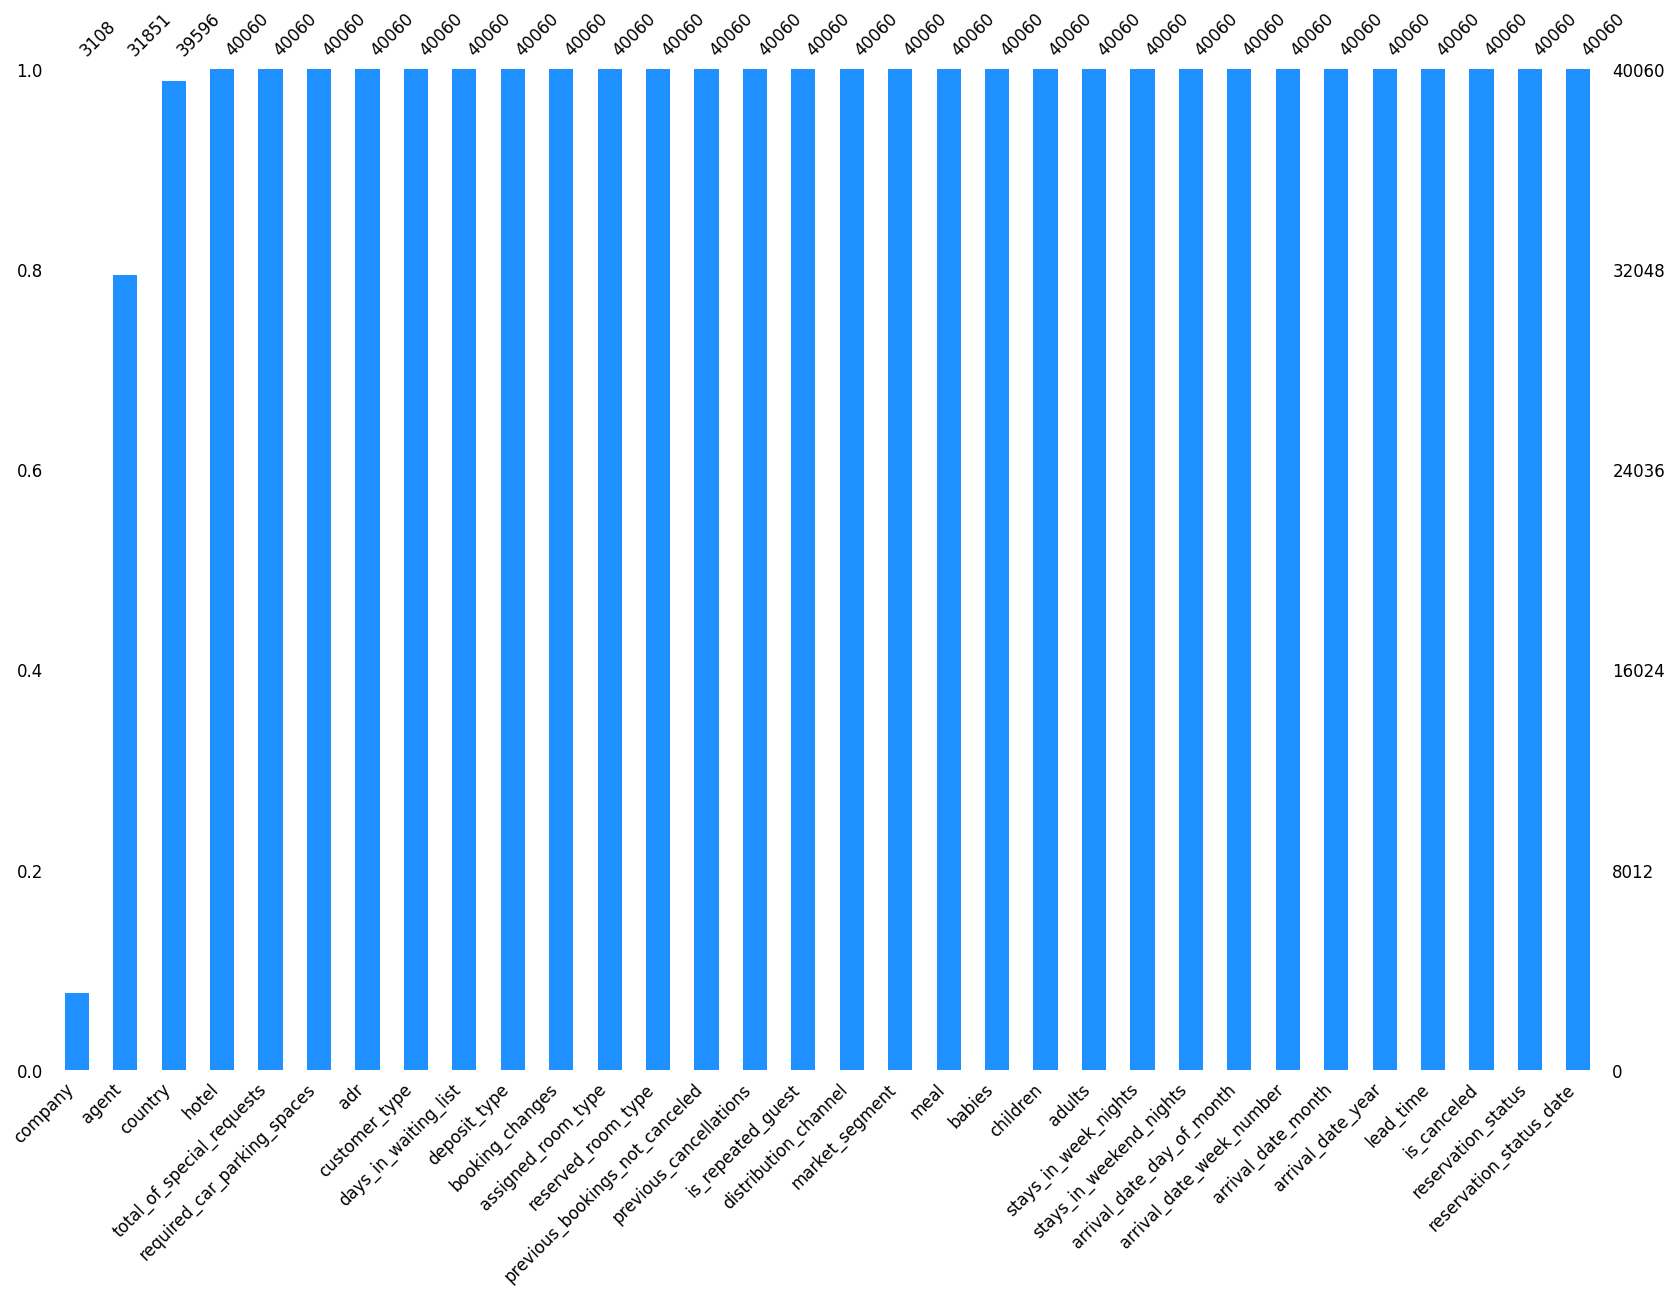

In [22]:
# Barplot dari keseluruhan data Resort Hotel
missingno.bar(df[df['hotel'] == 'Resort Hotel'], color = "dodgerblue", sort = "ascending", figsize = (20,13), fontsize = 12)

**Wawasan / Insights :**  
- Terlihat dari Bar Plot bahwa kolom 'company', 'agent', dan 'country' memiliki missing values/data yang hilang. (informasi ini sebenarnya dapat dilihat juga ditable atas). Kemudian berdasarkan Bar Plot tersebut juga, kolom 'company' adalah kolom yang memiliki data yang hilang terbanyak, sedangkan kolom 'country' memiliki hanya sedikit saja data yang hilang, informasi ini sama dengan tipe City Hotel. Akan ditangani lebih jauh pada tahap Data Cleaning.

<Axes: >

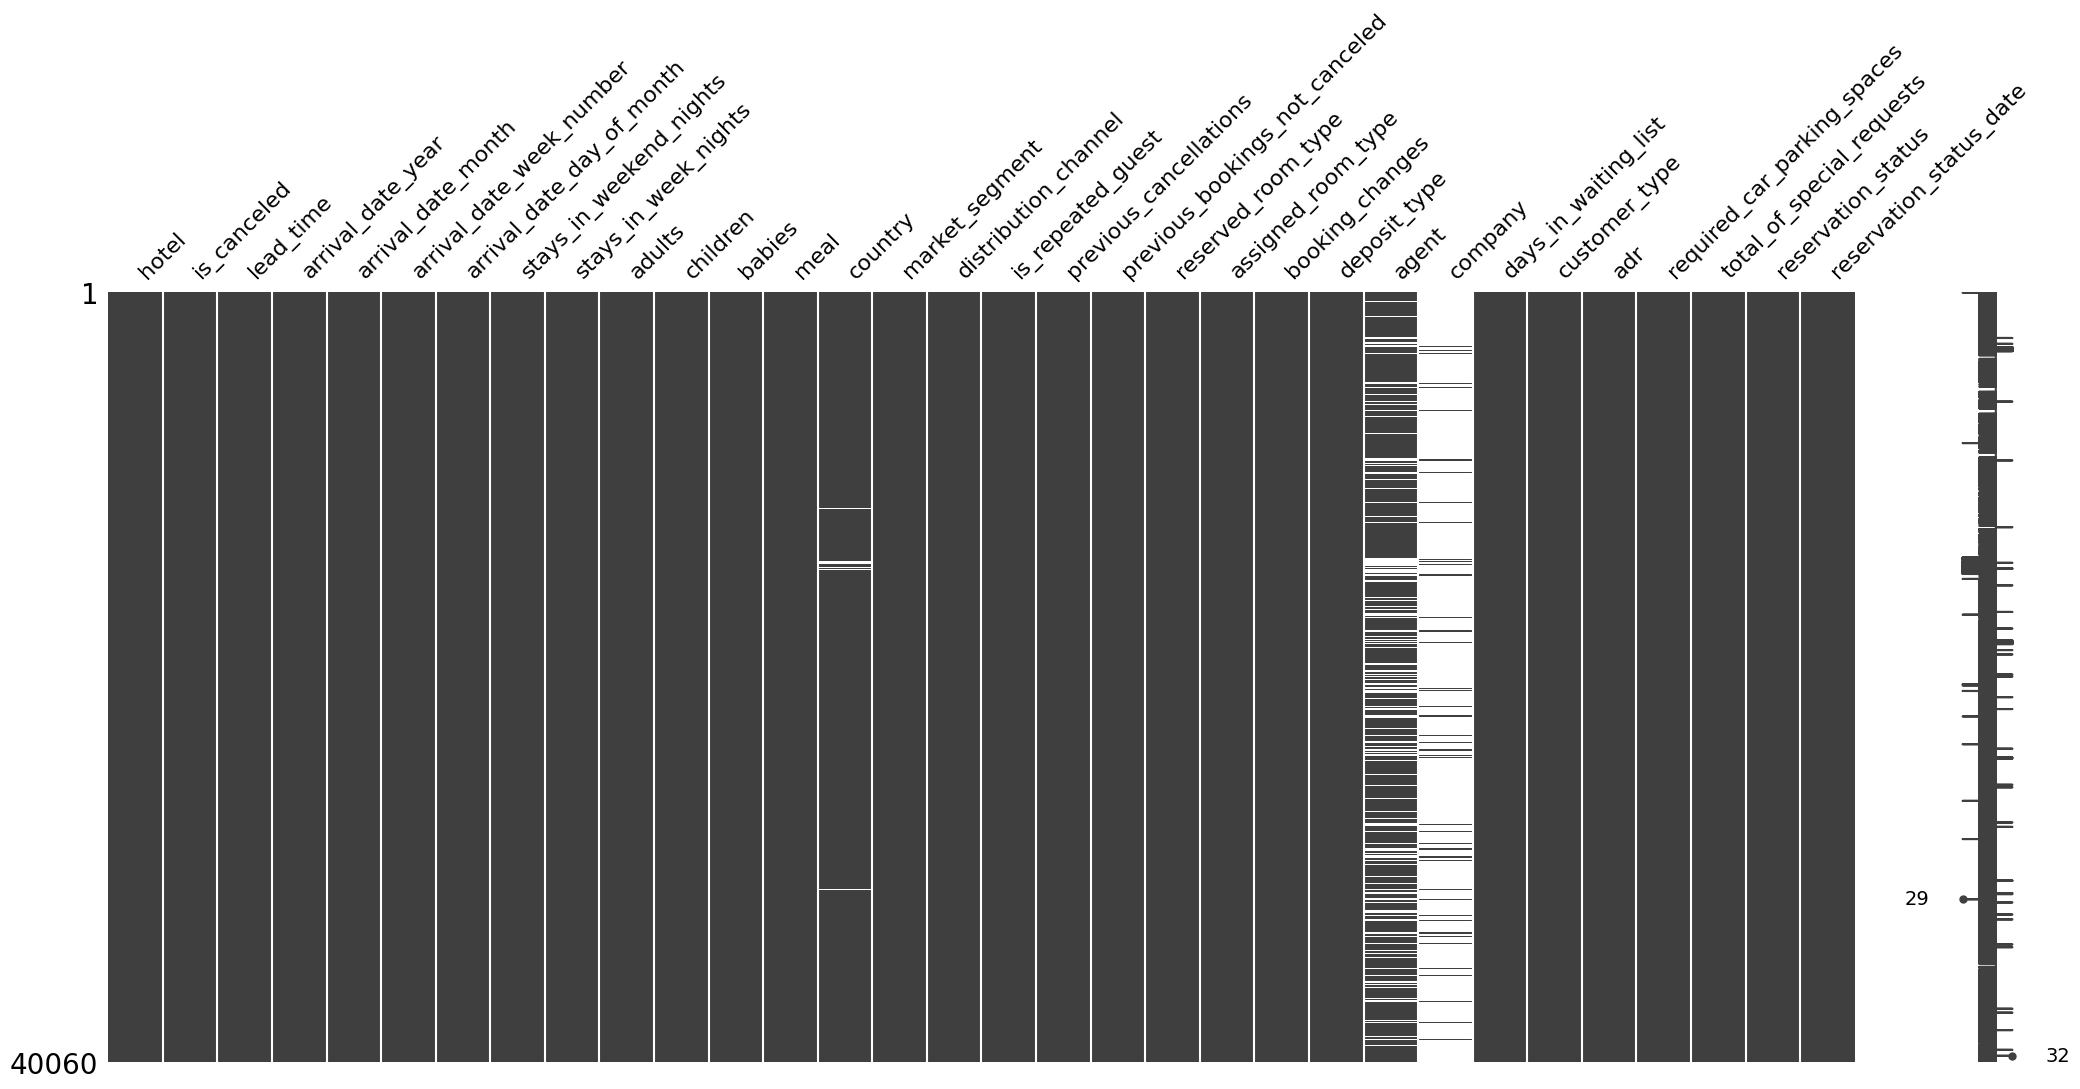

In [23]:
# Matrix plot dari keseluruhan data Resort Hotel
missingno.matrix(df[df['hotel'] == 'Resort Hotel'])

**Wawasan / Insights :**  
- Terlihat bahwa _missing value_ pada setiap kolom memiliki pola yang cukup acak, sama seperti tipe City Hotel.

In [24]:
# Jumlah data Resort Hotel dalam Dataset
df_resort = df[df['hotel'] == 'Resort Hotel']
print(f"Resort Hotel data has {df_resort.shape[0]} rows.")

Resort Hotel data has 40060 rows.


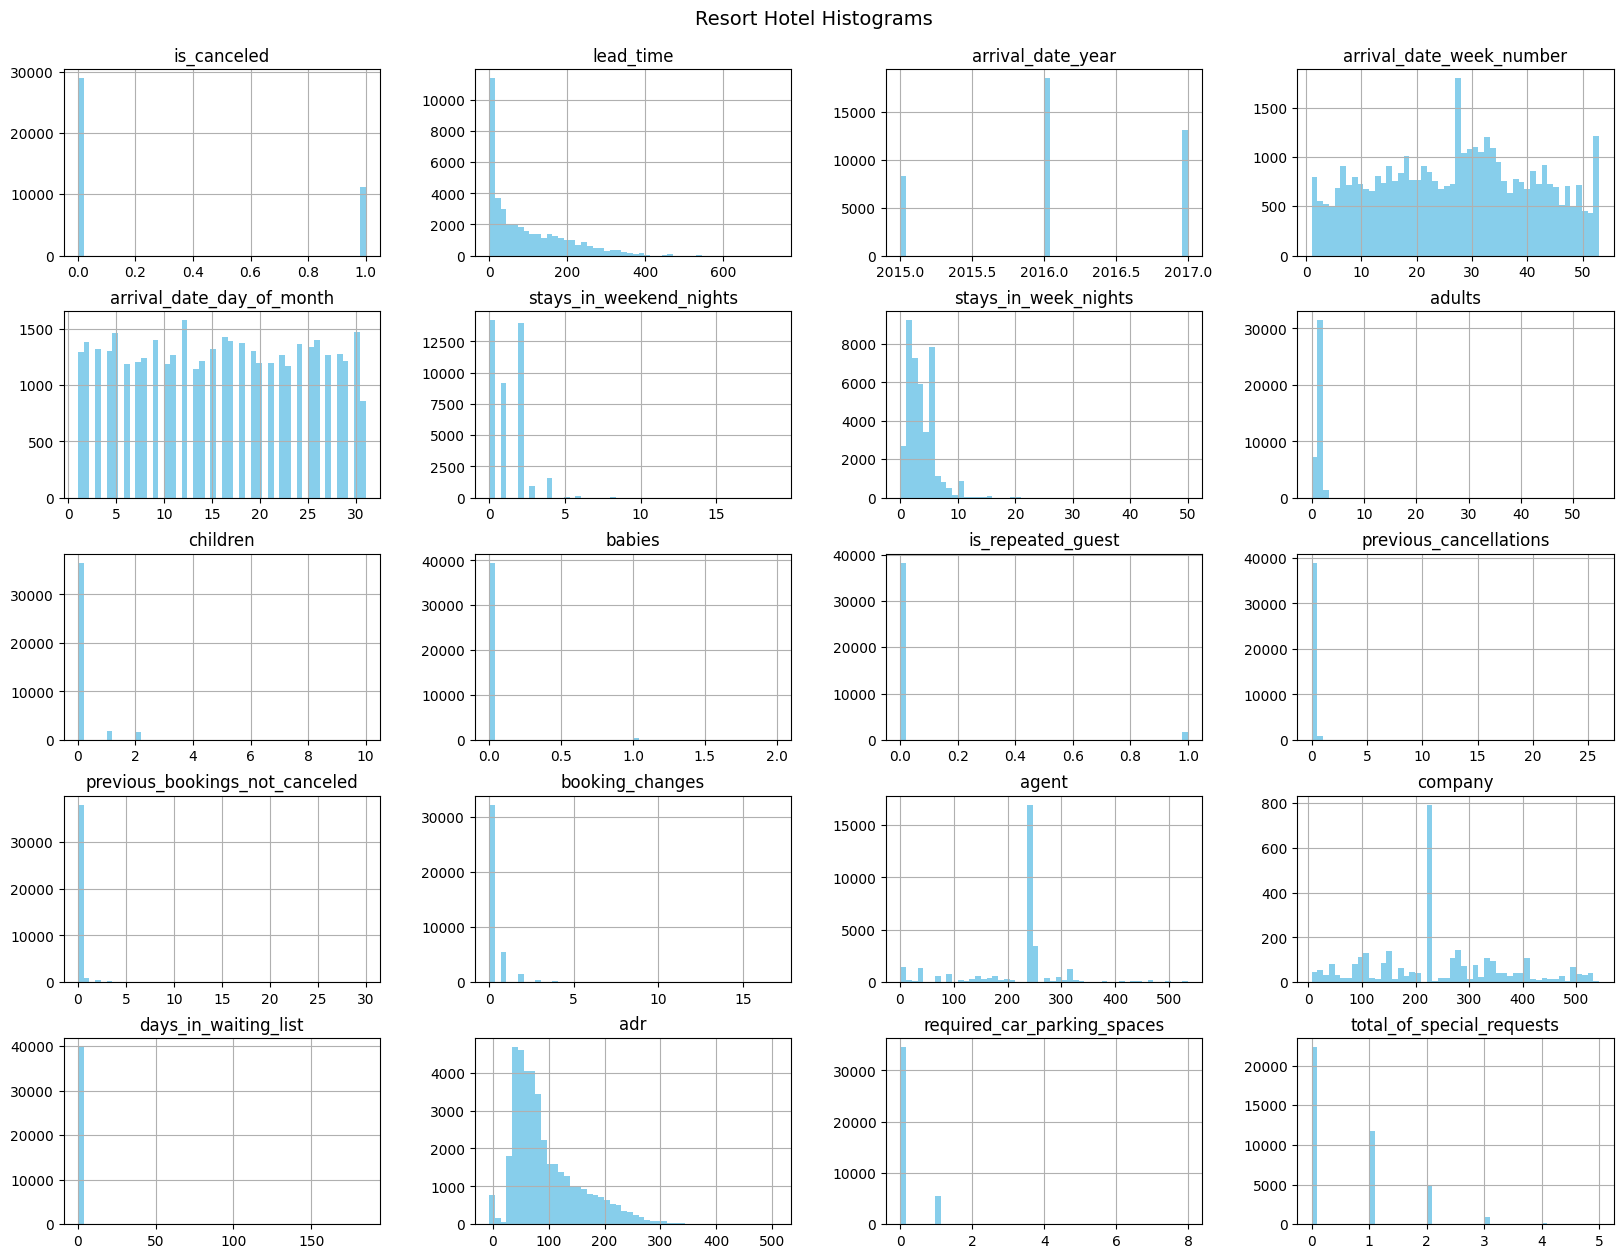

None

In [25]:
# Membangun grafik visualisasi untuk variable numerikal
display(plot_histograms(df_resort, bins=50, figsize=(20,15), title='Resort Hotel Histograms'))

**Wawasan / Insights :**  
- Dari plot Histogram untuk dataset tipe Resort Hotel menunjukkan banyak kolom yang memiliki persebaran data tidak normal dan cenderung miring ke kanan (right-skewed), tidak jauh berbeda dengan tipe City Hotel.
- Persebaran data juga terpusat/kebanyakan ada pada nilai 0.
- Sama seperti sebelumnya, untuk penanganan data outlier akan menggunakan metode Z-Score.

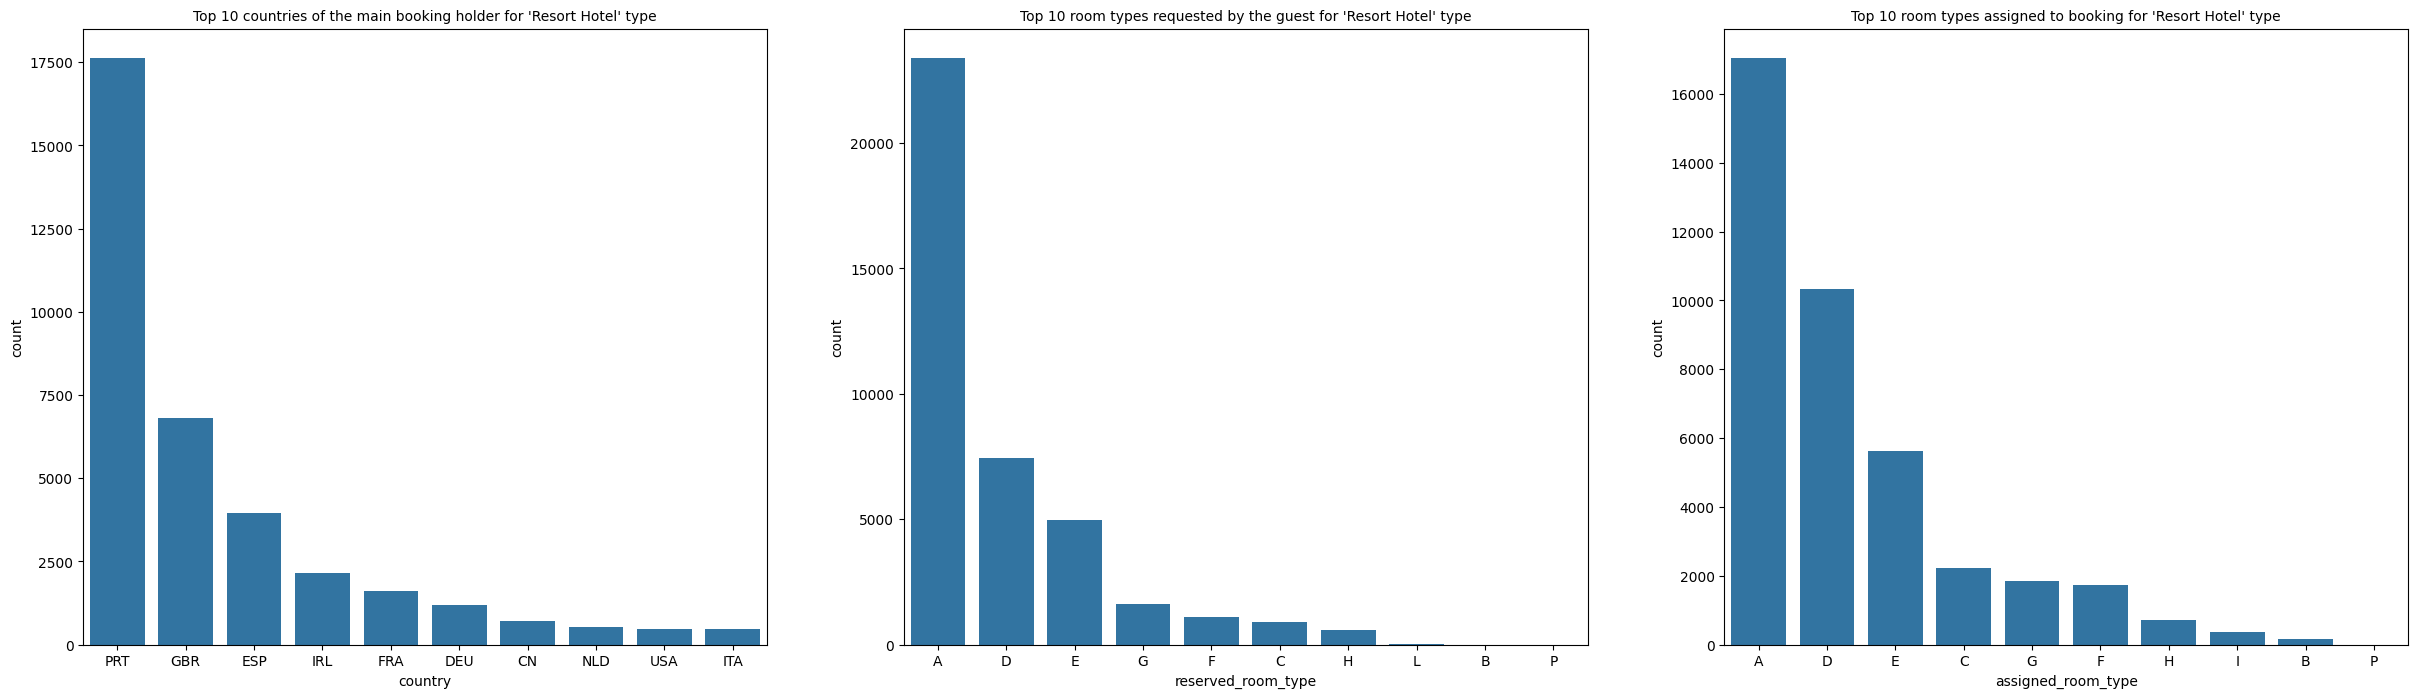

In [26]:
# Membangun grafik visualisasi untuk variable kategorikal
plt.figure(figsize=(30,8))

plt.subplot(1,3,1)
sns.countplot(x = df_resort['country'], order = df_resort['country'].value_counts().iloc[:10].index)
plt.title("Top 10 countries of the main booking holder for 'Resort Hotel' type", size = 10)

plt.subplot(1,3,2)
sns.countplot(x = df_resort['reserved_room_type'], order = df_resort['reserved_room_type'].value_counts().iloc[:10].index)
plt.title("Top 10 room types requested by the guest for 'Resort Hotel' type", size = 10)

plt.subplot(1,3,3)
sns.countplot(x = df_resort['assigned_room_type'], order = df_resort['assigned_room_type'].value_counts().iloc[:10].index)
plt.title("Top 10 room types assigned to booking for 'Resort Hotel' type", size = 10)

plt.show()

**Wawasan / Insights :**  
- Ada sedikit perbedaan dengan tipe City Hotel pada urutan top 10 negara asal pelanggan terbanyak yaitu Portugal, United Kingdom, Spain, Ireland, France, Germany, China, Netherlands, USA and Italy, akan dianalisis lebih lanjut juga untuk penyederhanaan datanya.
- Begitu juga pada top 10 jenis kamar yang diminta oleh pelanggan adalah Land A, D, E, G, F, C, H, L, B dan P, yang mana jumlah nya lebih banyak juga.
- Untuk jenis kamar yang ditetapkan pelanggan, jenis kamar A, D, dan E masih paling sering ditetapkan dalam pemesanan oleh pelanggan.

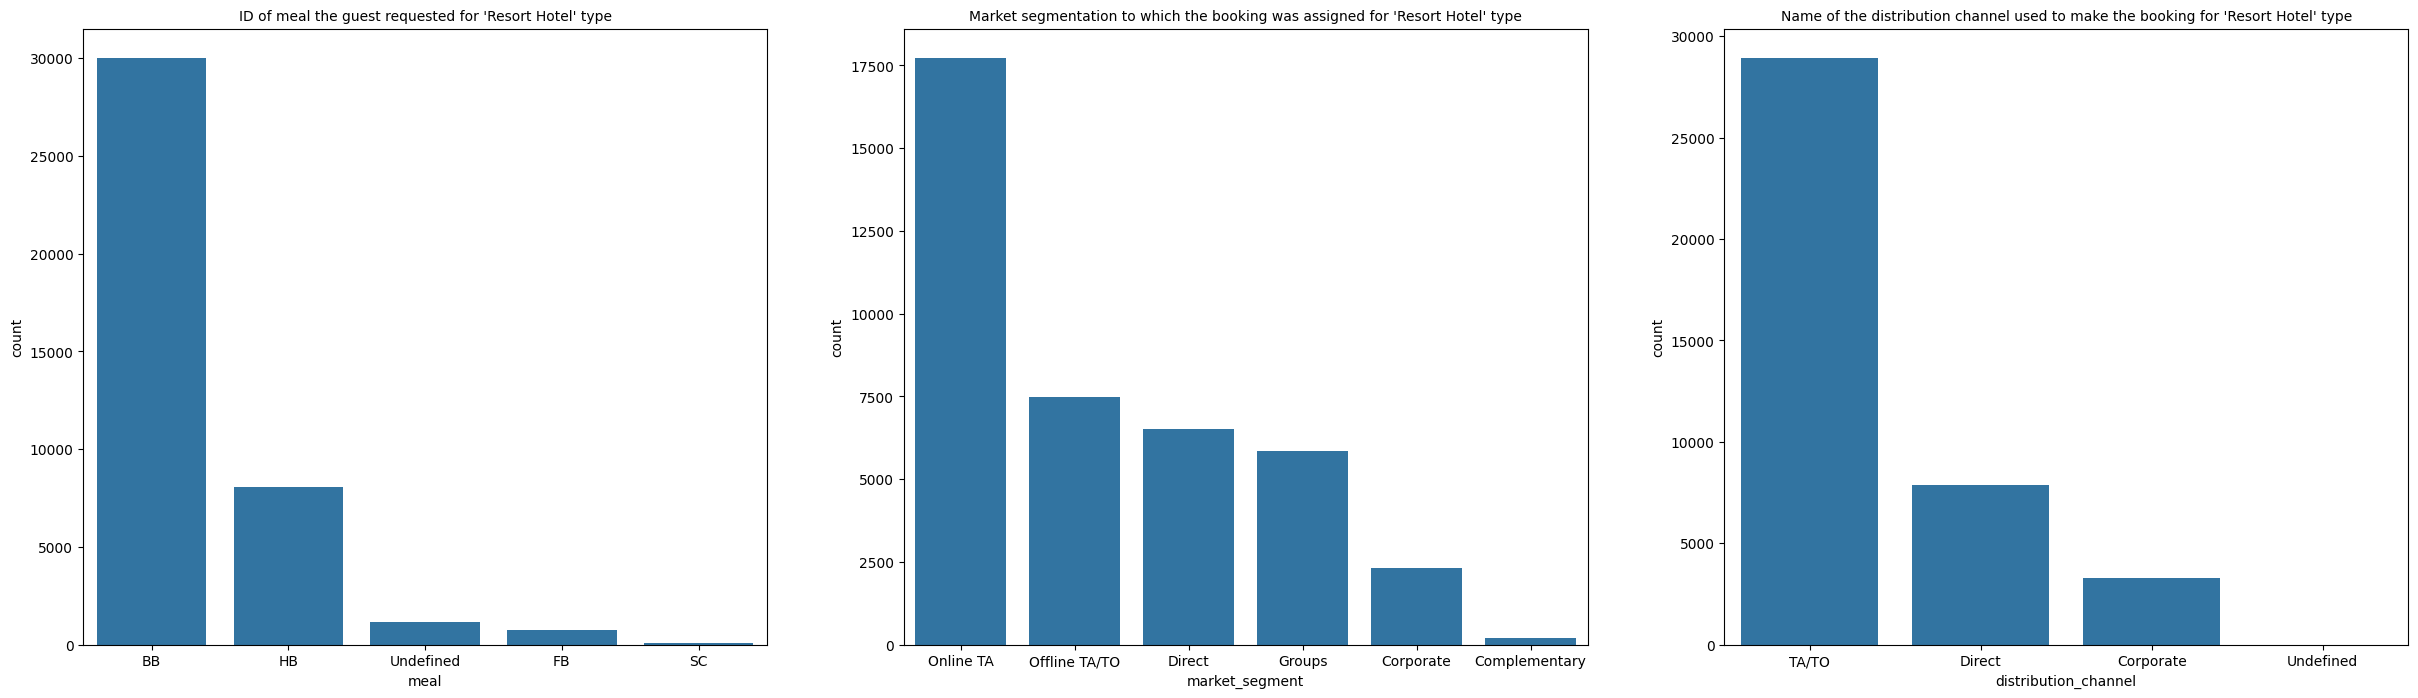

In [27]:
# Membangun grafik visualisasi untuk variable kategorikal
plt.figure(figsize=(30,8))

plt.subplot(1,3,2)
sns.countplot(x = df_resort['market_segment'], order = df_resort['market_segment'].value_counts().index)
plt.title("Market segmentation to which the booking was assigned for 'Resort Hotel' type", size = 10)

plt.subplot(1,3,3)
sns.countplot(x = df_resort['distribution_channel'], order = df_resort['distribution_channel'].value_counts().index)
plt.title("Name of the distribution channel used to make the booking for 'Resort Hotel' type", size = 10)

plt.subplot(1,3,1)
sns.countplot(x = df_resort['meal'], order = df_resort['meal'].value_counts().index)
plt.title("ID of meal the guest requested for 'Resort Hotel' type", size = 10)

plt.show()

**Wawasan / Insights :**  
- Berdasarkan jenis makanan yang diminta pelanggan pada tipe Resort Hotel, jenis makanan dengan ID BB memiliki jumlah data paling tinggi sama dengan tipe City Hotel.
- Begitu juga Online TA menempati urutan pertama berdasarkan segmentasi pasar ketika pemesanan ditetapkan pada tipe Resort Hotel.
- Diikuti oleh TA/TO juga yang masih menjadi urutan paling tinggi pada nama saluran distribusi untuk tipe Resort Hotel.

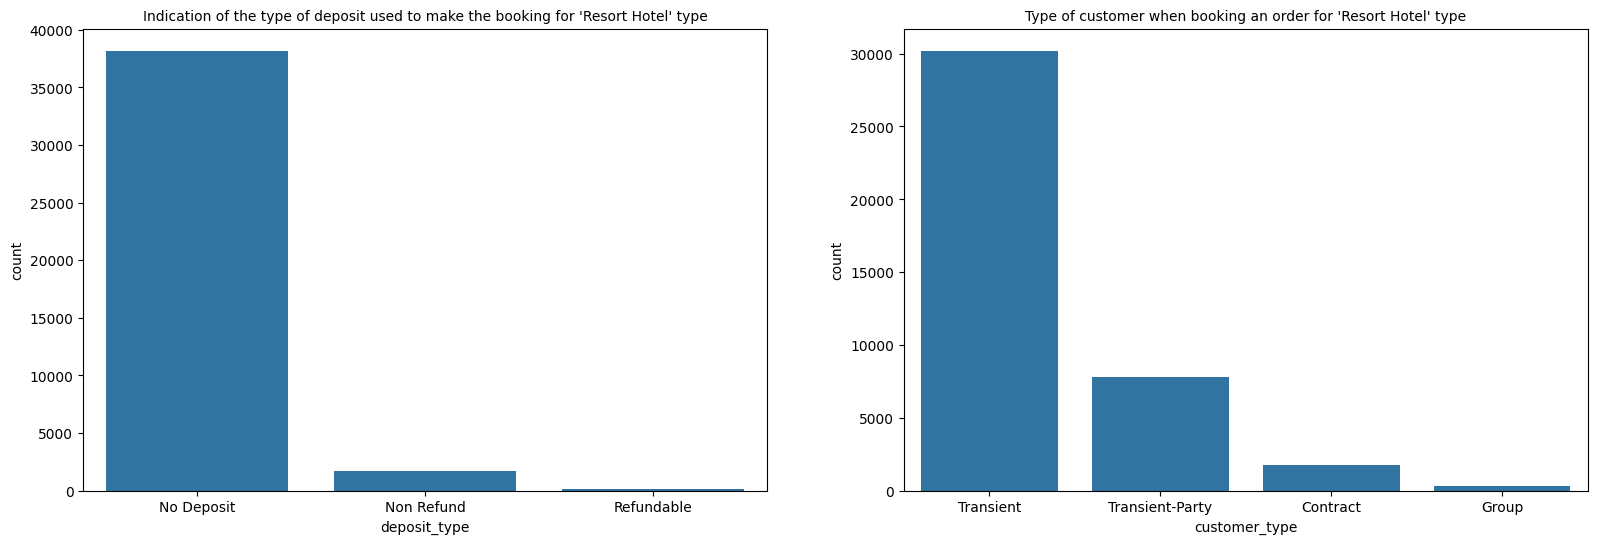

In [28]:
# Membangun grafik visualisasi untuk variable kategorikal
plt.figure(figsize=(30,6))

plt.subplot(1,3,2)
sns.countplot(x = df_resort['deposit_type'], order = df_resort['deposit_type'].value_counts().index)
plt.title("Indication of the type of deposit used to make the booking for 'Resort Hotel' type", size = 10)

plt.subplot(1,3,3)
sns.countplot(x = df_resort['customer_type'], order = df_resort['customer_type'].value_counts().index)
plt.title("Type of customer when booking an order for 'Resort Hotel' type", size = 10)

plt.show()

**Wawasan / Insights :**  
- Pada tipe Resort Hotel juga terlihat bahwa tipe No Deposit memiliki jumlah data paling tinggi dengan perbandingan yang sangat tinggi dari pada data lainnya, akan dianalisis lebih jauh.
- Untuk jenis pelanggan nya, Transient memiliki data tertinggi jika dibandingkan yang lainnya pada tipe Resort Hotel.

In [29]:
# Menampilkan informasi mengenai Variable 'arrival_date_month'
print("Tipe 'Resort Hotel'\n",df_resort['arrival_date_month'].value_counts())

Tipe 'Resort Hotel'
 arrival_date_month
August       4894
July         4573
April        3609
May          3559
October      3555
March        3336
September    3108
February     3103
June         3045
December     2648
November     2437
January      2193
Name: count, dtype: int64


**Wawasan / Insights :**  
- Masih sama dengan City Hotel, pada Resort Hotel ini variable 'arrival_date_month' memiliki jumlah terbanyak di bulan Agustus untuk bulan kedatangannya.

In [30]:
# Menampilkan informasi mengenai Variable 'reservation_status'
print("Tipe 'Resort Hotel'\n",df_resort['reservation_status'].value_counts())

Tipe 'Resort Hotel'
 reservation_status
Check-Out    28938
Canceled     10831
No-Show        291
Name: count, dtype: int64


**Wawasan / Insights :**  
- Berdasarkan status pemesanannya, Check-Out juga memiliki jumlah data paling tinggi, kemudian Canceled dan No-Show pada tipe Resort Hotel.

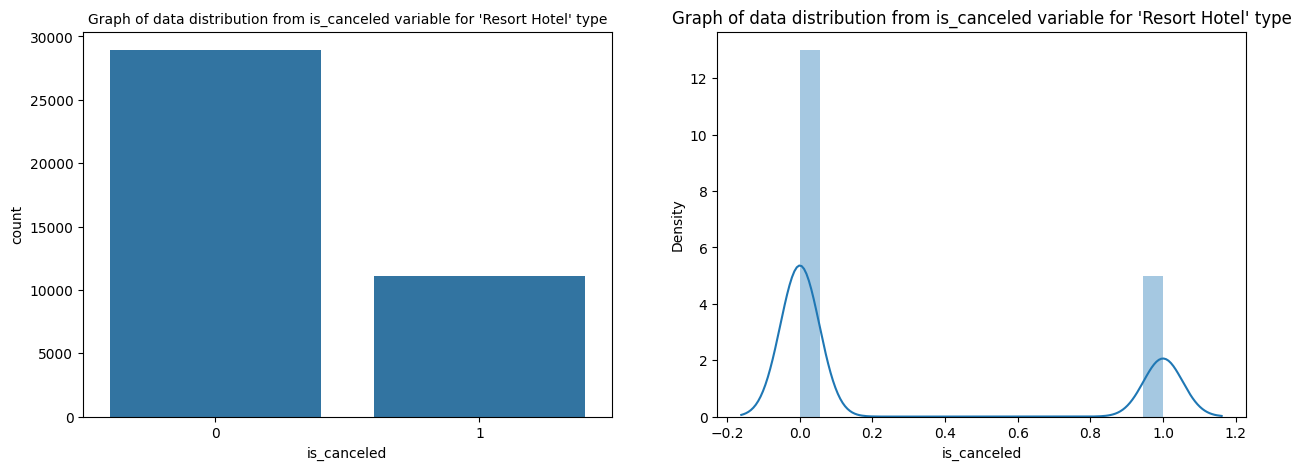

In [31]:
# Menampilkan visualisasi grafik untuk Variable 'is_canceled'
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(x = df_resort['is_canceled'], order = df_resort['is_canceled'].value_counts().index)
plt.title("Graph of data distribution from is_canceled variable for 'Resort Hotel' type", size = 10)

plt.subplot(1,2,2)
plt.title("Graph of data distribution from is_canceled variable for 'Resort Hotel' type")
sns.distplot(df_resort.is_canceled)
plt.ticklabel_format(useOffset = False, style = 'plain', axis = ('x'))

plt.show()

**Wawasan / Insights :**  
- Untuk kolom is_canceled yang akan menjadi variabel target, jumlah target 0 (yang tidak melakukan pembatalan) memiliki jumlah data lebih banyak dibandingkan jumlah target 1 (yang melakukan pembatalan),
- Walaupun begitu distribu data is_canceled pada resort hotel yaitu 34%:64% masih tergolong balanced, sehingga tidak perlu ditangani lebih lanjut

# **3. Preprocessing**  
Pada tahap ini, kita akan melakukan pembersihan data sebelum digunakan untuk proses analisis. Pembersihan data memiliki peran penting sebagai tahap awal pengolahan data karena data kotor dapat mempengaruhi hasil pengujian yang dilakukan. Proses pembersihan data umumnya terdiri dari menangani *missing value*, data anomali, format data, dan data duplikat.  

## 3.1. Missing Values  
Definisi *missing value* adalah data yang tidak memiliki nilai. *Missing value* dalam dataset umumnya teridentifikasi dengan nilai - nilai tertentu. Seperti NaN (*Not a Number*), NA (*Not Available*), *Undefined*, *Unknown*, atau -1.

In [32]:
# Check null values
df_null = pd.DataFrame({'Null Values' : df.isnull().sum(),
                        'Percentage Null Values' :
                         (df.isna().sum()) / (df.shape[0]) * (100)})
df_null = df_null[df_null['Null Values']>0]
df_null.sort_values('Percentage Null Values', ascending=False)

,Null Values,Percentage Null Values
company,112593,94.3069
agent,16340,13.6862
country,488,0.4087
children,4,0.0034


Terdapat beberapa penyebab terjadinya missing value, diantaranya adalah `interviewer recording error`, `respondent inability error`, dan `respondent unwillingness error`.

- `Interviewer recording error` adalah missing value yang terjadi akibat kelalaian petugas pengumpul data.
- `Respondent inability error` merupakan missing value yang terjadi akibat ketidakmampuan responden dalam memberikan jawaban akurat.
- `Unwillingness respondent error` adalah missing value yang terjadi karena responden tidak berkenan memberikan jawaban yang akurat. <br>
[Sumber 4](https://dqlab.id/kursus-belajar-data-mengenal-apa-itu-missing-value)

Berdasarkan tabel hasil di atas, kolom `company` memiliki presentase *missing values* sebesar 94%. Salah satu kemungkinan penyebabnya adalah `unwillingness respondent error`. Karena presentase yang diperoleh besar, maka kolom `company` akan dihapus. Hal ini berguna untuk menghindari kemungkinan *overfitting* pada model yang akan dibentuk nantinya.

In [33]:
# Delete Company column
df.drop('company', axis=1, inplace=True)

In [34]:
# Replace missing values
# agent: if no agency is given, we assume the booking is made without agent
# children: replace with 0 (no children)
# country: replace with Undefined value
nan_replacements = {"children": 0.0, "country": "Undefined", "agent": 0.0}
df.fillna(nan_replacements,inplace=True)

# Meal column contains Undefined values, we will replace those values with SC (Self-Catering) or no meal ordered
df["meal"].replace("Undefined", "SC", inplace=True)

## 3.2. Data Duplicates
Data duplikat adalah data yang sama tersimpan berulang di dalam dataset. Kita akan mengecek jumlah *true duplicates*, yaitu baris data yang setiap kolomnya persis sama dengan data di baris lainnya. *True duplicates* umumnya terjadi karena *error* pada saat memasukkan, pengumpulan, atau penggabungan data. Karena *true duplicates* tidak memberikan informasi tambahan dan dapat membuat hasil yang bias maka data ini akan dihapus.

In [35]:
# Check for duplicated rows
print('Number of duplicated rows = ', df.duplicated().sum())

Number of duplicated rows =  32001


Berdasarkan hasil di atas terdapat `32001` *true duplicates* yang akan dihapus.

In [36]:
df.drop_duplicates(inplace=True)

In [37]:
# Filter the rows where all of adults, children, and babies are 0
zero_guests = df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)]
num_zero_guests = len(zero_guests)

print(f'There are {num_zero_guests} bookings with 0 adults, children, and babies.')

There are 166 bookings with 0 adults, children, and babies.


Setelah data duplikat dihapus, terdapat `166` data pemesanan dengan jumlah tamu sama dengan 0. Secara konteks, hal ini tidak mungkin terjadi, karena tidak mungkin pemesanan kamar hotel dilakukan tanpa adanya jumlah tamu. Oleh karena itu,  data ini akan dihapus.

In [38]:
# Define a mask where any of adults, children, and babies are not zero
non_zero_guests = (df['adults']!=0) | (df['children']!=0) | (df['babies']!=0)

# Apply this mask to the dataframe
df = df[non_zero_guests]

In [39]:
display(df.info(), df.sample(5))

<class 'pandas.core.frame.DataFrame'>
Index: 87223 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87223 non-null  object 
 1   is_canceled                     87223 non-null  int64  
 2   lead_time                       87223 non-null  int64  
 3   arrival_date_year               87223 non-null  int64  
 4   arrival_date_month              87223 non-null  object 
 5   arrival_date_week_number        87223 non-null  int64  
 6   arrival_date_day_of_month       87223 non-null  int64  
 7   stays_in_weekend_nights         87223 non-null  int64  
 8   stays_in_week_nights            87223 non-null  int64  
 9   adults                          87223 non-null  int64  
 10  children                        87223 non-null  float64
 11  babies                          87223 non-null  int64  
 12  meal                            8722

None

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
17406,Resort Hotel,0,88,2015,October,41,5,1,4,2,0.0000,0,BB,CN,Complementary,TA/TO,0,0,0,A,C,1,No Deposit,96.0000,0,Transient,6.0000,1,0,Check-Out,2015-10-10
65203,City Hotel,1,40,2017,March,13,27,1,3,1,0.0000,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,85.0000,0,Transient,73.4400,0,0,Canceled,2017-03-13
36198,Resort Hotel,0,0,2017,May,19,13,0,1,2,0.0000,0,BB,PRT,Direct,Direct,1,0,0,E,E,0,No Deposit,0.0000,0,Transient,110.0000,0,0,Check-Out,2017-05-14
90096,City Hotel,0,54,2016,May,23,31,0,2,2,0.0000,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0000,0,Transient,126.9000,0,1,Check-Out,2016-06-02
20368,Resort Hotel,0,0,2016,January,5,25,1,1,1,0.0000,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,0.0000,0,Transient,39.0000,0,0,Check-Out,2016-01-27


## 3.3. Data Formatting  
*Data formatting* merupakan proses pengaturan data menjadi bentuk standar ekspresi umum agar lebih mudah dipahami. Masalah utama yang dapat timbul akibat format yang tidak sesuai adalah ketidakseragaman dalam merepresentasikan sebuah entitas, seperti : penggunaan satuan ukur yang tidak familiar, terdapat tipe data yang tidak sesuai, dan lainnya. [Sumber 5](https://ilmudatapy.com/penerapan-data-formatting-dengan-pandas-python/)

In [40]:
# Check for unique items in each column after removing duplicates
display_unique(df)

,Column Name,Total of Unique,null,Unique Sample
0,hotel,2,0,"[Resort Hotel, City Hotel]"
1,is_canceled,2,0,"[0, 1]"
2,lead_time,479,0,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,3,0,"[2015, 2016, 2017]"
4,arrival_date_month,12,0,"[July, August, September, October, November, D..."
5,arrival_date_week_number,53,0,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,31,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,17,0,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_week_nights,33,0,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,14,0,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 20, 6, 5, 10, 0]"


In [41]:
# Menampilkan kolom 'arrival_date_month' dari dataframe asli
arrival_date_month_values = df['arrival_date_month'].unique()
arrival_date_month_values


array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [42]:
# Convert 'children' column to int64
df['children'] = df['children'].astype(int)

In [43]:
# Convert 'reservation_status_date' column to datetime64
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [44]:
# We create new column is_use_agent to simply divide the agent column
# The reason is because agent should be categorical (name of travel agent) rather than numerical (agent ID)
df['is_use_agent'] = np.where(df['agent'] > 0.0, 1, 0)
df.drop('agent', axis=1, inplace= True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87223 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87223 non-null  object        
 1   is_canceled                     87223 non-null  int64         
 2   lead_time                       87223 non-null  int64         
 3   arrival_date_year               87223 non-null  int64         
 4   arrival_date_month              87223 non-null  object        
 5   arrival_date_week_number        87223 non-null  int64         
 6   arrival_date_day_of_month       87223 non-null  int64         
 7   stays_in_weekend_nights         87223 non-null  int64         
 8   stays_in_week_nights            87223 non-null  int64         
 9   adults                          87223 non-null  int64         
 10  children                        87223 non-null  int32         
 11  babies

## 3.4. Divide Dataset Based on Hotel Type  
Berdasarkan literatur, data yang sesuai dan pemilihan fitur yang baik sangatlah penting dalam membangun model pembatalan pemesanan. Pengetahuan domain yang luas sangat penting untuk memahami data dan melakukan pemilihan variabel yang baik (Guyon dan Elisseeff, 2003). <br>

Pengelolaan pendapatan hotel dan pengetahuan domain bisnis umum tidak cukup untuk melakukan pemilihan fitur yang baik. Penting juga untuk memahami operasi dan karakteristik khusus setiap hotel. Ini dapat membuat perbedaan dalam hal kinerja dan kecukupan model akhir.<br>

Oleh sebab itu, model yang akan dibangun mengadaptasikan kebutuhan masing - masing tipe hotel berdasarkan karakteristiknya. Sehingga, perlu dilakukan pendefinisian dan pembagian data sejak awal.   

In [46]:
df_city = df[df['hotel'] == 'City Hotel']
df_resort = df[df['hotel'] == 'Resort Hotel']

In [47]:
print(f"City Hotel data has {df_city.shape[0]} rows.")
print(f"Resort Hotel data has {df_resort.shape[0]} rows.")

City Hotel data has 53272 rows.
Resort Hotel data has 33951 rows.


## 3.5. Data Outlier  
Data *outlier*/anomali dapat berdampak besar pada data yang ada. Sebab data anomali dapat meningkatkan varian kesalahan dan mengurangi kekuatan uji statistik yang dilakukan. Hal ini juga dapat menyebabkan bias dan mempengaruhi hasil perkiraan, serta dapat memengaruhi asumsi dasar pemodelan nantinya.  

Sebelum pemodelan, data anomali akan ditangani menggunakan metode `modified Z-Score`. Hal ini dikarenakan:
- Distribusi data tidak normal
- Beberapa kolom memiliki data yang terpusat di sekitar satu nilai (dapat dilihat pada bagian 2.3. EDA tahap awal)

Karena kondisi tersebut, metode `modified Z-score` dipilih karena metode ini menggunakan `median` dan deviasi absolut dari `median` yang tidak banyak terpengaruh oleh data anomali seperti `mean`.

In [48]:
# Outliers check and removal using Modified Z-Score
def outliers_handling(df, threshold=3.5):
    # Define empty lists to store our results
    column_name_list = []
    median_list = []
    mad_list = []
    outlier_count_list = []
    df_clean = df.copy()

    # Define helper function for MAD
    def mad(data, axis=None):
        return np.median(np.absolute(data - np.median(data, axis)), axis)

    for column in df.select_dtypes(include=[np.number]).columns:
        # Calculate median and MAD
        median_val = df[column].median()
        mad_val = mad(df[column])

        # Calculate Modified Z-Score
        if mad_val != 0: # To prevent division by zero
            modified_z_scores = 0.6745 * (df[column] - median_val) / mad_val
            outlier_count = sum(np.abs(modified_z_scores) > threshold)
            # Remove outliers
            df_clean = df_clean[np.abs(modified_z_scores) <= threshold]
        else: # If MAD is 0, no outliers
            outlier_count = 0

        # Store the results
        column_name_list.append(column)
        median_list.append(median_val)
        mad_list.append(mad_val)
        outlier_count_list.append(outlier_count)

    # Create dataframe for results
    results_df = pd.DataFrame({
        'Column': column_name_list,
        'Median': median_list,
        'MAD': mad_list,
        'Outliers Count': outlier_count_list
    })

    # Set column names as index
    results_df.set_index('Column', inplace=True)
    return results_df, df_clean

In [49]:
# Now call the function on your dataframe
df_city_outliers, df_city = outliers_handling(df_city)
df_resort_outliers, df_resort = outliers_handling(df_resort)

In [50]:
df_city_outliers.sort_values('Outliers Count', ascending=False)

,Median,MAD,Outliers Count
Column,,,
lead_time,51.0000,44.0000,1549
adr,105.3000,24.7000,584
stays_in_week_nights,2.0000,1.0000,477
stays_in_weekend_nights,1.0000,1.0000,35
is_canceled,0.0000,0.0000,0
previous_cancellations,0.0000,0.0000,0
total_of_special_requests,1.0000,1.0000,0
required_car_parking_spaces,0.0000,0.0000,0
days_in_waiting_list,0.0000,0.0000,0


In [51]:
df_resort_outliers.sort_values('Outliers Count', ascending=False)

,Median,MAD,Outliers Count
Column,,,
lead_time,47.0000,45.0000,1563
adr,79.5000,34.5000,735
stays_in_week_nights,3.0000,2.0000,140
stays_in_weekend_nights,1.0000,1.0000,66
is_canceled,0.0000,0.0000,0
previous_cancellations,0.0000,0.0000,0
total_of_special_requests,0.0000,0.0000,0
required_car_parking_spaces,0.0000,0.0000,0
days_in_waiting_list,0.0000,0.0000,0


In [52]:
print(f"City Hotel data has {df_city.shape[0]} rows after removing {df_city_outliers['Outliers Count'].sum()} outliers.")
print(f"Resort Hotel data has {df_resort.shape[0]} rows after removing {df_resort_outliers['Outliers Count'].sum()} outliers.")

City Hotel data has 50686 rows after removing 2645 outliers.
Resort Hotel data has 31546 rows after removing 2504 outliers.


In [53]:
df_city.reset_index(inplace=True)
df_resort.reset_index(inplace=True)

In [54]:
df_city.drop('index', axis=1, inplace=True)
df_resort.drop('index', axis=1, inplace=True)

# **4. Exploratory Data Analysis (EDA) Tahap lanjut**  
Merupakan bagian dari exploratory data analysis (EDA) tahap lanjut dan menekankan pada hubungan antar variabel independen dengan variabel dependennya. Tujuan dari analisis data adalah untuk mengekstrak informasi yang berguna dari sebuah data dan mengambil keputusan dengan berdasarkan analisis data. Analisis yang akan dilakukan adalah analisis data kualitatif (dalam kasus ini yaitu kolom kategori) dan juga analisis data kuantitatif (dalam kasus ini yaitu kolom numerik). [Sumber 6](https://dqlab.id/fungsi-teknik-analisis-data-pengertian-jenis-hingga-contoh)

## 4.1. Numerical Columns

### 4.1.1. Descriptive Statistics  
Statistika deskriptif berfungsi untuk menggambarkan, menunjukkan, dan meringkas fitur - fitur dasar dari kumpulan data yang dimiliki ke dalam studi tertentu agar lebih mudah dipahami. Fitur - fitur tersebut disajikan dalam ringkasan yang menggambarkan sampel data dan pengukuran statistiknya. Statistika deskriptif bertujuan untuk memberikan ringkasan dari sampel data dan tidak menggunakan data untuk membuat kesimpulan atas populasi. [Sumber 7](https://blog.algorit.ma/pengertian-statistika-deskriptif/), [Sumber 8](https://geospasialis.com/statistika-deskriptif/)

In [55]:
display(df_city.describe(),df_resort.describe())

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,is_use_agent
count,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686.0000,50686,50686.0000
mean,0.2900,69.9435,2016.2422,26.5490,15.7387,0.8466,2.1901,1.8804,0.1193,0.0072,0.0323,0.0345,0.2002,0.2344,0.6935,109.9520,0.0361,0.7138,2016-09-11 02:24:53.524839168,0.8933
min,0.0000,0.0000,2015.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2014-10-17 00:00:00,0.0000
25%,0.0000,13.0000,2016.0000,15.0000,8.0000,0.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,84.1500,0.0000,0.0000,2016-04-04 00:00:00,1.0000
50%,0.0000,48.0000,2016.0000,27.0000,16.0000,1.0000,2.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,105.3000,0.0000,1.0000,2016-09-15 00:00:00,1.0000
75%,1.0000,111.0000,2017.0000,37.0000,23.0000,2.0000,3.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,133.2000,0.0000,1.0000,2017-03-08 00:00:00,1.0000
max,1.0000,279.0000,2017.0000,53.0000,31.0000,4.0000,7.0000,4.0000,3.0000,10.0000,1.0000,21.0000,72.0000,17.0000,224.0000,233.3300,3.0000,5.0000,2017-09-07 00:00:00,1.0000
std,0.4538,67.9521,0.6584,13.6540,8.8048,0.8438,1.3397,0.5342,0.4152,0.1029,0.1767,0.3784,2.0879,0.6548,8.1130,39.1137,0.1874,0.8323,NaN,0.3088


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,is_use_agent
count,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546.0000,31546,31546.0000
mean,0.2259,71.3290,2016.1215,26.8421,15.9460,1.1568,3.0228,1.8540,0.1317,0.0162,0.0530,0.0230,0.1826,0.2946,0.1975,95.1826,0.1638,0.6763,2016-08-02 22:43:51.585620992,0.8032
min,0.0000,0.0000,2015.0000,1.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-6.3800,0.0000,0.0000,2015-01-01 00:00:00,0.0000
25%,0.0000,7.0000,2016.0000,15.0000,8.0000,0.0000,1.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,50.0000,0.0000,0.0000,2016-02-07 00:00:00,1.0000
50%,0.0000,41.0000,2016.0000,28.0000,16.0000,1.0000,3.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,78.0000,0.0000,0.0000,2016-08-04 00:00:00,1.0000
75%,0.0000,122.0000,2017.0000,37.0000,24.0000,2.0000,5.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,131.0000,0.0000,1.0000,2017-02-16 00:00:00,1.0000
max,1.0000,280.0000,2017.0000,53.0000,31.0000,6.0000,13.0000,4.0000,10.0000,2.0000,1.0000,26.0000,30.0000,16.0000,185.0000,258.4300,8.0000,5.0000,2017-09-14 00:00:00,1.0000
std,0.4182,75.6601,0.7209,14.0446,8.9080,1.0741,2.2272,0.4491,0.4477,0.1282,0.2240,0.3758,1.1210,0.7309,4.6161,57.8377,0.3769,0.8218,NaN,0.3976


**Wawasan / Insights :**  
- Setelah dilakukan data cleaning, terdapat perbedaan yang signifikan pada data jika dibandingkan dengan sebaran data sebelum di cleaning. Perbedaan dapat dilihat dengan jelas pada batasan sebaran data. Standar deviasi merupakan nilai yang menggambarkan tingkat penyebaran data terhadap nilai rata - rata data tersebut. Fungsi dari standar deviasi adalah memastikan sampel data yang digunakan dapat mewakili populasi penelitian, memudahkan analisa pengukuran sebaran data yang diperoleh, menunjukkan tingkat keragaman data, dan sebagai tolok ukur keakuratan data dalam penelitian. [Sumber 9](https://www.quipper.com/id/blog/mapel/matematika/standar-deviasi/#Pengertian_Standar_Deviasi).
- Dapat dilihat dengan jelas pada tabel di atas bahwa total data yang dimiliki pun berubah. Pada City Hotel, data yang awalnya ada 79,330 menjadi 50,686. Sedangkan, data pada Resort Hotel berubah dari 40,060 menjadi 31,546. Hal ini dapat disebabkan oleh data duplikat, missing value, dan lain - lain.

### 4.1.2. Distributions

In [56]:
# Create histogram plot function
def plot_histograms(df, bins=60, figsize=(15,15), color='skyblue', title=None, title_fontsize=14, title_y=0.92):
    df.hist(bins=bins, figsize=figsize, color=color)
    plt.suptitle(title, fontsize=title_fontsize, y=title_y)
    plt.show()

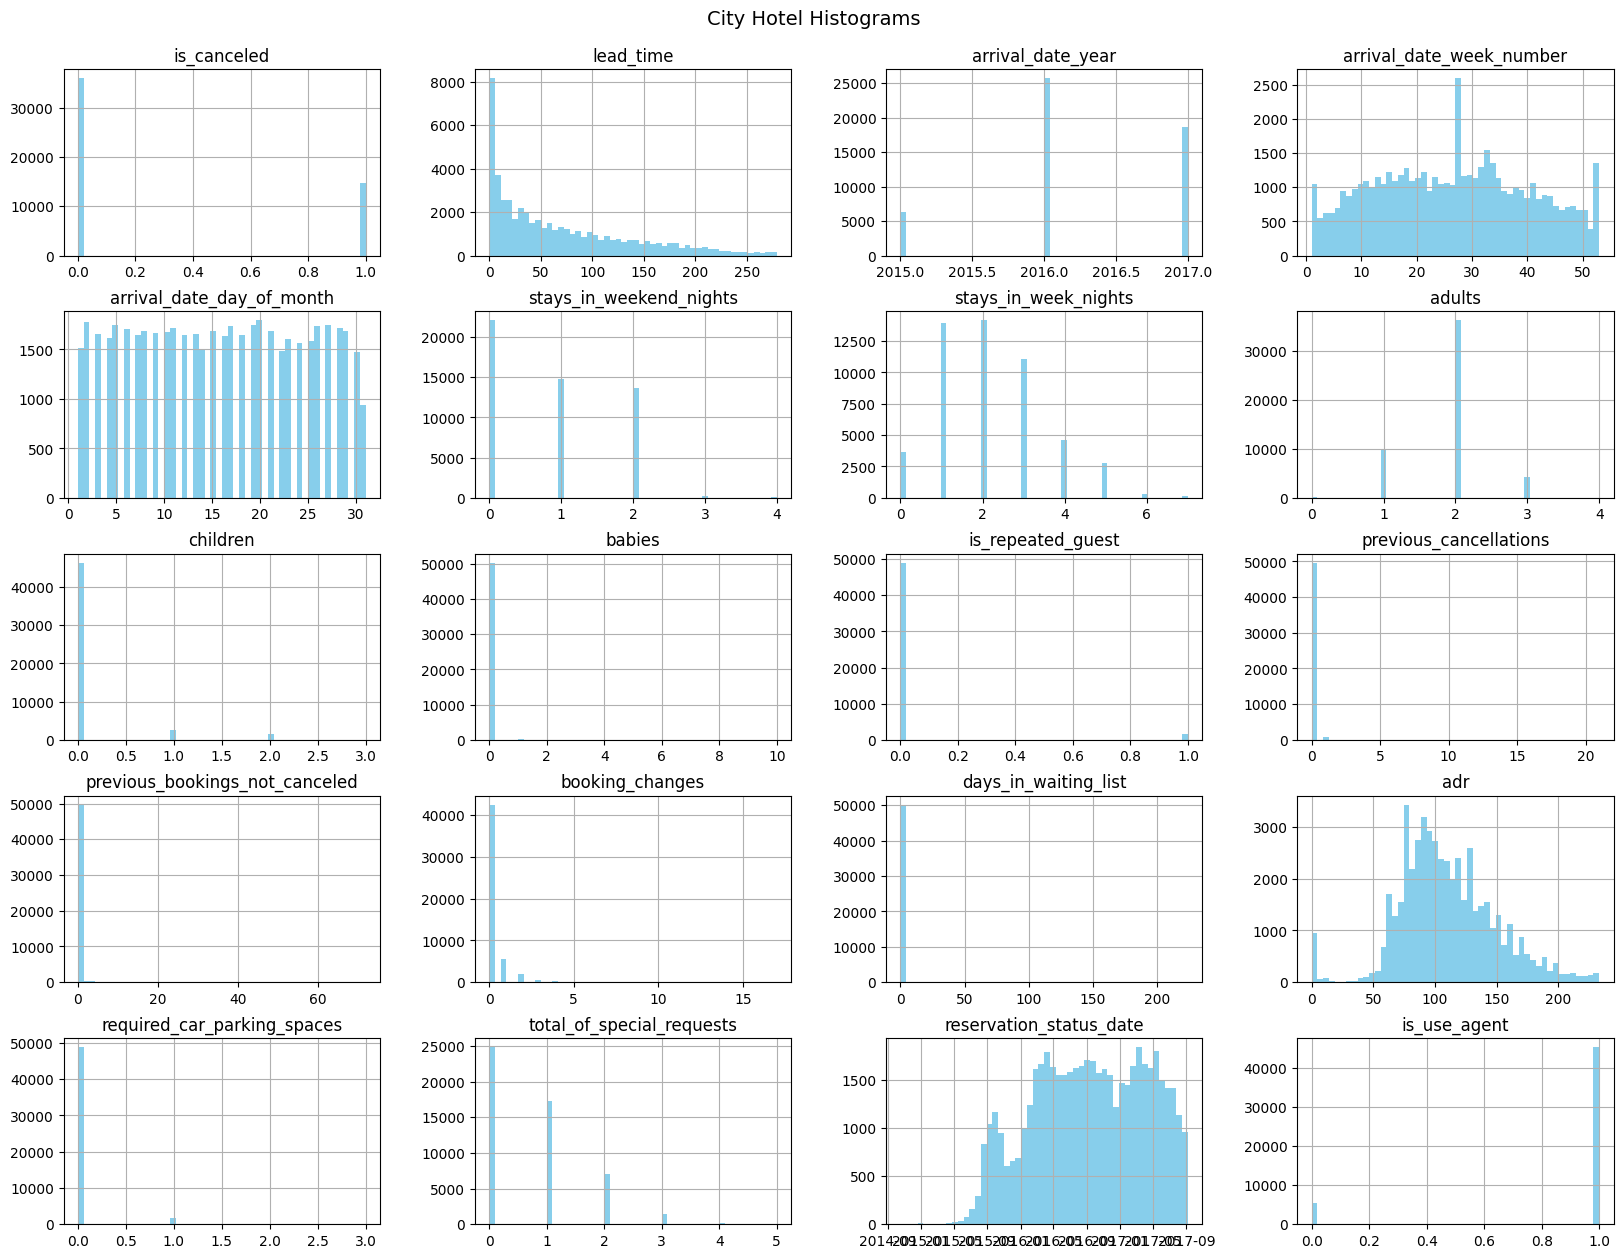

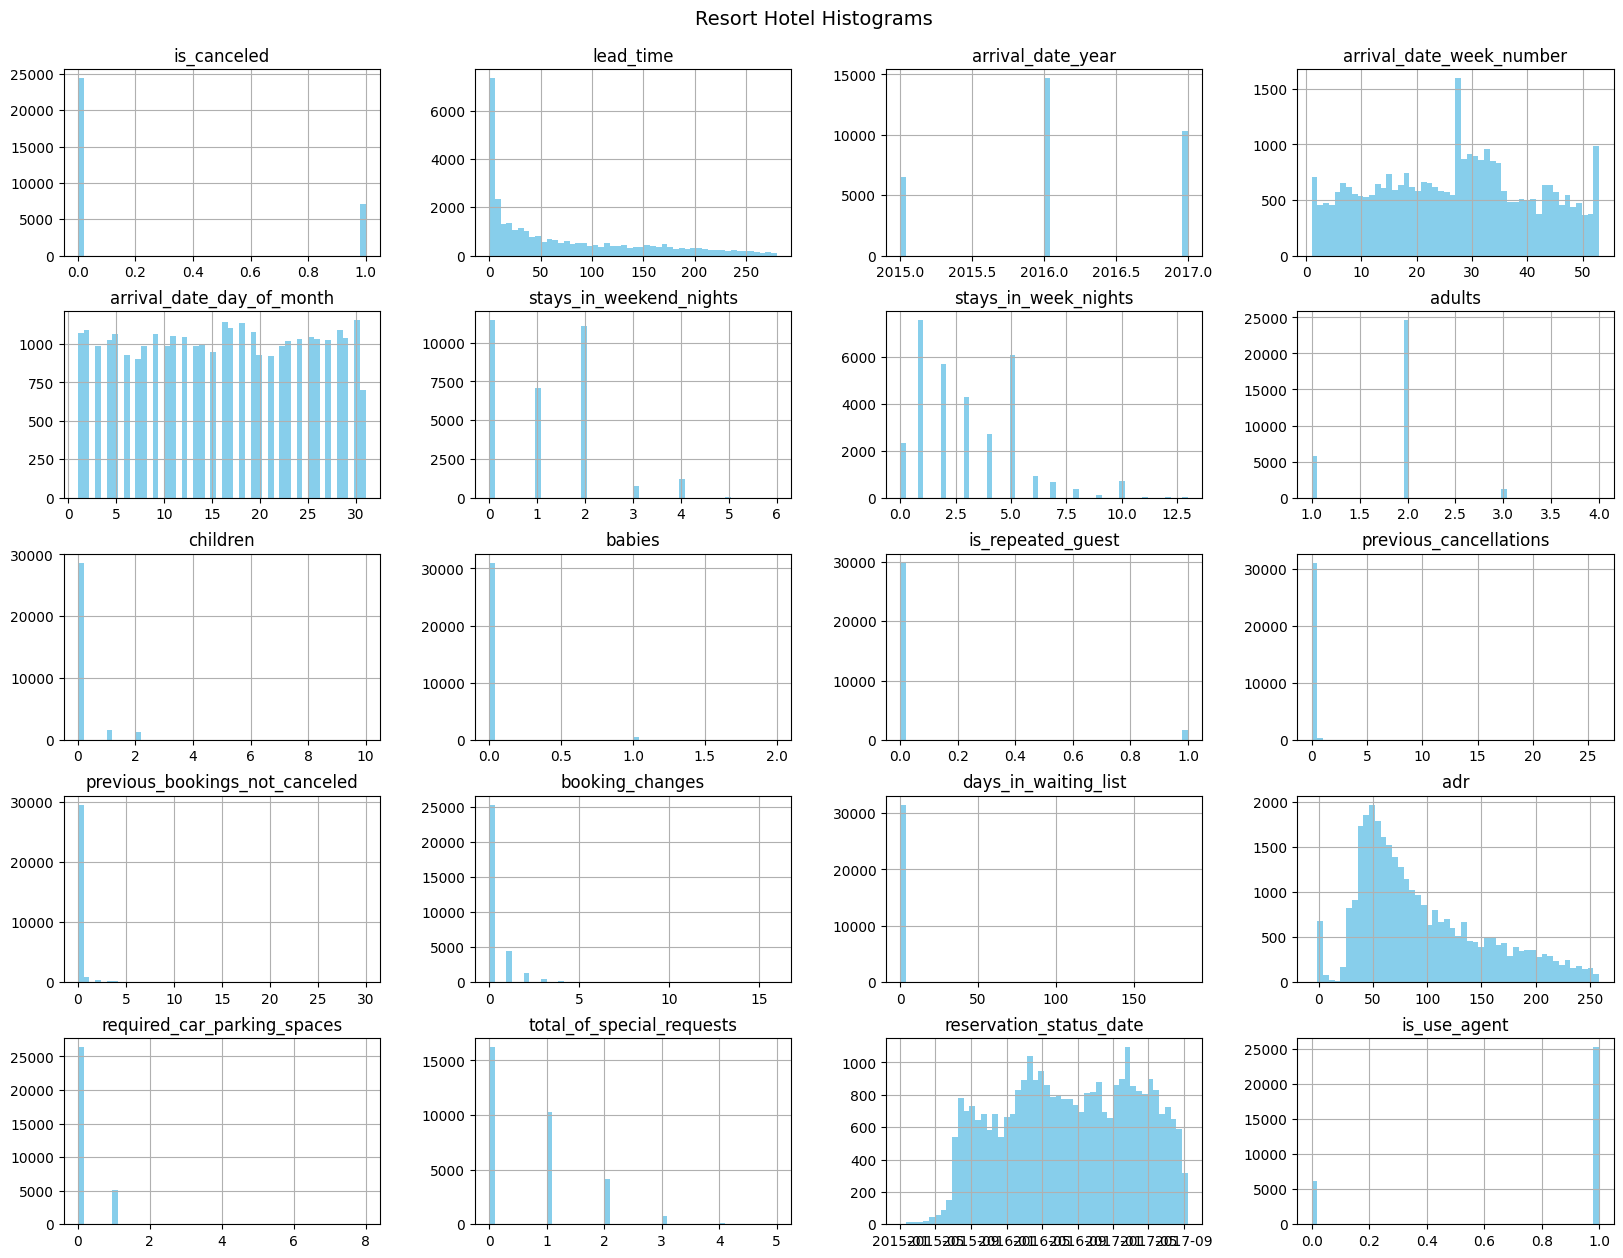

None

None

In [57]:
display(plot_histograms(df_city, bins=50, figsize=(20,15), title='City Hotel Histograms'),
        plot_histograms(df_resort, bins=50, figsize=(20,15), title='Resort Hotel Histograms'))

**Wawasan / Insights :**  
- Distribusi data adalah suatu fungsi yang menunjukkan semua nilai dari suatu dataset yang divisualisasikan dalam bentuk kurva. Data yang berdistribusi normal akan menghasilkan kurva dengan visualisasi bentuk bell atau lonceng. Sedangkan, data yang tidak berdistribusi normal akan menunjukkan kurva dengan tampilan bentuk pola tertentu. [Sumber 10](https://www.studocu.com/id/document/universitas-muhammadiyah-malang/statistik-dan-probabilitas/resume-distribusi-data/43441700)
- Plot histogram dari kedua dataset menunjukkan banyak kolom yang memiliki persebaran data tidak normal dan cenderung miring ke kanan (*right-skewed*).

### 4.1.3. Lead Time to Cancellations

In [58]:
# Create dataframes only with cancelled bookings for each hotel type
cancelled_bookings_city = df_city[df_city['is_canceled'] == 1]
cancelled_bookings_resort = df_resort[df_resort['is_canceled'] == 1]

In [59]:
# Create overlapping histogram plot function
def plot_overlap_histograms(column='lead_time', title=None, xlabel='Lead Time', figsize=(8,5), scale='linear'):
  plt.figure(figsize=figsize)

  plt.hist(cancelled_bookings_city[column], bins=50, alpha=0.7, label='City Hotel', color='skyblue')
  plt.hist(cancelled_bookings_resort[column], bins=50, alpha=0.5, label='Resort Hotel', color='red')

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel('Number of Cancellations')
  plt.yscale(scale)
  plt.legend(loc='upper right')

  plt.show()

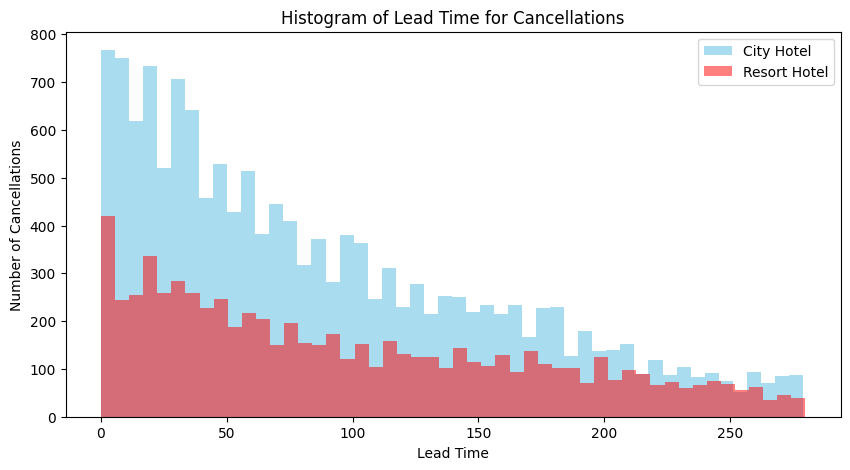

In [60]:
plot_overlap_histograms(column='lead_time',
                        title='Histogram of Lead Time for Cancellations',
                        xlabel='Lead Time', figsize=(10,5))

**Wawasan / Insights :**
- *Lead Time adalah jumlah hari sebelum kedatangan terhitung dari saat pemesanan
- Berdasarkan grafik di atas, *Lead Time* dengan nilai 0 memiliki jumlah pembatalan (is_canceled) paling tinggi pada kedua tipe hotel.
- Pola yang terbentuk antara data Resort Hotel dan City Hotel cenderung sama, yaitu semakin lama jumlah hari pada *Lead Time*, maka semakin berkurang jumlah pembatalan yang dilakukan pelanggan.

### 4.1.4. ADR to Cancellations

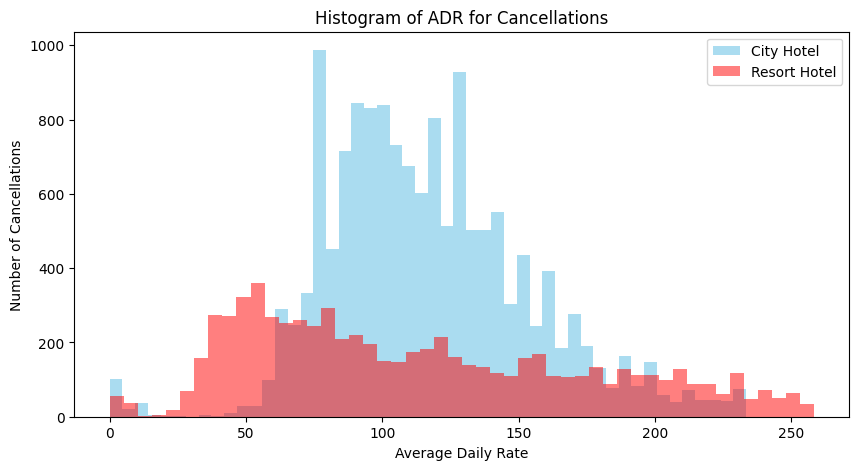

In [61]:
plot_overlap_histograms(column='adr',
                        title='Histogram of ADR for Cancellations',
                        xlabel='Average Daily Rate', figsize=(10,5))

**Wawasan / Insights :**  
- Grafik di atas menggambarkan bahwa jumlah pembatalan yang paling tinggi untuk tipe City Hotel berdasarkan tarif harian rata - ratanya (ADR) berada pada nilai 75 - 125.
- Sedangkan, jumlah pembatalan tertinggi pada Resort Hotel berada pada rentang nilai ADR 35 - 80.

### 4.1.5. Ratio Cancellations per Year

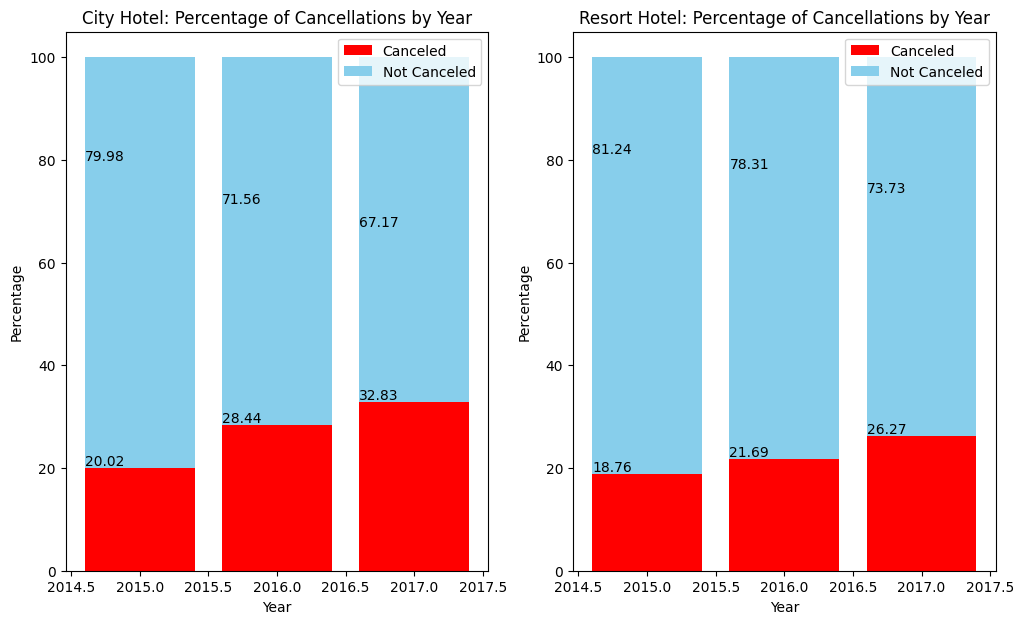

In [62]:
# Calculate the percentage of cancellations per year
df_grouped_city = df_city.groupby('arrival_date_year')['is_canceled'].value_counts(normalize=True).unstack().mul(100).reset_index()
df_grouped_resort = df_resort.groupby('arrival_date_year')['is_canceled'].value_counts(normalize=True).unstack().mul(100).reset_index()

# Reorder the columns to ensure that 0 (not canceled) is first
df_grouped_city = df_grouped_city[[0, 1, 'arrival_date_year']]
df_grouped_resort = df_grouped_resort[[0, 1, 'arrival_date_year']]
fig, axs = plt.subplots(1, 2, figsize=(12,7))

# Draw the bars for city hotels
bars1_city = axs[0].bar(df_grouped_city['arrival_date_year'], df_grouped_city[1], label='Canceled', color='r')
bars2_city = axs[0].bar(df_grouped_city['arrival_date_year'], df_grouped_city[0], label='Not Canceled', color='skyblue', bottom=df_grouped_city[1])

# Draw the bars for resort hotels
bars1_resort = axs[1].bar(df_grouped_resort['arrival_date_year'], df_grouped_resort[1], label='Canceled', color='r')
bars2_resort = axs[1].bar(df_grouped_resort['arrival_date_year'], df_grouped_resort[0], label='Not Canceled', color='skyblue', bottom=df_grouped_resort[1])

# Add annotations
for ax, bars in zip(axs, [[bars1_city, bars2_city], [bars1_resort, bars2_resort]]):
    for bar in bars[0]:
        yval = bar.get_height()
        ax.text(bar.get_x(), yval + 0.5, round(yval, 2))
    for bar in bars[1]:
        yval = bar.get_height()
        ax.text(bar.get_x(), yval, round(yval, 2))

axs[0].set_ylabel('Percentage')
axs[0].set_xlabel('Year')
axs[0].set_title('City Hotel: Percentage of Cancellations by Year')
axs[0].legend(loc='upper right')

axs[1].set_ylabel('Percentage')
axs[1].set_xlabel('Year')
axs[1].set_title('Resort Hotel: Percentage of Cancellations by Year')
axs[1].legend(loc='upper right')

plt.show()

**Wawasan / Insights :**  
- Grafik di atas memperlihatkan persentase jumlah pembatalan yang terus meningkatkan pada kedua tipe hotel tahun 2015 - 2017.
- Pada City Hotel, peningkatan persentase rasio pembatalan tahun 2015 ke 2016 (yaitu 8.42%) lebih tinggi dibandingkan tahun 2016 ke 2017 (yaitu 4.39%).
- Pada Resort Hotel, peningkatan persentase rasio pembatalan tahun 2015 ke 2016 (yaitu 2.93%) lebih rendah dibandingkan tahun 2016 ke 2017 (yaitu 4.58%).  
- Persentase rasio pembatalan untuk tipe Resort Hotel lebih rendah setiap tahunnya dibandingkan dengan tipe City Hotel. Salah satu kemungkinan penyebabnya adalah Resort Hotel yang umumnya digunakan untuk liburan/wisata memiliki tingkat pembatalan yang lebih rendah terutama di musim liburan.
- Memprediksi jumlah pemesanan yang berpotensial untuk dibatalkan akan menjadi fokus utama dalam pembuatan model prediksi machine learning.

### 4.1.6. Number of Stays to Cancellations

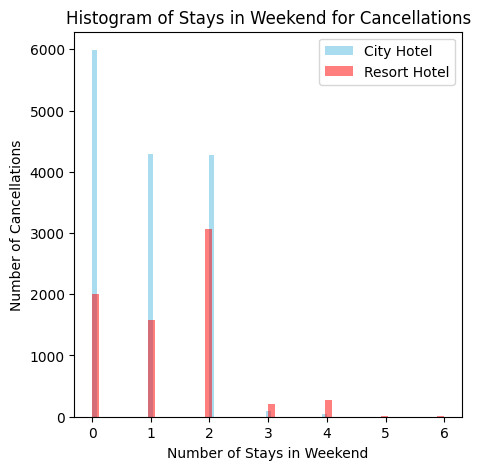

In [63]:
plot_overlap_histograms(column='stays_in_weekend_nights',
                        title='Histogram of Stays in Weekend for Cancellations',
                        xlabel='Number of Stays in Weekend',
                        figsize=(5,5))

**Wawasan / Insights :**  
- Dari total lama menginap yang dihabiskan di akhir pekan
(Sabtu dan Minggu), pelanggan yang tidak bermalam pada akhir pekan di City Hotel lebih banyak melakukan pembatalan pemesanan daripada pelanggan di Resort Hotel.
- Pelanggan yang sering melakukan pembatalan di Resort Hotel adalah pelanggan dengan lama menginap yang dihabiskan di akhir pekan
(stays_in_weekend_nights) selama 2 malam.
- Pelanggan pada tipe Resort Hotel lebih banyak melakukan pembatalan pada jumlah waktu menginap di akhir pekan lebih lama dibandingkan dengan pelanggan dari tipe City Hotel.
- Hal - hal di atas dapat sebabkan oleh :
  - Pada City Hotel, banyak pelanggan yang berfokus melakukan pemesanan bermalam di luar akhir pekan.
  - Adapun pertemuan penting yang sering dilakukan oleh pihak - pihak perkantoran yang berfokus pada City Hotel dan seringnya diselenggarakan pada hari kerja.
  - Pembatalan yang terjadi pada Resort Hotel dapat dikarenakan ketidaknyamanan / ketidakpuasan pelanggan terhadap fasilitas / pelayanan hotel, hotel tidak memenuhi ekspektasi pelanggan, atau adanya suatu kondisi mendesak yang membuat pelanggan harus melakukan pembatalan.  


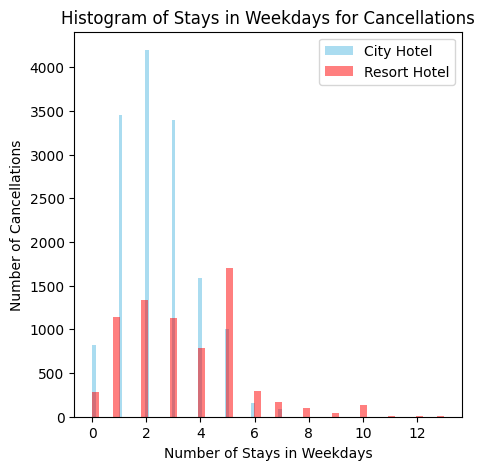

In [64]:
plot_overlap_histograms(column='stays_in_week_nights',
                        title='Histogram of Stays in Weekdays for Cancellations',
                        xlabel='Number of Stays in Weekdays',
                        figsize=(5,5))

**Wawasan / Insights :**  
- Dari total lama menginap yang dihabiskan di hari kerja (Senin sampai Jumat), tipe City Hotel memiliki tingkat pembatalan yang tinggi pada jumlah 2 malam.
- Tipe Resort Hotel memiliki tingkat pembatalan yang tinggi pada 5 malam di variabel stays_in_week_nights.
- Pada tipe Resort Hotel, data jumlah hari menginap di hari kerja (Senin - Jumat) yang dibatalkan pelanggan lebih beragam.

### 4.1.7. Number of Guests to Cancellations

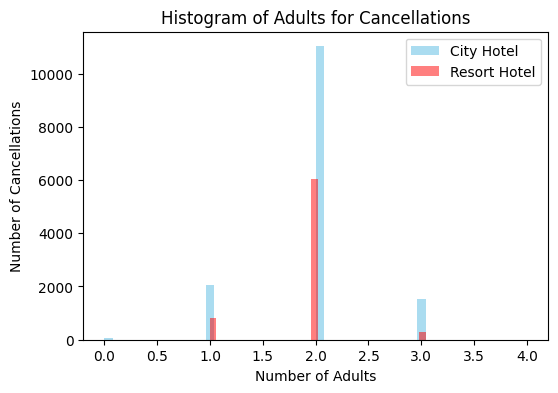

In [65]:
plot_overlap_histograms(column='adults',
                        title='Histogram of Adults for Cancellations',
                        xlabel='Number of Adults',
                        figsize=(6,4), scale='linear')

**Wawasan / Insights :**  
- Pemesanan hotel dengan jumlah pelanggan dewasa (Adults) sebanyak 2, memiliki tingkat pembatalan (is_canceled) paling tinggi pada kedua tipe hotel.
- Dapat terlihat bahwa pengaruh jumlah pelanggan dewasa (Adults) melakukan pembatalan (is_canceled) lebih banyak terjadi pada City Hotel dibandingkan Resort Hotel. Hal ini dapat disebabkan oleh banyak hal, diantaranya adalah perbedaan jumlah data kedua tipe hotel, ada kemungkinan banyak acara pertemuan orang dewasa dilakukan di City Hotel. Sehingga, apabila terjadi perubahan pada pertemuan (mungkin perubahan jadwal, cancel, dsb) akan mempengaruhi tingkat pembatalan pemesanan.

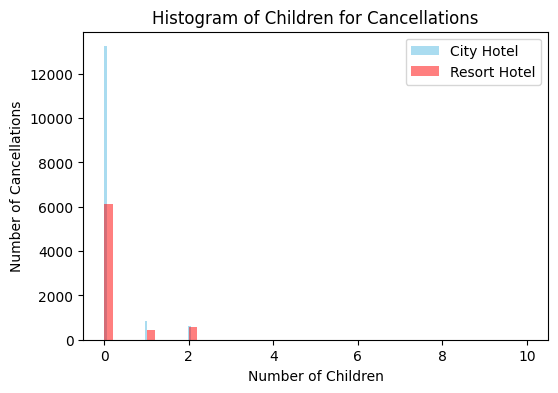

In [66]:
plot_overlap_histograms(column='children',
                        title='Histogram of Children for Cancellations',
                        xlabel='Number of Children',
                        figsize=(6,4), scale='linear')

**Wawasan / Insights :**  
- Pada kedua tipe Hotel, jumlah pelanggan anak - anak (children) yang memiliki jumlah pembatalan paling tinggi ada pada nilai 0. Artinya, lebih banyak jumlah orang dewasa yang melakukan pembatalan ketimbang pelanggan anak - anak.

### 4.1.8. Previous Bookings to Cancellations

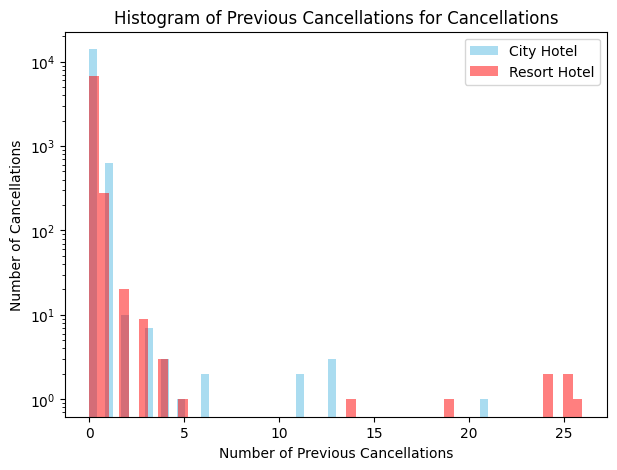

In [67]:
plot_overlap_histograms(column='previous_cancellations',
                        title='Histogram of Previous Cancellations for Cancellations',
                        xlabel='Number of Previous Cancellations',
                        figsize=(7,5), scale='log')

**Wawasan / Insights :**  
- Dapat terlihat dari grafik bahwa ketika pelanggan tidak pernah melakukan pembatalan pemesanan di waktu sebelumnya (artinya memiliki nilai 0 pada variabel 'previous_cancellations'), maka nilai pembatalan ('is_canceled') pelanggan akan lebih tinggi. Hal ini berlaku untuk kedua tipe hotel.
- Semakin banyak jumlah pembatalan yang pernah dilakukan pelanggan pada waktu sebelumnya, maka semakin sedikit jumlah pembatalan yang akan dilakukan pelanggan saat ini. kemungkinan penyebab hal ini adalah pelanggan merasa segan karena sebelumnya sudah pernah atau sering melakukan pembatalan pemesanan.

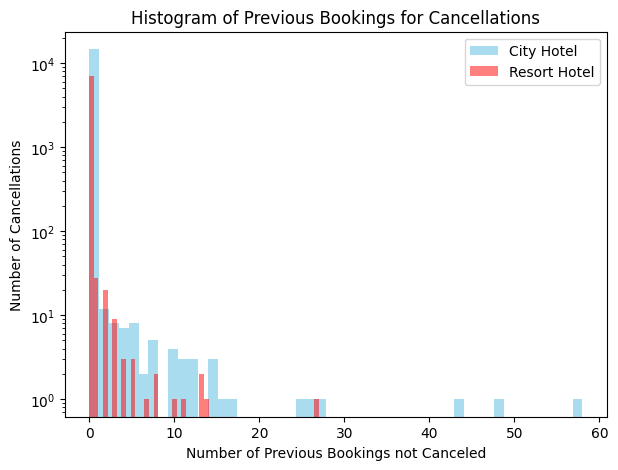

In [68]:
plot_overlap_histograms(column='previous_bookings_not_canceled',
                        title='Histogram of Previous Bookings for Cancellations',
                        xlabel='Number of Previous Bookings not Canceled',
                        figsize=(7,5), scale='log')

**Wawasan / Insights :**  
- Grafik diatas menggambarkan kedua tipe hotel ketika pelanggan tidak pernah melakukan pemesanan / booking sebelumnya dan tidak melakukan pembatalan pada pemesanan (artinya memiliki nilai 0), maka
nilai pembatalan pelanggan saat ini (is_canceled) akan cenderung lebih tinggi.
- Semakin banyak jumlah pemesanan / booking sebelumnya yang tidak dibatalkan, semakin sedikit jumlah pembatalan yang pelanggan lakukan. Hal ini mungkin dapat disebabkan pelanggan sudah merasa nyaman, memiliki pengalaman yang menyenangkan, atau tidak memiliki pilihan untuk memutuskan hotel lain.

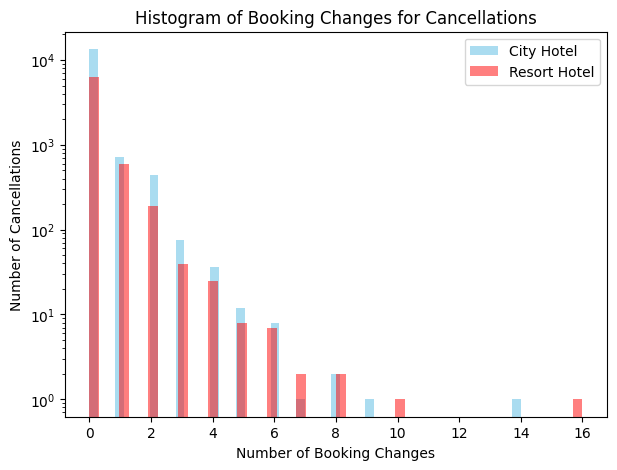

In [69]:
plot_overlap_histograms(column='booking_changes',
                        title='Histogram of Booking Changes for Cancellations',
                        xlabel='Number of Booking Changes',
                        figsize=(7,5), scale='log')

**Wawasan / Insights :**  
- Grafik di atas memberikan Informasi bahwa pada kedua tipe Hotel, ketika pelanggan tidak pernah melakukan perubahan pemesanan / booking yang artinya memiliki nilai 0, maka nilai pembatalan pelanggan akan lebih tinggi.
- Semakin banyak jumlah perubahan pemesanan / booking yang dilakukan pelanggan, semakin sedikit jumlah pembatalan yang pelanggan lakukan. Hal ini mungkin disebabkan adanya perubahan atau keperluan mendesak yang mengharuskan pelanggan melakukan peruabahan pada pemesanan, merasa segan kepada pihak hotel, atau lainnya.

### 4.1.9. Requests to Cancellations

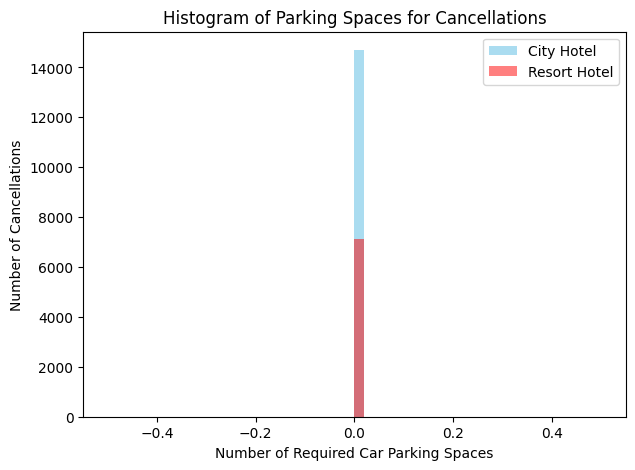

In [70]:
plot_overlap_histograms(column='required_car_parking_spaces',
                        title='Histogram of Parking Spaces for Cancellations',
                        xlabel='Number of Required Car Parking Spaces',
                        figsize=(7,5), scale='linear')

**Wawasan / Insights :**
- Berdasarkan data jumlah permintaan tempat parkir (required_car_parking_spaces), nilai 0 atau tidak ada permintaan merupakan nilai tertinggi untuk kedua tipe hotel.

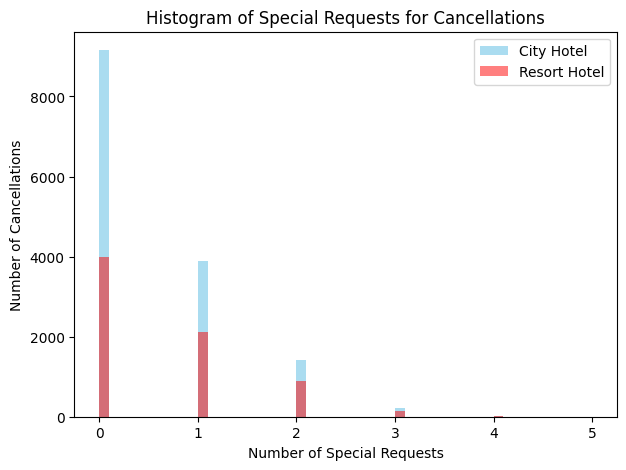

In [71]:
plot_overlap_histograms(column='total_of_special_requests',
                        title='Histogram of Special Requests for Cancellations',
                        xlabel='Number of Special Requests',
                        figsize=(7,5), scale='linear')

**Wawasan / Insights :**  
- Berdasarkan jumlah permintaan khusus yang dibuat (total_of_special_requests), contoh : pemandangan pantai / kota / kolam renang, kantong sampah, kamar pada tingkat bangunan tertentu, dan lain - lain memiliki nilai 0 sebagai nilai tertinggi untuk kedua tipe hotel.
- Maksimal jumlah terbanyak pada permintaan khusus yang dibuat (total_of_special_requests) adalah 5.  

## 4.2. Categorical Columns

### Start of function code definition  
Definisi kode fungsi pada awal digunakan untuk mendefinisikan dan mengimplementasikan fungsi - fungsi yang akan digunakan dalam proses pembelajaran dan pengujian model. Fungsi-fungsi ini mencakup operasi matematika, pemrosesan data, manipulasi fitur, evaluasi model, dan sebagainya.

In [72]:
# Percentage calculation
def calculate_percentage(df1, df2, column_name='market_segment'):
  # Calculate percentage of market segment in df_city
  column_percentage_city = round(df_city[column_name].value_counts(normalize=True) * 100,3)

  # Calculate percentage of market segment in df_resort
  column_percentage_resort = round(df_resort[column_name].value_counts(normalize=True) * 100,3)

  # Combine the two Series into one DataFrame
  df_percentage = pd.DataFrame({'City Hotel': column_percentage_city,
                                        'Resort Hotel': column_percentage_resort})

  # Fill NaN values with 0 if any
  df_percentage = df_percentage.fillna(0)
  return df_percentage

In [73]:
# Small percentage replacement
def replace_value(df, rank=5, column_name='market_segment', value_name='Others',
                  remove_value='Undefined'):
  # 1. Get the top results across both City and Resort Hotels
  top_results = df.sum(axis=1).nlargest(rank).index.tolist()

  # If 'Undefined' is in the list, remove it
  if remove_value in top_results:
      top_results.remove(remove_value)

  # 2. Replace all non-top-5 segments in 'market_segment' with 'Others' in both df_city and df_resort
  df_city[column_name] = df_city[column_name].where(df_city[column_name].isin(top_results), value_name)
  df_resort[column_name] = df_resort[column_name].where(df_resort[column_name].isin(top_results), value_name)

In [74]:
def check_percentage(df, column_name='deposit_type', col_name='City Hotel'):
  # Calculate the total number of each deposit_type
  total = df[column_name].value_counts()

  # Calculate the percentage of each deposit_type
  percentage = df[column_name].value_counts(normalize=True) * 100

  # Calculate the total cancellations for each deposit_type
  total_cancel = df[df['is_canceled'] == 1][column_name].value_counts()

  # Calculate the cancellation percentage of each deposit_type
  cancel_percentage = df.groupby(column_name)['is_canceled'].mean() * 100

  # Combine into a single DataFrame
  df_result = pd.DataFrame({
      'Total': total,
      'Percentage': percentage,
      'Total Cancel': total_cancel,
      'Cancel Percentage': cancel_percentage
  })
  df_result.sort_values('Percentage', ascending=False, inplace=True)
  df_result.columns = pd.MultiIndex.from_product([[col_name], df_result.columns])


  return df_result

In [75]:
def check_percentage1(df1=df_city,df2=df_resort, col_name='deposit_type',
                      col_1='City Hotel', col_2='Resort Hotel'):
  df_result1 = check_percentage(df1, column_name=col_name, col_name=col_1)
  df_result2 = check_percentage(df2, column_name=col_name, col_name=col_2)

  # Join the two DataFrames together
  df_result = pd.concat([df_result1, df_result2], axis=1)

  return df_result

In [76]:
def create_bar_chart_total(column, title, x_axis, figsize=(10,7), cmap='viridis'):
  # Calculate the percentages for df_city
  city_market_segment = df_city[column].value_counts(normalize=True) * 100

  # Calculate the percentages for df_resort
  resort_market_segment = df_resort[column].value_counts(normalize=True) * 100

  # Prepare a dataframe for plotting
  plot_df = pd.DataFrame({'City Hotel': city_market_segment, 'Resort Hotel': resort_market_segment})

  plot_df = plot_df.sort_index()

  # Create the overlapping bar chart
  plot_df.plot(kind='bar', stacked=False, alpha=0.7, figsize=figsize, colormap=cmap)

  plt.ylabel('Percentage')
  plt.xlabel(x_axis)
  plt.title(title)
  plt.show()

In [77]:
def create_bar_chart_cancel(column, title, x_axis, figsize=(10,7), cmap='viridis'):
  # Group by market_segment and is_canceled, then calculate the counts
  city_cancelled = df_city.groupby([column, 'is_canceled']).size().unstack(fill_value=0)
  resort_cancelled = df_resort.groupby([column, 'is_canceled']).size().unstack(fill_value=0)

  # Calculate the percentage of cancellations for each market segment
  city_cancelled_percent = (city_cancelled[1] / (city_cancelled[0] + city_cancelled[1])) * 100
  resort_cancelled_percent = (resort_cancelled[1] / (resort_cancelled[0] + resort_cancelled[1])) * 100

  # Prepare a dataframe for plotting
  plot_df = pd.DataFrame({'City Hotel': city_cancelled_percent, 'Resort Hotel': resort_cancelled_percent})

  # Sort by city_cancelled_percent in descending order
  plot_df = plot_df.sort_index()

  # Create the overlapping bar chart
  plot_df.plot(kind='bar', stacked=False, alpha=0.7, figsize=figsize, colormap=cmap)

  plt.ylabel('Cancellation Percentage')
  plt.xlabel(x_axis)
  plt.title(title)
  plt.show()

### 4.2.1. Market Segments to Cancellations

In [78]:
market_segment_percentage = calculate_percentage(df_city, df_resort, column_name='market_segment')
market_segment_percentage.sort_values('City Hotel', ascending=False)

,City Hotel,Resort Hotel
market_segment,,
Online TA,66.2250,49.1850
Offline TA/TO,13.3670,19.5020
Direct,10.3180,18.7980
Corporate,4.3500,6.2290
Groups,4.3460,5.6900
Complementary,0.9840,0.5960
Aviation,0.4040,0.0000
Undefined,0.0040,0.0000


**Wawasan / Insights :**  
- Berdasarkan perhitungan presentase setiap `market_segment`, terlihat bahwa tiga segmen terbawah (*Complementary*, *Aviation*, dan *Undefined*) memiliki presentase gabungan yang sangat kecil, yaitu kurang dari 2%. Oleh karena itu, ketiga segmen ini akan digabung dan direpresentasikan menjadi segmen baru yaitu `Others`.

In [79]:
replace_value(df=market_segment_percentage, rank=5,
              column_name='market_segment', value_name='Others')

In [80]:
market_percentage = check_percentage1(col_name='market_segment')
market_percentage

City Hotel                                            \
                    Total Percentage Total Cancel Cancel Percentage   
market_segment                                                        
Online TA           33567    66.2254        11818           35.2072   
Offline TA/TO        6775    13.3666         1100           16.2362   
Direct               5230    10.3184          816           15.6023   
Corporate            2205     4.3503          256           11.6100   
Groups               2203     4.3464          609           27.6441   
Others                706     1.3929           99           14.0227   

               Resort Hotel                                            
                      Total Percentage Total Cancel Cancel Percentage  
market_segment                                                         
Online TA             15516    49.1853         5023           32.3730  
Offline TA/TO          6152    19.5017          715           11.6222  
Direct                 5930    18.7979          743           12.5295  
Corporate              1965     6.2290          244           12.4173  
Groups                 1795     5.6901          369           20.5571  
Others                  188     0.5960           31           16.4894

**Wawasan / Insights :**  
- Tabel di atas menunjukkan data market segment dari tipe City Hotel dan Resort Hotel. Tabel ini mencakup persentase dan total dari market segment masing - masing tipe hotel serta dari keseluruhan data yang dimiliki.
- Market segment dengan ketentuan Online TA memiliki hasil total dan persentasi tertinggi untuk kedua tipe Hotel, baik melalui data masing - masing tipe hotel maupun melalui keseluruhan data.

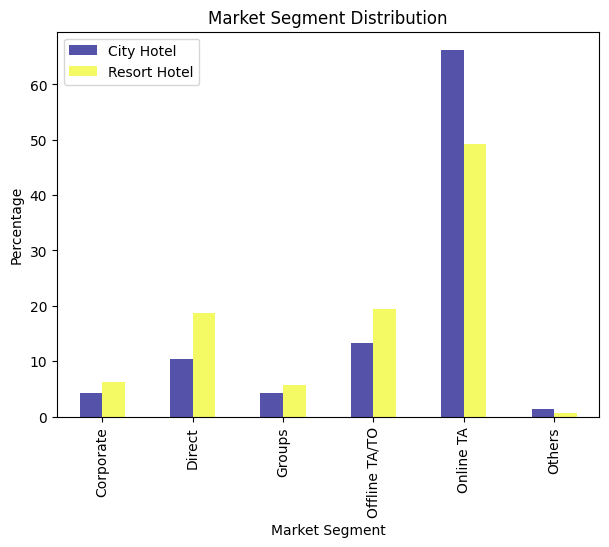

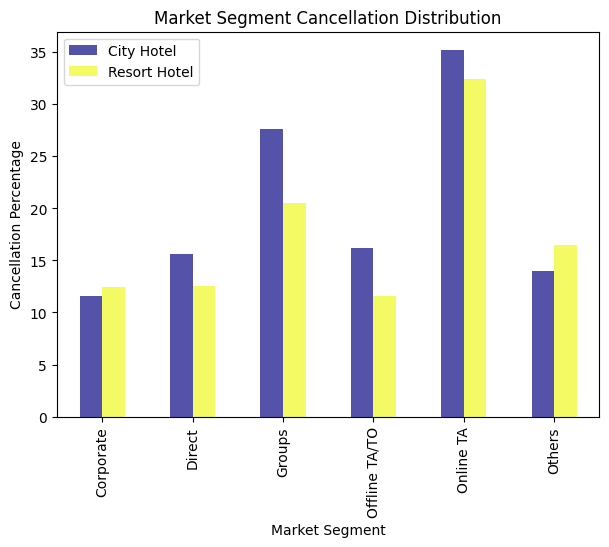

None

None

In [81]:
display(
    create_bar_chart_total('market_segment',
                           'Market Segment Distribution',
                           'Market Segment', figsize=(7,5), cmap='plasma'),
    create_bar_chart_cancel('market_segment',
                            'Market Segment Cancellation Distribution',
                            'Market Segment', figsize=(7,5), cmap='plasma')
)

**Wawasan / Insights :**  
- Dari grafik batang pertama menunjukkan persentase total sebaran data untuk market segment kedua tipe hotel. Market segmen dengan tipe Online TA memiliki persentasi tertinggi untuk kedua tipe hotel.
- Berdasarkan grafik batang kedua, persentasi pembatalan kedua tipe hotel juga banyak terjadi pada data market segment dengan ketentuan Online TA.

### 4.2.2. Country to Cancellations

In [82]:
# Calculate each country bookings percentage
country_percentage = calculate_percentage(df_city, df_resort,
                                          column_name='country')
country_percentage.sort_values('City Hotel', ascending=False, inplace=True)
country_percentage

,City Hotel,Resort Hotel
country,,
PRT,24.3660,42.7660
FRA,14.1580,4.2700
GBR,8.5090,16.2620
DEU,8.2860,2.7610
ESP,7.2940,10.2450
...,...,...
BDI,0.0000,0.0030
MWI,0.0000,0.0060
PLW,0.0000,0.0030


In [83]:
# Calculate total percentage for the top 19 country with the highest booking percentages
display(country_percentage[['City Hotel']].head(19).sum(),
country_percentage[['Resort Hotel']].head(19).sum())

City Hotel   90.6130
dtype: float64

Resort Hotel   94.4200
dtype: float64

**Wawasan / Insights :**  
- Berdasarkan perhitungan presentase setiap `country`, terlihat bahwa 19 negara teratas memiliki total presentase > 90%. Oleh karena itu, 156 negara lainnya atau yang dibawah urutan 19 akan digabung dan direpresentasikan dengan sebagai nilai `Others`.

In [84]:
replace_value(df=country_percentage, rank=20,
              column_name='country', value_name='Others')

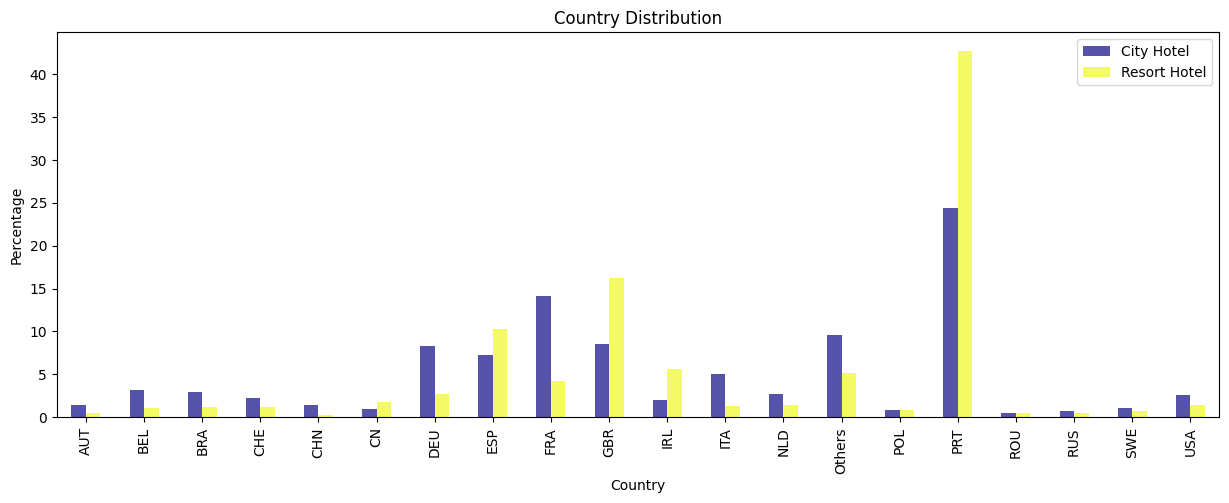

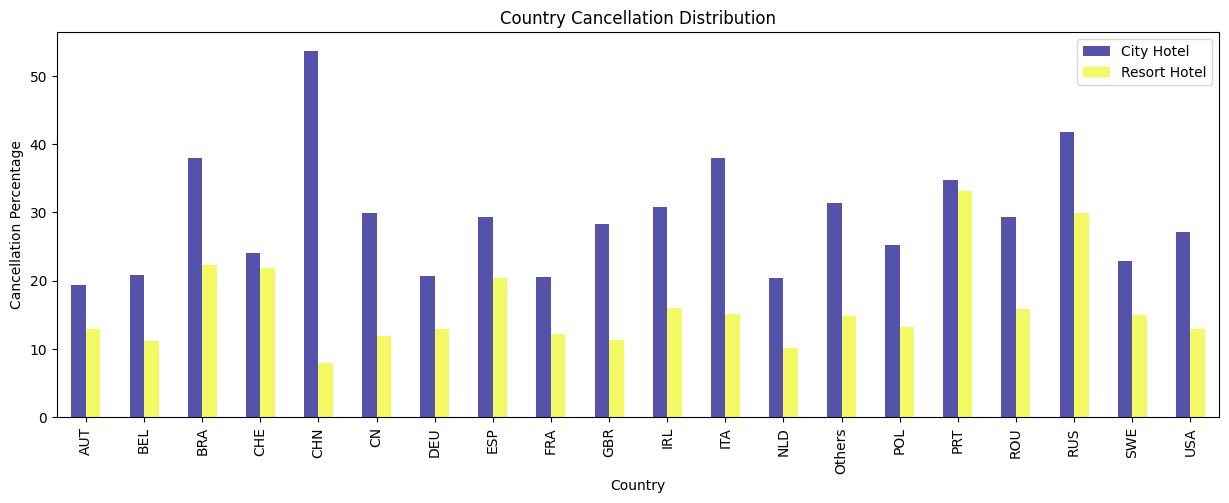

None

None

In [85]:
display(
    create_bar_chart_total('country',
                           'Country Distribution',
                           'Country', figsize=(15,5), cmap='plasma'),
    create_bar_chart_cancel('country',
                            'Country Cancellation Distribution',
                            'Country', figsize=(15,5), cmap='plasma')
)

**Wawasan / Insights :**  
- Grafik pertama menggambarkan sebaran data kedua tipe hotel terhadap negara dan terlihat bahwa pelanggan asal negara Portugal memiliki jumlah persentase tertinggi. Artinya, banyak pelanggan asal negara Portugal melakukan pemesanan pada hotel.
- Grafik kedua menunjukkan persentasi sebaran data 'country' terhadap variabel 'is_canceled'. Data People's Republic of China memiliki persentase pembatalan tertinggi untuk tipe City Hotel. Sedangkan, pelanggan asal negara Portugal paling banyak melakukan pembatalan pada tipe Resort Hotel.

### 4.2.3. Deposit Type to Cancellations

In [86]:
deposit_percentage = check_percentage1()
deposit_percentage

City Hotel                                            \
                  Total Percentage Total Cancel Cancel Percentage   
deposit_type                                                        
No Deposit        50119    98.8813        14160           28.2528   
Non Refund          553     1.0910          529           95.6600   
Refundable           14     0.0276            9           64.2857   

             Resort Hotel                                            
                    Total Percentage Total Cancel Cancel Percentage  
deposit_type                                                         
No Deposit          31297    99.2107         6974           22.2833  
Non Refund            168     0.5326          137           81.5476  
Refundable             81     0.2568           14           17.2840

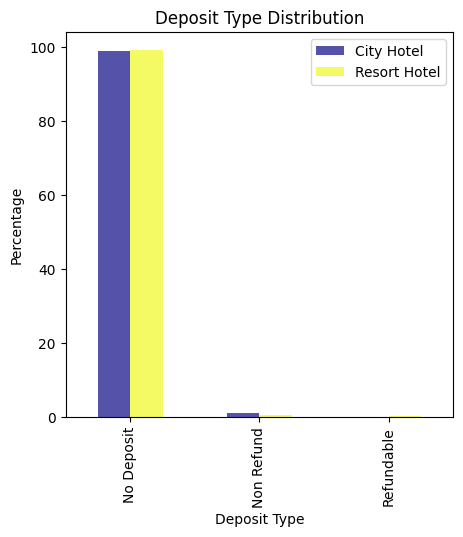

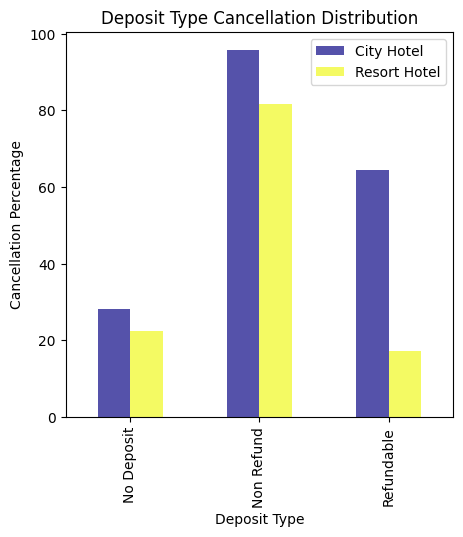

None

None

In [87]:
display(
    create_bar_chart_total('deposit_type',
                           'Deposit Type Distribution',
                           'Deposit Type', figsize=(5,5), cmap='plasma'),
    create_bar_chart_cancel('deposit_type',
                            'Deposit Type Cancellation Distribution',
                            'Deposit Type', figsize=(5,5), cmap='plasma')
)

**Wawasan / Insights :**  
- Berdasarkan tipe deposit yang pelanggan pilih, data No Deposit memiliki nilai tertinggi pada kedua tipe hotel dengan perbandingan nilai yang signifikan terhadap data tipe deposit lainnya.
- Adapun persentase pembatalan (is_canceled) terhadap data Non Refund yang memiliki persentase tertinggi di kedua tipe hotel.
- Grafik di atas menunjukkan persebaran data tipe deposit yang sangat tidak merata. Hal ini dikarenakan data No Deposit mewakili lebih dari 98% keseluruhan jumlah data pada kedua tipe hotel.

### 4.2.4. Distribution Channel to Cancellations

In [88]:
distribution_percentage = check_percentage1(col_name='distribution_channel')
distribution_percentage

City Hotel                                            \
                          Total Percentage Total Cancel Cancel Percentage   
distribution_channel                                                        
TA/TO                     42200    83.2577        13464           31.9052   
Direct                     5746    11.3365          875           15.2280   
Corporate                  2557     5.0448          321           12.5538   
GDS                         179     0.3532           34           18.9944   
Undefined                     4     0.0079            4          100.0000   

                     Resort Hotel                                            
                            Total Percentage Total Cancel Cancel Percentage  
distribution_channel                                                         
TA/TO                  22798.0000    72.2691    5956.0000           26.1251  
Direct                  6470.0000    20.5097     862.0000           13.3230  
Corporate               2277.0000     7.2180     307.0000           13.4827  
GDS                           NaN        NaN          NaN               NaN  
Undefined                  1.0000     0.0032          NaN            0.0000

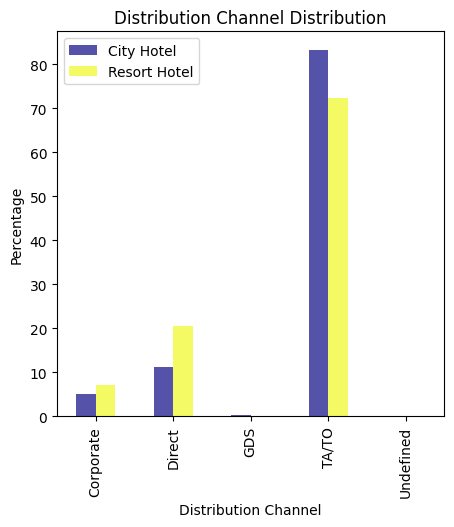

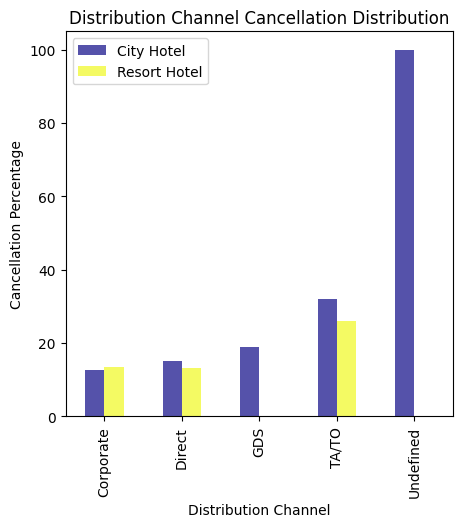

None

None

In [89]:
display(
    create_bar_chart_total('distribution_channel',
                           'Distribution Channel Distribution',
                           'Distribution Channel', figsize=(5,5), cmap='plasma'),
    create_bar_chart_cancel('distribution_channel',
                            'Distribution Channel Cancellation Distribution',
                            'Distribution Channel', figsize=(5,5), cmap='plasma')
)

**Wawasan / Insights :**  
- Berdasarkan nama saluran distribusinya ('distribution_channel'), TA/TO menjadi nilai paling tinggi dengan perbedaan data yang signifikan untuk kedua tipe hotel jika dibandingkan data lainnya.
- Persentase pembatalan (is_canceled) pada tipe City Hotel memiliki nilai paling tinggi pada Undefined dengan nilai persentase yang mencapai 100%. Namun, pada tipe Resort Hotel,  data Undefined memiliki jumlah paling sedikit.
- Adapun pada tipe Resort Hotel, data TA/TO menjadi yang tertinggi dengan persentase 26% dari jumlah data yang cukup banyak.
- Persebaran data pada nama saluran distribusi ini juga terlalu terpusat pada TA/TO dari keseluruhan jumlah data kedua tipe hotel.

### 4.2.5. Customer Type to Cancellations

In [90]:
customer_percentage = check_percentage1(col_name='customer_type')
customer_percentage

City Hotel                                            \
                     Total Percentage Total Cancel Cancel Percentage   
customer_type                                                          
Transient            42675    84.1948        13367           31.3228   
Transient-Party       6348    12.5242          985           15.5167   
Contract              1407     2.7759          327           23.2409   
Group                  256     0.5051           19            7.4219   

                Resort Hotel                                            
                       Total Percentage Total Cancel Cancel Percentage  
customer_type                                                           
Transient              25776    81.7092         6472           25.1086  
Transient-Party         4087    12.9557          531           12.9924  
Contract                1434     4.5457          109            7.6011  
Group                    249     0.7893           13            5.2209

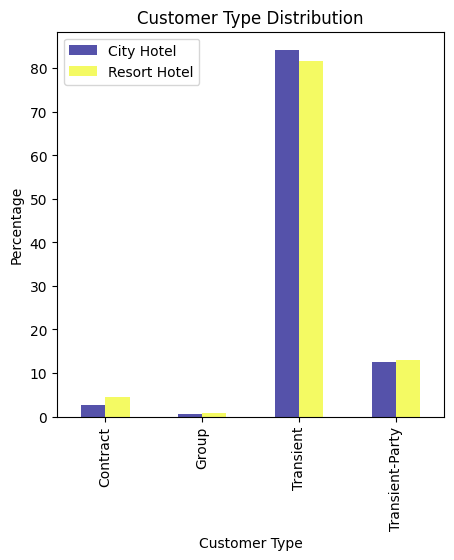

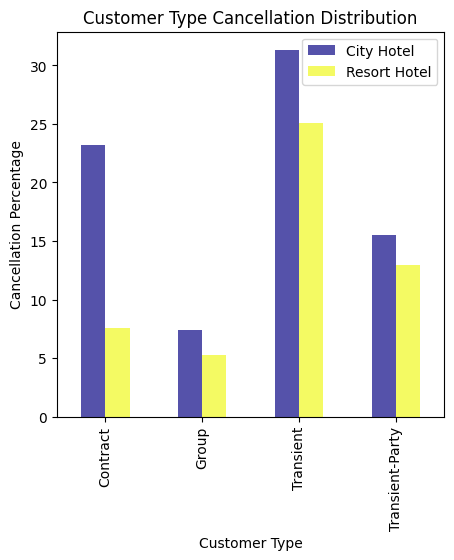

None

None

In [91]:
display(
    create_bar_chart_total('customer_type',
                           'Customer Type Distribution',
                           'Customer Type', figsize=(5,5), cmap='plasma'),
    create_bar_chart_cancel('customer_type',
                            'Customer Type Cancellation Distribution',
                            'Customer Type', figsize=(5,5), cmap='plasma')
)

**Wawasan / Insights :**  
- Dapat dilihat dari grafik di atas, variabel jenis pelanggan dengan ketentuan data Transient memiliki jumlah data tertinggi pada kedua tipe hotel, dibandingkan dengan jumlah data lainnya.
- Begitu juga untuk persentase pembatalan pada kedua tipe hotel, Transient menjadi yang paling tinggi.
- Persebaran data pada jenis pelanggan juga terpusat pada Transient untuk kedua tipe hotel.

### 4.2.6. Room Type to Cancellations

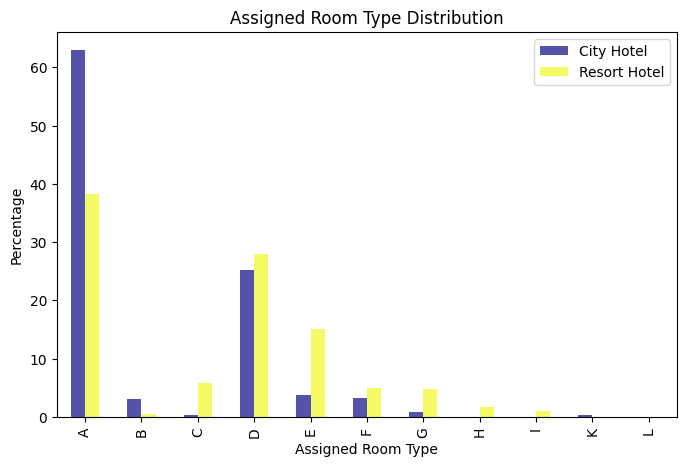

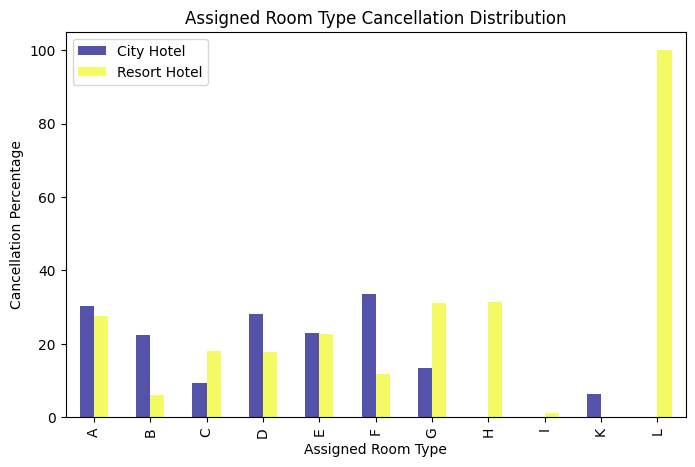

None

None

In [92]:
display(
    create_bar_chart_total('assigned_room_type',
                           'Assigned Room Type Distribution',
                           'Assigned Room Type', figsize=(8,5), cmap='plasma'),
    create_bar_chart_cancel('assigned_room_type',
                            'Assigned Room Type Cancellation Distribution',
                            'Assigned Room Type', figsize=(8,5), cmap='plasma')
)

**Wawasan / Insights :**
- Tipe kamar A mejadi tipe kamar yang paling banyak ditetapkan pelanggan dalam pemesanan hotel untuk kedua tipe hotel.
- Adapun persentase pembatalan (is_canceled) berdasarkan tipe kamar yang ditetapkan, kamar dengan tipe L memiliki persentase pembatalan 100% untuk tipe Resort Hotel.
- Selain tipe kamar L, masing - masing tipe kamar hotel memiliki jumlah persentase pembatalan yang tidak terlalu berbeda pada kedua tipe hotel.

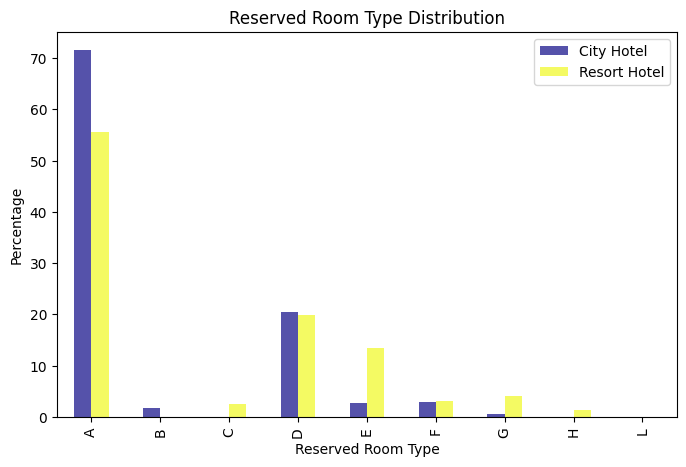

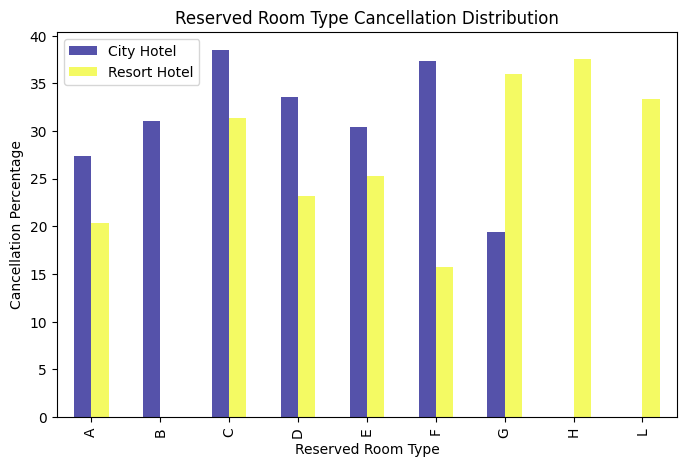

None

None

In [93]:
display(
    create_bar_chart_total('reserved_room_type',
                           'Reserved Room Type Distribution',
                           'Reserved Room Type', figsize=(8,5), cmap='plasma'),
    create_bar_chart_cancel('reserved_room_type',
                            'Reserved Room Type Cancellation Distribution',
                            'Reserved Room Type', figsize=(8,5), cmap='plasma')
)

**Wawasan / Insights :**
- Berdasarkan tipe kamar yang paling banyak diminta pelanggan, kamar tipe A masih mejadi tipe kamar dengan peminatan tertinggi.
- Adapun persentase pembatalan (is_canceled) berdasarkan tipe kamar yang diminta pelanggan, yang mana masing - masing tipe hotel memiliki jumlah persentase pembatalan yang tidak terlalu berbeda.


### 4.2.7. Meal Type to Cancellations

In [94]:
meal_percentage = check_percentage1(col_name='meal')
meal_percentage

City Hotel                                           Resort Hotel  \
          Total Percentage Total Cancel Cancel Percentage        Total   
meal                                                                     
BB        39132    77.2048        10790           27.5733        25225   
SC         9100    17.9537         3178           34.9231          519   
HB         2443     4.8199          728           29.7994         5497   
FB           11     0.0217            2           18.1818          305   

                                                
     Percentage Total Cancel Cancel Percentage  
meal                                            
BB      79.9626         5636           22.3429  
SC       1.6452           73           14.0655  
HB      17.4253         1335           24.2860  
FB       0.9668           81           26.5574

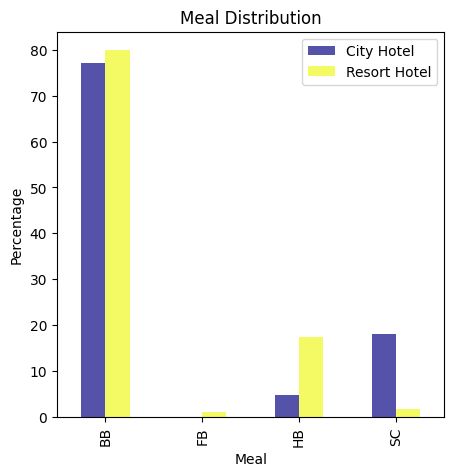

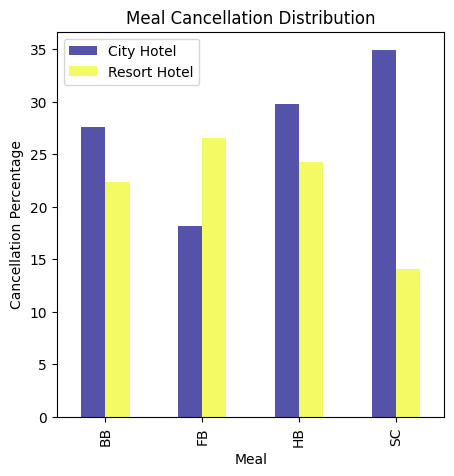

None

None

In [95]:
display(
    create_bar_chart_total('meal',
                           'Meal Distribution',
                           'Meal', figsize=(5,5), cmap='plasma'),
    create_bar_chart_cancel('meal',
                            'Meal Cancellation Distribution',
                            'Meal', figsize=(5,5), cmap='plasma')
)

**Wawasan / Insights :**  
- Berdasarkan jenis makanan yang diminta pelanggan (meal), ID makanan dengan kode BB memiliki jumlah data paling tinggi untuk kedua tipe hotel dengan perbedaan data yang cukup signifikan.
- Adapun persentase pembatalan berdasarkan jenis makanan yang diminta pelanggan (meal) dengan tipe SC menjadi data yang paling tinggi untuk tipe City Hotel dan tipe FB menjadi yang paling tinggi untuk tipe Resort Hotel.

# **5. Feature Representation**  
Feature engineering adalah mengubah data mentah menjadi representasi baru yang dapat membantu dalam proses pemodelan prediktif menggunakan Machine Learning atau Statistical Modelling. Feature representation dalam Machine Learning bertujuan untuk meningkatkan performa model.

##5.1 Encoding
Encoding adalah mengubah data kategorikal menjadi format numerik agar dapat dengan mudah diproses oleh model.

In [96]:
from sklearn.preprocessing import LabelEncoder

# Fungsi untuk mengonversi kolom non-numerik menjadi numerik
def convert_to_numeric(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
    return df

# Mengonversi kolom non-numerik menjadi numerik untuk dataset City Hotel
df_city = convert_to_numeric(df_city)

# Mengonversi kolom non-numerik menjadi numerik untuk dataset Resort Hotel
df_resort = convert_to_numeric(df_resort)


## 5.2. Features Selection  
Feature selection adalah suatu metode analisa data yang bertujuan untuk memilih fitur yang berpengaruh (fitur optimal) dan mengesampingkan fitur yang tidak berpengaruh. `Metode Anova` yang populer digunakan untuk melakukan seleksi terhadap fitur yang paling relevan dalam data set. Teknik ini bertujuan untuk mengidentifikasi fitur fitur yang memiliki pengaruh signifikan terhadap varibel target. fitur dengan nilai F-Statistik yang tingi dianggap penting karena menunjukan adanya variasi yang signifikan dalam data berdasarkan fitur tersebut. sedangkan `Metode Mutual Information` mengidentifikasi fitur fitur yang memiliki hubungan informatif dengna vaiabel target, fitur dengna nilai mutual information yang tinggi dianggap penting karena mereka membreikan informasi signifkan tentang variabel target

### 5.2.1 ANOVA

In [97]:
from sklearn.feature_selection import f_classif

# Fungsi untuk melakukan seleksi fitur menggunakan ANOVA
def anova_feature_selection(df, target='is_canceled', exclude_features=None):
    if exclude_features is None:
        exclude_features = []

    # Memisahkan fitur numerik dan target
    X = df.select_dtypes(include=[np.number]).drop(columns=[target] + exclude_features)
    y = df[target]

    # Melakukan ANOVA
    anova_results = f_classif(X, y)

    # Membuat dataframe dengan hasil ANOVA
    anova_df = pd.DataFrame({
        'Feature': X.columns,
        'F-Score': anova_results[0],
        'p-Value': anova_results[1]
    }).sort_values(by='F-Score', ascending=False)

    return anova_df

# Melakukan seleksi fitur menggunakan ANOVA untuk City Hotel
anova_city = anova_feature_selection(df_city, exclude_features=['reservation_status', 'hotel'])

# Melakukan seleksi fitur menggunakan ANOVA untuk Resort Hotel
anova_resort = anova_feature_selection(df_resort, exclude_features=['reservation_status', 'hotel'])

print("ANOVA Feature Selection - City Hotel")
print(anova_city)
print("\nANOVA Feature Selection - Resort Hotel")
print(anova_resort)


ANOVA Feature Selection - City Hotel
                           Feature   F-Score  p-Value
0                        lead_time 1622.6254   0.0000
12                  market_segment 1327.2136   0.0000
25       total_of_special_requests 1306.3278   0.0000
20                    deposit_type 1182.2088   0.0000
13            distribution_channel 1048.3987   0.0000
24     required_car_parking_spaces  782.0179   0.0000
26                    is_use_agent  636.0139   0.0000
23                             adr  602.2336   0.0000
6             stays_in_week_nights  406.4133   0.0000
7                           adults  405.4614   0.0000
19                 booking_changes  391.0096   0.0000
1                arrival_date_year  365.8287   0.0000
14               is_repeated_guest  276.5051   0.0000
11                         country  188.4299   0.0000
10                            meal  187.5518   0.0000
22                   customer_type  165.2931   0.0000
17              reserved_room_type  154.8214 

**Wawasan / Insights :**  
**1. reservation_status**
* kolinearitas tinggi dengan target (**is_canceled**): fitur **reservation_status** secara langsung menunjukan status pemesanan seperti dibatalkan, dicheck-in, atau tidak muncul (no-show) sehingga nilai F-Score ANOVA menjadi  sangat tinggi.
* Oleh karena itu fitur **reservation_status** dihapuskan

**2. hotel**
* Variabilitas Rendah dalam Subset Data: Fitur **hotel** tidak memberikan variasi  dalam subset data yang dipisahkan berdasarkan jenis hotel. Dalam subset df_city, semua entri adalah "City Hotel", dan dalam subset df_resort, semua entri adalah "Resort Hotel". Ini berarti fitur hotel tidak memiliki kekuatan diskriminatif dalam setiap subset data.
Variabilitas rendah dalam fitur ini menyebabkan tidak ada kontribusi dalam analisis ANOVA, sehingga tidak memberikan informasi tambahan yang berguna dalam konteks subset data spesifik ini.
* oleh karena itu fitur **hotel** dihapuskan

### 5.2.2. Mutual Information

In [98]:
from sklearn.feature_selection import mutual_info_classif

# Fungsi untuk melakukan seleksi fitur menggunakan Mutual Information
def mutual_info_feature_selection(df, target='is_canceled', exclude_features=None):
    if exclude_features is None:
        exclude_features = []

    # Memisahkan fitur numerik dan target
    X = df.select_dtypes(include=[np.number]).drop(columns=[target] + exclude_features)
    y = df[target]

    # Melakukan Mutual Information
    mutual_info = mutual_info_classif(X, y)

    # Membuat dataframe dengan hasil Mutual Information
    mi_df = pd.DataFrame({
        'Feature': X.columns,
        'Mutual Information': mutual_info
    }).sort_values(by='Mutual Information', ascending=False)

    return mi_df

# Melakukan seleksi fitur menggunakan Mutual Information untuk City Hotel
mi_city = mutual_info_feature_selection(df_city, exclude_features=['reservation_status', 'hotel'])

# Melakukan seleksi fitur menggunakan Mutual Information untuk Resort Hotel
mi_resort = mutual_info_feature_selection(df_resort, exclude_features=['reservation_status', 'hotel'])

# Menampilkan hasil Mutual Information
print("Mutual Information Feature Selection - City Hotel")
print(mi_city)
print("\nMutual Information Feature Selection - Resort Hotel")
print(mi_resort)

Mutual Information Feature Selection - City Hotel
                           Feature  Mutual Information
23                             adr              0.0378
0                        lead_time              0.0274
12                  market_segment              0.0254
25       total_of_special_requests              0.0193
13            distribution_channel              0.0168
22                   customer_type              0.0154
24     required_car_parking_spaces              0.0147
26                    is_use_agent              0.0143
11                         country              0.0106
20                    deposit_type              0.0103
19                 booking_changes              0.0101
7                           adults              0.0083
15          previous_cancellations              0.0064
5          stays_in_weekend_nights              0.0063
3         arrival_date_week_number              0.0058
1                arrival_date_year              0.0048
6             s

## 5.3. Feature Engineering
Kita perlu menciptakan variabel independen baru untuk mendukung model machine learning yang akan dibangun. Hal ini disebabkan terdapat beberapa variabel independen yang tidak memberikan informasi cukup atau tidak cukup representatif dalam memprediksi target yang diinginkan. Contohnya, kami akan menciptakan variabel baru dengan nama 'total_stay_duration', 'is_changed_room', dan 'total_expense'.


Penciptaan variabel independen baru  dapat dilakukan dengan cara menggabungkan, mengubah, atau mengkombinasikan informasi dari variabel yang ada. Hal ini membantu menciptakan fitur - fitur baru yang lebih informatif dan dapat meningkatkan kinerja model. Contoh, kami menciptakan variabel 'total_stay_duration' dengan menjumlahkan variabel 'stays_in_weekend_nights' dan 'stays_in_week_nights'. Setelah melakukan percobaan pada perhitungan anova dan mutual information, variabel baru ini lebih dapat mewakili sebagai variabel independen karena nilai yang didapatkan lebih tinggi jika dihubungkan dengan variabel target (is_canceled).



In [99]:
# Definisi fungsi feature engineering
def feature_engineering(df):
    # Building Up
    # 1. Membuat 'total_stay_duration' dengan menjumlahkan 'stays_in_weekend_nights' dan 'stays_in_week_nights'.
    df['total_stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

    # Breakdown
    # 2. Membuat 'is_changed_room' yang bernilai 1 jika 'reserved_room_type' berbeda dengan 'assigned_room_type' dan 0 jika sama
    df['is_changed_room'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)

    # Transformasi Matematika
    #3. Membuat kolom 'total_expense'
    df['total_expense'] = df['adr'] * df['total_stay_duration']

    return df

# Menerapkan feature engineering pada dataset City Hotel
df_city = feature_engineering(df_city)

# Menerapkan feature engineering pada dataset Resort Hotel
df_resort = feature_engineering(df_resort)


### 5.3.1 ANOVA dan Mutual Inforamtion - FE

In [100]:
from sklearn.feature_selection import f_classif, mutual_info_classif
import pandas as pd

# Fungsi untuk melakukan seleksi fitur menggunakan ANOVA
def anova_feature_selection(df, target='is_canceled', exclude_features=None, p_value_threshold=0.05):
    if exclude_features is None:
        exclude_features = []

    # Memisahkan fitur numerik dan target
    X = df.select_dtypes(include=[np.number]).drop(columns=[target] + exclude_features)
    y = df[target]

    # Melakukan ANOVA
    anova_results = f_classif(X, y)

    # Membuat dataframe dengan hasil ANOVA
    anova_df = pd.DataFrame({
        'Feature': X.columns,
        'F-Score': anova_results[0],
        'p-Value': anova_results[1]
    }).sort_values(by='F-Score', ascending=False)

    # Memilih fitur berdasarkan threshold p-value
    recommended_features_anova = anova_df[anova_df['p-Value'] < p_value_threshold]['Feature'].tolist()

    return anova_df, recommended_features_anova

# Fungsi untuk melakukan seleksi fitur menggunakan Mutual Information
def mutual_info_feature_selection(df, target='is_canceled', exclude_features=None, mi_threshold=0.01):
    if exclude_features is None:
        exclude_features = []

    # Memisahkan fitur numerik dan target
    X = df.select_dtypes(include=[np.number]).drop(columns=[target] + exclude_features)
    y = df[target]

    # Melakukan Mutual Information
    mutual_info = mutual_info_classif(X, y)

    # Membuat dataframe dengan hasil Mutual Information
    mi_df = pd.DataFrame({
        'Feature': X.columns,
        'Mutual Information': mutual_info
    }).sort_values(by='Mutual Information', ascending=False)

    # Memilih fitur berdasarkan threshold Mutual Information
    recommended_features_mi = mi_df[mi_df['Mutual Information'] > mi_threshold]['Feature'].tolist()

    return mi_df, recommended_features_mi

# Melakukan seleksi fitur menggunakan ANOVA dan Mutual Information untuk City Hotel
anova_city, recommended_city_anova = anova_feature_selection(df_city, exclude_features=['reservation_status', 'hotel'])
mi_city, recommended_city_mi = mutual_info_feature_selection(df_city, exclude_features=['reservation_status', 'hotel'])

# Melakukan seleksi fitur menggunakan ANOVA dan Mutual Information untuk Resort Hotel
anova_resort, recommended_resort_anova = anova_feature_selection(df_resort, exclude_features=['reservation_status', 'hotel'])
mi_resort, recommended_resort_mi = mutual_info_feature_selection(df_resort, exclude_features=['reservation_status', 'hotel'])

# Gabungkan hasil dari kedua metode untuk rekomendasi
recommended_city = list(set(recommended_city_anova) & set(recommended_city_mi))
recommended_resort = list(set(recommended_resort_anova) & set(recommended_resort_mi))

# Menampilkan hasil
print("ANOVA Feature Selection - City Hotel")
print(anova_city)
print("\nMutual Information Feature Selection - City Hotel")
print(mi_city)
print("\nRecommended Features (Both Methods) - City Hotel")
print(recommended_city)

print("\nANOVA Feature Selection - Resort Hotel")
print(anova_resort)
print("\nMutual Information Feature Selection - Resort Hotel")
print(mi_resort)
print("\nRecommended Features (Both Methods) - Resort Hotel")
print(recommended_resort)


ANOVA Feature Selection - City Hotel
                           Feature   F-Score  p-Value
28                 is_changed_room 1880.3729   0.0000
0                        lead_time 1622.6254   0.0000
12                  market_segment 1327.2136   0.0000
25       total_of_special_requests 1306.3278   0.0000
20                    deposit_type 1182.2088   0.0000
13            distribution_channel 1048.3987   0.0000
29                   total_expense  926.9945   0.0000
24     required_car_parking_spaces  782.0179   0.0000
26                    is_use_agent  636.0139   0.0000
23                             adr  602.2336   0.0000
27             total_stay_duration  454.2581   0.0000
6             stays_in_week_nights  406.4133   0.0000
7                           adults  405.4614   0.0000
19                 booking_changes  391.0096   0.0000
1                arrival_date_year  365.8287   0.0000
14               is_repeated_guest  276.5051   0.0000
11                         country  188.4299 

# 6. Model

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# Fungsi untuk persiapan data berdasarkan fitur yang direkomendasikan
def prepare_data(df, recommended_features, target='is_canceled'):
    X = df[recommended_features]
    y = df[target]
    return X, y

# Fungsi untuk split data, scaling, dan training model
def train_and_evaluate_model(X, y, model, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Scaling data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

# Memilih fitur untuk City Hotel
recommended_features_city = ['total_of_special_requests', 'lead_time', 'adr', 'deposit_type', 'market_segment', 'distribution_channel', 'is_changed_room', 'total_expense', 'customer_type', 'required_car_parking_spaces']
X_city, y_city = prepare_data(df_city, recommended_features_city)

# Memilih fitur untuk Resort Hotel
recommended_features_resort = ['previous_bookings_not_canceled', 'stays_in_week_nights', 'required_car_parking_spaces', 'arrival_date_week_number', 'lead_time', 'assigned_room_type', 'adr', 'market_segment', 'is_repeated_guest', 'is_changed_room', 'total_expense', 'country', 'total_stay_duration', 'is_use_agent']
X_resort, y_resort = prepare_data(df_resort, recommended_features_resort)

# Definisikan model-model yang akan digunakan
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': xgb.XGBClassifier()
}

# Evaluasi model untuk City Hotel
print("City Hotel Model Evaluation:")
for model_name, model in models.items():
    accuracy, report = train_and_evaluate_model(X_city, y_city, model)
    print(f"\n{model_name} - Accuracy: {accuracy}")
    print(report)

# Evaluasi model untuk Resort Hotel
print("\nResort Hotel Model Evaluation:")
for model_name, model in models.items():
    accuracy, report = train_and_evaluate_model(X_resort, y_resort, model)
    print(f"\n{model_name} - Accuracy: {accuracy}")
    print(report)


City Hotel Model Evaluation:

Logistic Regression - Accuracy: 0.7554912534525845
              precision    recall  f1-score   support

           0       0.77      0.93      0.84     10811
           1       0.66      0.32      0.43      4395

    accuracy                           0.76     15206
   macro avg       0.72      0.63      0.64     15206
weighted avg       0.74      0.76      0.72     15206


Random Forest - Accuracy: 0.756609233197422
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     10811
           1       0.59      0.50      0.54      4395

    accuracy                           0.76     15206
   macro avg       0.70      0.68      0.69     15206
weighted avg       0.75      0.76      0.75     15206


SVM - Accuracy: 0.7752860712876496
              precision    recall  f1-score   support

           0       0.80      0.92      0.85     10811
           1       0.67      0.43      0.53      4395

    accuracy        

## 6.1 Base Model

Model ini menggunakan semua fitur

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# Fungsi untuk persiapan data berdasarkan fitur yang direkomendasikan
def prepare_data(df, recommended_features, target='is_canceled'):
    X = df[recommended_features]
    y = df[target]
    return X, y

# Fungsi untuk split data, scaling, dan training model
def train_and_evaluate_model(X, y, model, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Scaling data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    return accuracy, report

# Memilih fitur untuk City Hotel
recommended_features_city = ['arrival_date_year', 'is_changed_room', 'lead_time', 'distribution_channel', 'required_car_parking_spaces', 'total_expense', 'country', 'total_of_special_requests', 'adr', 'market_segment', 'customer_type', 'deposit_type', 'is_use_agent']
X_city, y_city = prepare_data(df_city, recommended_features_city)

# Memilih fitur untuk Resort Hotel
recommended_features_resort = ['is_changed_room', 'lead_time', 'assigned_room_type', 'distribution_channel', 'total_stay_duration', 'arrival_date_month', 'required_car_parking_spaces', 'total_expense', 'country', 'adr', 'market_segment', 'is_use_agent']
X_resort, y_resort = prepare_data(df_resort, recommended_features_resort)

# Definisikan model-model yang akan digunakan
models = {
    # 'Logistic Regression': LogisticRegression(),
    # 'Random Forest': RandomForestClassifier(),
    # 'SVM': SVC(),
    'XGBoost': xgb.XGBClassifier()
}

# Evaluasi model untuk City Hotel
print("City Hotel Model Evaluation:")
for model_name, model in models.items():
    accuracy, report = train_and_evaluate_model(X_city, y_city, model)
    print(f"\n{model_name} - Accuracy: {accuracy}")
    print(report)

# Evaluasi model untuk Resort Hotel
print("\nResort Hotel Model Evaluation:")
for model_name, model in models.items():
    accuracy, report = train_and_evaluate_model(X_resort, y_resort, model)
    print(f"\n{model_name} - Accuracy: {accuracy}")
    print(report)


City Hotel Model Evaluation:

XGBoost - Accuracy: 0.8000789162172827
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     10811
           1       0.69      0.57      0.62      4395

    accuracy                           0.80     15206
   macro avg       0.76      0.73      0.74     15206
weighted avg       0.79      0.80      0.79     15206


Resort Hotel Model Evaluation:

XGBoost - Accuracy: 0.8500633981403212
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7301
           1       0.70      0.61      0.65      2163

    accuracy                           0.85      9464
   macro avg       0.79      0.77      0.78      9464
weighted avg       0.84      0.85      0.85      9464



## 6.2 Hyperparameter Tuning dengan GridSearchCV

In [103]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# import numpy as np

# # Define the parameter grids with fewer values
# param_grid_lr = {
#     'C': [0.1, 1, 10]
# }

# param_grid_rf = {
#     'n_estimators': [50, 100],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5]
# }

# param_grid_svm = {
#     'C': [0.1, 1],
#     'kernel': ['linear', 'rbf']
# }

# # Number of iterations for RandomizedSearchCV
# n_iter_search = 10

# # RandomizedSearchCV for Logistic Regression
# random_search_lr = RandomizedSearchCV(LogisticRegression(), param_grid_lr, n_iter=n_iter_search, cv=3, scoring='accuracy', random_state=42)
# random_search_lr.fit(X_city, y_city)
# best_lr = random_search_lr.best_estimator_

# # RandomizedSearchCV for Random Forest
# random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid_rf, n_iter=n_iter_search, cv=3, scoring='accuracy', random_state=42)
# random_search_rf.fit(X_city, y_city)
# best_rf = random_search_rf.best_estimator_

# # RandomizedSearchCV for SVM
# random_search_svm = RandomizedSearchCV(SVC(), param_grid_svm, n_iter=n_iter_search, cv=3, scoring='accuracy', random_state=42)
# random_search_svm.fit(X_city, y_city)
# best_svm = random_search_svm.best_estimator_

# # Evaluate the best models
# def train_and_evaluate_model(X, y, model):
#     from sklearn.model_selection import train_test_split
#     from sklearn.metrics import classification_report, accuracy_score
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     accuracy = accuracy_score(y_test, y_pred)
#     report = classification_report(y_test, y_pred)
    
#     return accuracy, report

# print("Best Logistic Regression - City Hotel")
# accuracy, report = train_and_evaluate_model(X_city, y_city, best_lr)
# print(f"Accuracy: {accuracy}")
# print(report)

# print("\nBest Random Forest - City Hotel")
# accuracy, report = train_and_evaluate_model(X_city, y_city, best_rf)
# print(f"Accuracy: {accuracy}")
# print(report)

# print("\nBest SVM - City Hotel")
# accuracy, report = train_and_evaluate_model(X_city, y_city, best_svm)
# print(f"Accuracy: {accuracy}")
# print(report)

# # Repeat for Resort Hotel
# random_search_lr.fit(X_resort, y_resort)
# best_lr_resort = random_search_lr.best_estimator_

# random_search_rf.fit(X_resort, y_resort)
# best_rf_resort = random_search_rf.best_estimator_

# random_search_svm.fit(X_resort, y_resort)
# best_svm_resort = random_search_svm.best_estimator_

# print("\nBest Logistic Regression - Resort Hotel")
# accuracy, report = train_and_evaluate_model(X_resort, y_resort, best_lr_resort)
# print(f"Accuracy: {accuracy}")
# print(report)

# print("\nBest Random Forest - Resort Hotel")
# accuracy, report = train_and_evaluate_model(X_resort, y_resort, best_rf_resort)
# print(f"Accuracy: {accuracy}")
# print(report)

# print("\nBest SVM - Resort Hotel")
# accuracy, report = train_and_evaluate_model(X_resort, y_resort, best_svm_resort)
# print(f"Accuracy: {accuracy}")
# print(report)


In [104]:
# from sklearn.model_selection import GridSearchCV

# # Definisikan parameter yang akan di-tuning
# param_grid_lr = {
#     'C': [0.1, 1, 10],
#     'solver': ['liblinear']
# }

# param_grid_rf = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5]
# }

# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf']
# }

# # GridSearchCV untuk Logistic Regression
# grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
# grid_search_lr.fit(X_city, y_city)
# best_lr = grid_search_lr.best_estimator_

# # GridSearchCV untuk Random Forest
# grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
# grid_search_rf.fit(X_city, y_city)
# best_rf = grid_search_rf.best_estimator_

# # GridSearchCV untuk SVM
# grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
# grid_search_svm.fit(X_city, y_city)
# best_svm = grid_search_svm.best_estimator_

# # Evaluate the best models
# print("Best Logistic Regression - City Hotel")
# accuracy, report = train_and_evaluate_model(X_city, y_city, best_lr)
# print(f"Accuracy: {accuracy}")
# print(report)

# print("\nBest Random Forest - City Hotel")
# accuracy, report = train_and_evaluate_model(X_city, y_city, best_rf)
# print(f"Accuracy: {accuracy}")
# print(report)

# print("\nBest SVM - City Hotel")
# accuracy, report = train_and_evaluate_model(X_city, y_city, best_svm)
# print(f"Accuracy: {accuracy}")
# print(report)

# # Repeat for Resort Hotel
# grid_search_lr.fit(X_resort, y_resort)
# best_lr_resort = grid_search_lr.best_estimator_

# grid_search_rf.fit(X_resort, y_resort)
# best_rf_resort = grid_search_rf.best_estimator_

# grid_search_svm.fit(X_resort, y_resort)
# best_svm_resort = grid_search_svm.best_estimator_

# print("\nBest Logistic Regression - Resort Hotel")
# accuracy, report = train_and_evaluate_model(X_resort, y_resort, best_lr_resort)
# print(f"Accuracy: {accuracy}")
# print(report)

# print("\nBest Random Forest - Resort Hotel")
# accuracy, report = train_and_evaluate_model(X_resort, y_resort, best_rf_resort)
# print(f"Accuracy: {accuracy}")
# print(report)

# print("\nBest SVM - Resort Hotel")
# accuracy, report = train_and_evaluate_model(X_resort, y_resort, best_svm_resort)
# print(f"Accuracy: {accuracy}")
# print(report)
